In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
digits['data']

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
digits['data'][0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

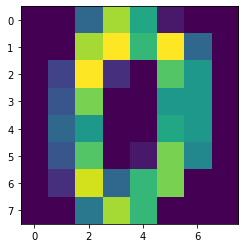

In [6]:
plt.imshow(digits['data'][0].reshape(8,8))

In [7]:
digits['target'][0]

0

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits['data'], digits['target'])

In [9]:
X_test

array([[ 0.,  0.,  3., ...,  8.,  2.,  0.],
       [ 0.,  0.,  2., ..., 12.,  3.,  0.],
       [ 0.,  0.,  5., ..., 10.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 16.,  8.,  0.],
       [ 0.,  1., 12., ..., 16.,  8.,  0.],
       [ 0.,  0.,  2., ...,  8.,  4.,  0.]])

In [10]:
y_train

array([1, 6, 9, ..., 1, 0, 7])

In [11]:
X_train.shape

(1347, 64)

In [12]:
X_test.shape

(450, 64)

In [13]:
print(y_train.shape, y_test.shape)

(1347,) (450,)


###  This is the special data structure for XGB
It is similar to a data frame, but contains both the features and the labels
Although we pass labels, you do not have to (say for testing/final prediction)

In [14]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [15]:
evallist = [(dtest,'eval'), (dtrain, 'train')]

In [16]:
num_round = 1000
param = {
    'max_depth':5,
    'objective':'multi:softmax',
    'num_class':10,
    'eta': 0.01
}

### Regular XGB model

In [17]:
my_model = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds = 2)

[21:30:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:2.26681	train-mlogloss:2.26275
[1]	eval-mlogloss:2.23240	train-mlogloss:2.22459
[2]	eval-mlogloss:2.19939	train-mlogloss:2.18789
[3]	eval-mlogloss:2.16687	train-mlogloss:2.15245
[4]	eval-mlogloss:2.13590	train-mlogloss:2.11824
[5]	eval-mlogloss:2.10586	train-mlogloss:2.08525
[6]	eval-mlogloss:2.07688	train-mlogloss:2.05331
[7]	eval-mlogloss:2.04883	train-mlogloss:2.02241
[8]	eval-mlogloss:2.02173	train-mlogloss:1.99245
[9]	eval-mlogloss:1.99511	train-mlogloss:1.96344
[10]	eval-mlogloss:1.96925	train-mlogloss:1.93529
[11]	eval-mlogloss:1.94396	train-mlogloss:1.90785
[12]	eval-mlogloss:1.91955	train-mlogloss:1.88117
[13]	eval-mlogloss:1.89585	train-mlogloss:1.85521


[157]	eval-mlogloss:0.63225	train-mlogloss:0.44397
[158]	eval-mlogloss:0.62867	train-mlogloss:0.44019
[159]	eval-mlogloss:0.62511	train-mlogloss:0.43647
[160]	eval-mlogloss:0.62164	train-mlogloss:0.43276
[161]	eval-mlogloss:0.61804	train-mlogloss:0.42912
[162]	eval-mlogloss:0.61463	train-mlogloss:0.42552
[163]	eval-mlogloss:0.61115	train-mlogloss:0.42193
[164]	eval-mlogloss:0.60771	train-mlogloss:0.41839
[165]	eval-mlogloss:0.60438	train-mlogloss:0.41486
[166]	eval-mlogloss:0.60105	train-mlogloss:0.41137
[167]	eval-mlogloss:0.59768	train-mlogloss:0.40791
[168]	eval-mlogloss:0.59447	train-mlogloss:0.40450
[169]	eval-mlogloss:0.59116	train-mlogloss:0.40112
[170]	eval-mlogloss:0.58796	train-mlogloss:0.39779
[171]	eval-mlogloss:0.58466	train-mlogloss:0.39447
[172]	eval-mlogloss:0.58149	train-mlogloss:0.39118
[173]	eval-mlogloss:0.57844	train-mlogloss:0.38795
[174]	eval-mlogloss:0.57524	train-mlogloss:0.38473
[175]	eval-mlogloss:0.57220	train-mlogloss:0.38151
[176]	eval-mlogloss:0.56909	tra

[318]	eval-mlogloss:0.31149	train-mlogloss:0.12573
[319]	eval-mlogloss:0.31059	train-mlogloss:0.12484
[320]	eval-mlogloss:0.30964	train-mlogloss:0.12397
[321]	eval-mlogloss:0.30865	train-mlogloss:0.12311
[322]	eval-mlogloss:0.30767	train-mlogloss:0.12226
[323]	eval-mlogloss:0.30667	train-mlogloss:0.12140
[324]	eval-mlogloss:0.30574	train-mlogloss:0.12057
[325]	eval-mlogloss:0.30482	train-mlogloss:0.11974
[326]	eval-mlogloss:0.30386	train-mlogloss:0.11891
[327]	eval-mlogloss:0.30297	train-mlogloss:0.11809
[328]	eval-mlogloss:0.30201	train-mlogloss:0.11727
[329]	eval-mlogloss:0.30108	train-mlogloss:0.11647
[330]	eval-mlogloss:0.30011	train-mlogloss:0.11567
[331]	eval-mlogloss:0.29918	train-mlogloss:0.11487
[332]	eval-mlogloss:0.29833	train-mlogloss:0.11410
[333]	eval-mlogloss:0.29742	train-mlogloss:0.11332
[334]	eval-mlogloss:0.29657	train-mlogloss:0.11255
[335]	eval-mlogloss:0.29572	train-mlogloss:0.11179
[336]	eval-mlogloss:0.29485	train-mlogloss:0.11101
[337]	eval-mlogloss:0.29403	tra

[479]	eval-mlogloss:0.21250	train-mlogloss:0.04634
[480]	eval-mlogloss:0.21213	train-mlogloss:0.04609
[481]	eval-mlogloss:0.21175	train-mlogloss:0.04586
[482]	eval-mlogloss:0.21134	train-mlogloss:0.04562
[483]	eval-mlogloss:0.21106	train-mlogloss:0.04537
[484]	eval-mlogloss:0.21070	train-mlogloss:0.04514
[485]	eval-mlogloss:0.21042	train-mlogloss:0.04491
[486]	eval-mlogloss:0.21001	train-mlogloss:0.04467
[487]	eval-mlogloss:0.20966	train-mlogloss:0.04444
[488]	eval-mlogloss:0.20938	train-mlogloss:0.04421
[489]	eval-mlogloss:0.20903	train-mlogloss:0.04399
[490]	eval-mlogloss:0.20869	train-mlogloss:0.04375
[491]	eval-mlogloss:0.20834	train-mlogloss:0.04353
[492]	eval-mlogloss:0.20805	train-mlogloss:0.04331
[493]	eval-mlogloss:0.20772	train-mlogloss:0.04308
[494]	eval-mlogloss:0.20741	train-mlogloss:0.04287
[495]	eval-mlogloss:0.20706	train-mlogloss:0.04265
[496]	eval-mlogloss:0.20674	train-mlogloss:0.04243
[497]	eval-mlogloss:0.20640	train-mlogloss:0.04222
[498]	eval-mlogloss:0.20605	tra

[640]	eval-mlogloss:0.17112	train-mlogloss:0.02303
[641]	eval-mlogloss:0.17095	train-mlogloss:0.02295
[642]	eval-mlogloss:0.17081	train-mlogloss:0.02286
[643]	eval-mlogloss:0.17067	train-mlogloss:0.02278
[644]	eval-mlogloss:0.17050	train-mlogloss:0.02270
[645]	eval-mlogloss:0.17035	train-mlogloss:0.02263
[646]	eval-mlogloss:0.17022	train-mlogloss:0.02255
[647]	eval-mlogloss:0.17002	train-mlogloss:0.02246
[648]	eval-mlogloss:0.16990	train-mlogloss:0.02239
[649]	eval-mlogloss:0.16976	train-mlogloss:0.02231
[650]	eval-mlogloss:0.16962	train-mlogloss:0.02223
[651]	eval-mlogloss:0.16945	train-mlogloss:0.02215
[652]	eval-mlogloss:0.16930	train-mlogloss:0.02207
[653]	eval-mlogloss:0.16913	train-mlogloss:0.02200
[654]	eval-mlogloss:0.16900	train-mlogloss:0.02193
[655]	eval-mlogloss:0.16884	train-mlogloss:0.02185
[656]	eval-mlogloss:0.16866	train-mlogloss:0.02177
[657]	eval-mlogloss:0.16853	train-mlogloss:0.02170
[658]	eval-mlogloss:0.16839	train-mlogloss:0.02163
[659]	eval-mlogloss:0.16825	tra

[801]	eval-mlogloss:0.15367	train-mlogloss:0.01445
[802]	eval-mlogloss:0.15359	train-mlogloss:0.01442
[803]	eval-mlogloss:0.15353	train-mlogloss:0.01439
[804]	eval-mlogloss:0.15344	train-mlogloss:0.01435
[805]	eval-mlogloss:0.15339	train-mlogloss:0.01432
[806]	eval-mlogloss:0.15333	train-mlogloss:0.01429
[807]	eval-mlogloss:0.15324	train-mlogloss:0.01426
[808]	eval-mlogloss:0.15316	train-mlogloss:0.01422
[809]	eval-mlogloss:0.15311	train-mlogloss:0.01419
[810]	eval-mlogloss:0.15304	train-mlogloss:0.01416
[811]	eval-mlogloss:0.15296	train-mlogloss:0.01413
[812]	eval-mlogloss:0.15285	train-mlogloss:0.01409
[813]	eval-mlogloss:0.15279	train-mlogloss:0.01406
[814]	eval-mlogloss:0.15274	train-mlogloss:0.01403
[815]	eval-mlogloss:0.15269	train-mlogloss:0.01400
[816]	eval-mlogloss:0.15260	train-mlogloss:0.01397
[817]	eval-mlogloss:0.15251	train-mlogloss:0.01393
[818]	eval-mlogloss:0.15245	train-mlogloss:0.01390
[819]	eval-mlogloss:0.15240	train-mlogloss:0.01387
[820]	eval-mlogloss:0.15234	tra

[962]	eval-mlogloss:0.14522	train-mlogloss:0.01056
[963]	eval-mlogloss:0.14518	train-mlogloss:0.01054
[964]	eval-mlogloss:0.14515	train-mlogloss:0.01052
[965]	eval-mlogloss:0.14511	train-mlogloss:0.01050
[966]	eval-mlogloss:0.14509	train-mlogloss:0.01049
[967]	eval-mlogloss:0.14503	train-mlogloss:0.01047
[968]	eval-mlogloss:0.14500	train-mlogloss:0.01045
[969]	eval-mlogloss:0.14495	train-mlogloss:0.01043
[970]	eval-mlogloss:0.14490	train-mlogloss:0.01042
[971]	eval-mlogloss:0.14488	train-mlogloss:0.01040
[972]	eval-mlogloss:0.14480	train-mlogloss:0.01038
[973]	eval-mlogloss:0.14477	train-mlogloss:0.01037
[974]	eval-mlogloss:0.14472	train-mlogloss:0.01035
[975]	eval-mlogloss:0.14466	train-mlogloss:0.01033
[976]	eval-mlogloss:0.14464	train-mlogloss:0.01031
[977]	eval-mlogloss:0.14461	train-mlogloss:0.01030
[978]	eval-mlogloss:0.14458	train-mlogloss:0.01028
[979]	eval-mlogloss:0.14454	train-mlogloss:0.01026
[980]	eval-mlogloss:0.14447	train-mlogloss:0.01025
[981]	eval-mlogloss:0.14447	tra

###  Cross Validation with XGB

In [18]:
xgb.cv(params=param, dtrain=dtrain, num_boost_round = 10, nfold=5, verbose_eval=True, early_stopping_rounds=2)

[21:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,2.263725,0.000244,2.267236,0.001474
1,2.226337,0.000502,2.233232,0.002892
2,2.190248,0.000758,2.200412,0.004232
3,2.155462,0.000934,2.168933,0.005602
4,2.121858,0.001077,2.138303,0.006761
5,2.089364,0.001238,2.108924,0.007879
6,2.057855,0.001384,2.080294,0.009061
7,2.027289,0.001552,2.052660,0.010173
8,1.997571,0.001721,2.025874,0.011010
9,1.968745,0.001881,1.999707,0.011896


If you assign a variable, you get a dataframe of results

In [19]:
out = xgb.cv(params=param, dtrain=dtrain, num_boost_round = 200, nfold=5, verbose_eval=True, early_stopping_rounds=2)

[21:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[101]	train-mlogloss:0.73324+0.00222	test-mlogloss:0.90195+0.03892
[102]	train-mlogloss:0.72662+0.00226	test-mlogloss:0.89604+0.03893
[103]	train-mlogloss:0.72002+0.00225	test-mlogloss:0.89023+0.03905
[104]	train-mlogloss:0.71351+0.00222	test-mlogloss:0.88442+0.03904
[105]	train-mlogloss:0.70705+0.00223	test-mlogloss:0.87868+0.03907
[106]	train-mlogloss:0.70070+0.00221	test-mlogloss:0.87308+0.03912
[107]	train-mlogloss:0.69440+0.00223	test-mlogloss:0.86754+0.03909
[108]	train-mlogloss:0.68814+0.00221	test-mlogloss:0.86196+0.03903
[109]	train-mlogloss:0.68195+0.00222	test-mlogloss:0.85653+0.03906
[110]	train-mlogloss:0.67584+0.00218	test-mlogloss:0.85109+0.03912
[111]	train-mlogloss:0.66981+0.00222	test-mlogloss:0.84578+0.03905
[112]	train-mlogloss:0.66381+0.00218	test-mlogloss:0.84053+0.03913
[113]	train-mlogloss:0.65787+0.00218	test-mlogloss:0.83528+0.03905
[114]	train-mlogloss:0.65201+0.00213	test-mlogloss:0.83013+0.03901
[115]	train-mlogloss:0.64620+0.00211	test-mlogloss:0.82492+0.0

In [20]:
out

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
0,2.263725,0.000244,2.267236,0.001474
1,2.226337,0.000502,2.233232,0.002892
2,2.190248,0.000758,2.200412,0.004232
3,2.155462,0.000934,2.168933,0.005602
4,2.121858,0.001077,2.138303,0.006761
...,...,...,...,...
195,0.327011,0.001546,0.534580,0.034314
196,0.324360,0.001550,0.532095,0.034247
197,0.321745,0.001533,0.529558,0.034225
198,0.319150,0.001521,0.527095,0.034105


## Key Idea
We are going to watch the loss.  This is going to be happening for many advanced algorithms.  The model is 'done' when the **validation loss** stops improving.

THe first three graphs show incomplete training.

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

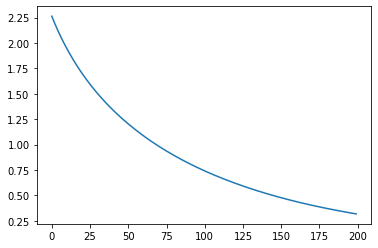

In [22]:
plt.plot(out['train-mlogloss-mean'])

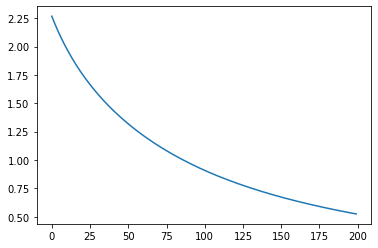

In [23]:
plt.plot(out['test-mlogloss-mean'])

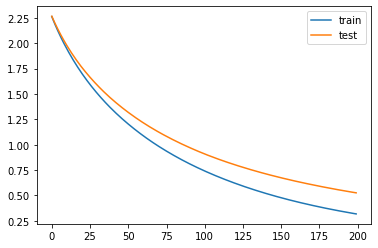

In [24]:
plt.plot(out['train-mlogloss-mean'], label='train')
plt.plot(out['test-mlogloss-mean'], label='test')
plt.legend()
plt.show()

### Now lets do a proper training by allowing XGB to stop when the validation loss stops improving
Notice that often times we use *test* and *validation* interchangably.  You want to watch input features that are **not** used to train the model

In [25]:
out = xgb.cv(params=param, dtrain=dtrain, num_boost_round = 5000, nfold=5, verbose_eval=True, early_stopping_rounds=2)

[21:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:30:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[101]	train-mlogloss:0.73324+0.00222	test-mlogloss:0.90195+0.03892
[102]	train-mlogloss:0.72662+0.00226	test-mlogloss:0.89604+0.03893
[103]	train-mlogloss:0.72002+0.00225	test-mlogloss:0.89023+0.03905
[104]	train-mlogloss:0.71351+0.00222	test-mlogloss:0.88442+0.03904
[105]	train-mlogloss:0.70705+0.00223	test-mlogloss:0.87868+0.03907
[106]	train-mlogloss:0.70070+0.00221	test-mlogloss:0.87308+0.03912
[107]	train-mlogloss:0.69440+0.00223	test-mlogloss:0.86754+0.03909
[108]	train-mlogloss:0.68814+0.00221	test-mlogloss:0.86196+0.03903
[109]	train-mlogloss:0.68195+0.00222	test-mlogloss:0.85653+0.03906
[110]	train-mlogloss:0.67584+0.00218	test-mlogloss:0.85109+0.03912
[111]	train-mlogloss:0.66981+0.00222	test-mlogloss:0.84578+0.03905
[112]	train-mlogloss:0.66381+0.00218	test-mlogloss:0.84053+0.03913
[113]	train-mlogloss:0.65787+0.00218	test-mlogloss:0.83528+0.03905
[114]	train-mlogloss:0.65201+0.00213	test-mlogloss:0.83013+0.03901
[115]	train-mlogloss:0.64620+0.00211	test-mlogloss:0.82492+0.0

[224]	train-mlogloss:0.25916+0.00138	test-mlogloss:0.46975+0.03224
[225]	train-mlogloss:0.25712+0.00138	test-mlogloss:0.46783+0.03221
[226]	train-mlogloss:0.25509+0.00137	test-mlogloss:0.46585+0.03217
[227]	train-mlogloss:0.25309+0.00136	test-mlogloss:0.46388+0.03206
[228]	train-mlogloss:0.25111+0.00135	test-mlogloss:0.46198+0.03204
[229]	train-mlogloss:0.24915+0.00133	test-mlogloss:0.46008+0.03199
[230]	train-mlogloss:0.24721+0.00132	test-mlogloss:0.45826+0.03195
[231]	train-mlogloss:0.24527+0.00131	test-mlogloss:0.45629+0.03186
[232]	train-mlogloss:0.24336+0.00130	test-mlogloss:0.45445+0.03184
[233]	train-mlogloss:0.24146+0.00128	test-mlogloss:0.45261+0.03183
[234]	train-mlogloss:0.23958+0.00127	test-mlogloss:0.45083+0.03184
[235]	train-mlogloss:0.23772+0.00126	test-mlogloss:0.44898+0.03181
[236]	train-mlogloss:0.23585+0.00124	test-mlogloss:0.44714+0.03183
[237]	train-mlogloss:0.23404+0.00124	test-mlogloss:0.44537+0.03182
[238]	train-mlogloss:0.23224+0.00123	test-mlogloss:0.44359+0.0

[347]	train-mlogloss:0.10562+0.00118	test-mlogloss:0.30858+0.02781
[348]	train-mlogloss:0.10491+0.00118	test-mlogloss:0.30773+0.02780
[349]	train-mlogloss:0.10422+0.00118	test-mlogloss:0.30697+0.02782
[350]	train-mlogloss:0.10353+0.00117	test-mlogloss:0.30614+0.02776
[351]	train-mlogloss:0.10285+0.00117	test-mlogloss:0.30530+0.02775
[352]	train-mlogloss:0.10217+0.00117	test-mlogloss:0.30453+0.02774
[353]	train-mlogloss:0.10150+0.00118	test-mlogloss:0.30369+0.02774
[354]	train-mlogloss:0.10083+0.00117	test-mlogloss:0.30287+0.02773
[355]	train-mlogloss:0.10017+0.00117	test-mlogloss:0.30210+0.02773
[356]	train-mlogloss:0.09952+0.00116	test-mlogloss:0.30134+0.02773
[357]	train-mlogloss:0.09887+0.00116	test-mlogloss:0.30061+0.02768
[358]	train-mlogloss:0.09823+0.00116	test-mlogloss:0.29980+0.02768
[359]	train-mlogloss:0.09759+0.00116	test-mlogloss:0.29907+0.02764
[360]	train-mlogloss:0.09696+0.00115	test-mlogloss:0.29831+0.02763
[361]	train-mlogloss:0.09632+0.00115	test-mlogloss:0.29759+0.0

[470]	train-mlogloss:0.05082+0.00079	test-mlogloss:0.23908+0.02717
[471]	train-mlogloss:0.05055+0.00079	test-mlogloss:0.23873+0.02721
[472]	train-mlogloss:0.05029+0.00078	test-mlogloss:0.23842+0.02718
[473]	train-mlogloss:0.05003+0.00078	test-mlogloss:0.23801+0.02717
[474]	train-mlogloss:0.04977+0.00078	test-mlogloss:0.23769+0.02720
[475]	train-mlogloss:0.04952+0.00077	test-mlogloss:0.23737+0.02719
[476]	train-mlogloss:0.04927+0.00077	test-mlogloss:0.23703+0.02716
[477]	train-mlogloss:0.04901+0.00077	test-mlogloss:0.23666+0.02717
[478]	train-mlogloss:0.04877+0.00076	test-mlogloss:0.23629+0.02718
[479]	train-mlogloss:0.04852+0.00076	test-mlogloss:0.23596+0.02720
[480]	train-mlogloss:0.04827+0.00076	test-mlogloss:0.23564+0.02719
[481]	train-mlogloss:0.04803+0.00075	test-mlogloss:0.23532+0.02717
[482]	train-mlogloss:0.04779+0.00075	test-mlogloss:0.23496+0.02717
[483]	train-mlogloss:0.04754+0.00075	test-mlogloss:0.23458+0.02717
[484]	train-mlogloss:0.04731+0.00075	test-mlogloss:0.23432+0.0

[593]	train-mlogloss:0.02927+0.00046	test-mlogloss:0.20546+0.02725
[594]	train-mlogloss:0.02916+0.00046	test-mlogloss:0.20525+0.02728
[595]	train-mlogloss:0.02905+0.00045	test-mlogloss:0.20504+0.02728
[596]	train-mlogloss:0.02894+0.00045	test-mlogloss:0.20484+0.02727
[597]	train-mlogloss:0.02883+0.00045	test-mlogloss:0.20466+0.02726
[598]	train-mlogloss:0.02872+0.00045	test-mlogloss:0.20443+0.02731
[599]	train-mlogloss:0.02861+0.00045	test-mlogloss:0.20422+0.02727
[600]	train-mlogloss:0.02851+0.00044	test-mlogloss:0.20405+0.02729
[601]	train-mlogloss:0.02840+0.00044	test-mlogloss:0.20387+0.02732
[602]	train-mlogloss:0.02829+0.00044	test-mlogloss:0.20368+0.02729
[603]	train-mlogloss:0.02819+0.00044	test-mlogloss:0.20348+0.02730
[604]	train-mlogloss:0.02808+0.00044	test-mlogloss:0.20325+0.02730
[605]	train-mlogloss:0.02798+0.00044	test-mlogloss:0.20306+0.02732
[606]	train-mlogloss:0.02788+0.00043	test-mlogloss:0.20286+0.02731
[607]	train-mlogloss:0.02777+0.00043	test-mlogloss:0.20268+0.0

[716]	train-mlogloss:0.01961+0.00026	test-mlogloss:0.18665+0.02828
[717]	train-mlogloss:0.01956+0.00026	test-mlogloss:0.18653+0.02831
[718]	train-mlogloss:0.01950+0.00026	test-mlogloss:0.18641+0.02833
[719]	train-mlogloss:0.01945+0.00025	test-mlogloss:0.18629+0.02835
[720]	train-mlogloss:0.01940+0.00025	test-mlogloss:0.18618+0.02832
[721]	train-mlogloss:0.01934+0.00025	test-mlogloss:0.18607+0.02838
[722]	train-mlogloss:0.01929+0.00025	test-mlogloss:0.18597+0.02837
[723]	train-mlogloss:0.01924+0.00025	test-mlogloss:0.18583+0.02841
[724]	train-mlogloss:0.01919+0.00025	test-mlogloss:0.18570+0.02843
[725]	train-mlogloss:0.01913+0.00025	test-mlogloss:0.18561+0.02843
[726]	train-mlogloss:0.01908+0.00025	test-mlogloss:0.18548+0.02846
[727]	train-mlogloss:0.01903+0.00025	test-mlogloss:0.18538+0.02845
[728]	train-mlogloss:0.01898+0.00025	test-mlogloss:0.18526+0.02846
[729]	train-mlogloss:0.01893+0.00025	test-mlogloss:0.18513+0.02849
[730]	train-mlogloss:0.01888+0.00024	test-mlogloss:0.18503+0.0

[839]	train-mlogloss:0.01463+0.00020	test-mlogloss:0.17564+0.02949
[840]	train-mlogloss:0.01460+0.00020	test-mlogloss:0.17559+0.02948
[841]	train-mlogloss:0.01457+0.00020	test-mlogloss:0.17552+0.02948
[842]	train-mlogloss:0.01454+0.00020	test-mlogloss:0.17545+0.02948
[843]	train-mlogloss:0.01451+0.00020	test-mlogloss:0.17539+0.02949
[844]	train-mlogloss:0.01448+0.00020	test-mlogloss:0.17531+0.02951
[845]	train-mlogloss:0.01445+0.00020	test-mlogloss:0.17522+0.02950
[846]	train-mlogloss:0.01442+0.00020	test-mlogloss:0.17516+0.02950
[847]	train-mlogloss:0.01440+0.00020	test-mlogloss:0.17511+0.02950
[848]	train-mlogloss:0.01437+0.00020	test-mlogloss:0.17502+0.02953
[849]	train-mlogloss:0.01434+0.00020	test-mlogloss:0.17498+0.02954
[850]	train-mlogloss:0.01431+0.00020	test-mlogloss:0.17490+0.02955
[851]	train-mlogloss:0.01428+0.00020	test-mlogloss:0.17483+0.02957
[852]	train-mlogloss:0.01426+0.00020	test-mlogloss:0.17476+0.02959
[853]	train-mlogloss:0.01423+0.00020	test-mlogloss:0.17467+0.0

[962]	train-mlogloss:0.01177+0.00016	test-mlogloss:0.16790+0.03040
[963]	train-mlogloss:0.01176+0.00016	test-mlogloss:0.16786+0.03042
[964]	train-mlogloss:0.01174+0.00015	test-mlogloss:0.16781+0.03042
[965]	train-mlogloss:0.01172+0.00015	test-mlogloss:0.16777+0.03044
[966]	train-mlogloss:0.01170+0.00015	test-mlogloss:0.16772+0.03044
[967]	train-mlogloss:0.01168+0.00015	test-mlogloss:0.16768+0.03046
[968]	train-mlogloss:0.01167+0.00015	test-mlogloss:0.16762+0.03046
[969]	train-mlogloss:0.01165+0.00015	test-mlogloss:0.16756+0.03047
[970]	train-mlogloss:0.01163+0.00015	test-mlogloss:0.16751+0.03047
[971]	train-mlogloss:0.01161+0.00015	test-mlogloss:0.16746+0.03050
[972]	train-mlogloss:0.01160+0.00015	test-mlogloss:0.16742+0.03051
[973]	train-mlogloss:0.01158+0.00015	test-mlogloss:0.16736+0.03052
[974]	train-mlogloss:0.01156+0.00015	test-mlogloss:0.16730+0.03056
[975]	train-mlogloss:0.01154+0.00015	test-mlogloss:0.16726+0.03056
[976]	train-mlogloss:0.01153+0.00015	test-mlogloss:0.16721+0.0

[1084]	train-mlogloss:0.00998+0.00012	test-mlogloss:0.16312+0.03123
[1085]	train-mlogloss:0.00997+0.00012	test-mlogloss:0.16310+0.03125
[1086]	train-mlogloss:0.00996+0.00012	test-mlogloss:0.16308+0.03124
[1087]	train-mlogloss:0.00995+0.00012	test-mlogloss:0.16305+0.03124
[1088]	train-mlogloss:0.00993+0.00012	test-mlogloss:0.16303+0.03125
[1089]	train-mlogloss:0.00992+0.00012	test-mlogloss:0.16301+0.03126
[1090]	train-mlogloss:0.00991+0.00012	test-mlogloss:0.16297+0.03125
[1091]	train-mlogloss:0.00990+0.00012	test-mlogloss:0.16293+0.03126
[1092]	train-mlogloss:0.00989+0.00012	test-mlogloss:0.16291+0.03127
[1093]	train-mlogloss:0.00988+0.00012	test-mlogloss:0.16289+0.03127
[1094]	train-mlogloss:0.00986+0.00012	test-mlogloss:0.16285+0.03128
[1095]	train-mlogloss:0.00985+0.00012	test-mlogloss:0.16284+0.03128
[1096]	train-mlogloss:0.00984+0.00012	test-mlogloss:0.16281+0.03128
[1097]	train-mlogloss:0.00983+0.00012	test-mlogloss:0.16280+0.03129
[1098]	train-mlogloss:0.00982+0.00012	test-mlogl

[1205]	train-mlogloss:0.00881+0.00011	test-mlogloss:0.15982+0.03182
[1206]	train-mlogloss:0.00880+0.00012	test-mlogloss:0.15981+0.03183
[1207]	train-mlogloss:0.00879+0.00011	test-mlogloss:0.15979+0.03184
[1208]	train-mlogloss:0.00879+0.00011	test-mlogloss:0.15976+0.03183
[1209]	train-mlogloss:0.00878+0.00011	test-mlogloss:0.15973+0.03184
[1210]	train-mlogloss:0.00877+0.00011	test-mlogloss:0.15972+0.03185
[1211]	train-mlogloss:0.00876+0.00011	test-mlogloss:0.15969+0.03185
[1212]	train-mlogloss:0.00876+0.00011	test-mlogloss:0.15967+0.03185
[1213]	train-mlogloss:0.00875+0.00011	test-mlogloss:0.15966+0.03187
[1214]	train-mlogloss:0.00874+0.00011	test-mlogloss:0.15963+0.03188
[1215]	train-mlogloss:0.00873+0.00011	test-mlogloss:0.15959+0.03187
[1216]	train-mlogloss:0.00872+0.00011	test-mlogloss:0.15956+0.03188
[1217]	train-mlogloss:0.00872+0.00011	test-mlogloss:0.15954+0.03188
[1218]	train-mlogloss:0.00871+0.00011	test-mlogloss:0.15951+0.03189
[1219]	train-mlogloss:0.00870+0.00011	test-mlogl

[1326]	train-mlogloss:0.00800+0.00010	test-mlogloss:0.15737+0.03198
[1327]	train-mlogloss:0.00800+0.00010	test-mlogloss:0.15736+0.03198
[1328]	train-mlogloss:0.00799+0.00010	test-mlogloss:0.15734+0.03200
[1329]	train-mlogloss:0.00799+0.00010	test-mlogloss:0.15731+0.03200
[1330]	train-mlogloss:0.00798+0.00010	test-mlogloss:0.15730+0.03199
[1331]	train-mlogloss:0.00798+0.00010	test-mlogloss:0.15730+0.03199
[1332]	train-mlogloss:0.00797+0.00010	test-mlogloss:0.15728+0.03200
[1333]	train-mlogloss:0.00797+0.00010	test-mlogloss:0.15727+0.03201
[1334]	train-mlogloss:0.00796+0.00010	test-mlogloss:0.15724+0.03201
[1335]	train-mlogloss:0.00795+0.00010	test-mlogloss:0.15723+0.03200
[1336]	train-mlogloss:0.00795+0.00010	test-mlogloss:0.15722+0.03200
[1337]	train-mlogloss:0.00794+0.00010	test-mlogloss:0.15721+0.03201
[1338]	train-mlogloss:0.00794+0.00010	test-mlogloss:0.15719+0.03201
[1339]	train-mlogloss:0.00793+0.00010	test-mlogloss:0.15717+0.03202
[1340]	train-mlogloss:0.00793+0.00010	test-mlogl

[1447]	train-mlogloss:0.00740+0.00009	test-mlogloss:0.15534+0.03215
[1448]	train-mlogloss:0.00740+0.00009	test-mlogloss:0.15531+0.03215
[1449]	train-mlogloss:0.00740+0.00009	test-mlogloss:0.15530+0.03216
[1450]	train-mlogloss:0.00739+0.00009	test-mlogloss:0.15528+0.03216
[1451]	train-mlogloss:0.00739+0.00009	test-mlogloss:0.15526+0.03217
[1452]	train-mlogloss:0.00738+0.00009	test-mlogloss:0.15524+0.03217
[1453]	train-mlogloss:0.00738+0.00009	test-mlogloss:0.15523+0.03218
[1454]	train-mlogloss:0.00737+0.00009	test-mlogloss:0.15521+0.03218
[1455]	train-mlogloss:0.00737+0.00009	test-mlogloss:0.15520+0.03219
[1456]	train-mlogloss:0.00737+0.00009	test-mlogloss:0.15518+0.03219
[1457]	train-mlogloss:0.00736+0.00009	test-mlogloss:0.15516+0.03219
[1458]	train-mlogloss:0.00736+0.00009	test-mlogloss:0.15513+0.03219
[1459]	train-mlogloss:0.00735+0.00009	test-mlogloss:0.15512+0.03221
[1460]	train-mlogloss:0.00735+0.00009	test-mlogloss:0.15509+0.03221
[1461]	train-mlogloss:0.00734+0.00009	test-mlogl

[1568]	train-mlogloss:0.00694+0.00008	test-mlogloss:0.15336+0.03254
[1569]	train-mlogloss:0.00693+0.00008	test-mlogloss:0.15335+0.03255
[1570]	train-mlogloss:0.00693+0.00008	test-mlogloss:0.15334+0.03256
[1571]	train-mlogloss:0.00693+0.00008	test-mlogloss:0.15333+0.03257
[1572]	train-mlogloss:0.00692+0.00008	test-mlogloss:0.15331+0.03255
[1573]	train-mlogloss:0.00692+0.00008	test-mlogloss:0.15330+0.03255
[1574]	train-mlogloss:0.00692+0.00008	test-mlogloss:0.15329+0.03257
[1575]	train-mlogloss:0.00691+0.00008	test-mlogloss:0.15327+0.03257
[1576]	train-mlogloss:0.00691+0.00008	test-mlogloss:0.15327+0.03257
[1577]	train-mlogloss:0.00691+0.00008	test-mlogloss:0.15325+0.03256
[1578]	train-mlogloss:0.00690+0.00008	test-mlogloss:0.15323+0.03256
[1579]	train-mlogloss:0.00690+0.00008	test-mlogloss:0.15322+0.03257
[1580]	train-mlogloss:0.00690+0.00008	test-mlogloss:0.15320+0.03257
[1581]	train-mlogloss:0.00689+0.00008	test-mlogloss:0.15318+0.03257
[1582]	train-mlogloss:0.00689+0.00008	test-mlogl

[1689]	train-mlogloss:0.00656+0.00007	test-mlogloss:0.15209+0.03281
[1690]	train-mlogloss:0.00656+0.00007	test-mlogloss:0.15208+0.03281
[1691]	train-mlogloss:0.00655+0.00007	test-mlogloss:0.15208+0.03282
[1692]	train-mlogloss:0.00655+0.00007	test-mlogloss:0.15207+0.03282
[1693]	train-mlogloss:0.00655+0.00007	test-mlogloss:0.15207+0.03282
[1694]	train-mlogloss:0.00655+0.00007	test-mlogloss:0.15206+0.03283
[1695]	train-mlogloss:0.00654+0.00007	test-mlogloss:0.15204+0.03283
[1696]	train-mlogloss:0.00654+0.00007	test-mlogloss:0.15203+0.03282
[1697]	train-mlogloss:0.00654+0.00007	test-mlogloss:0.15201+0.03282
[1698]	train-mlogloss:0.00654+0.00007	test-mlogloss:0.15200+0.03283
[1699]	train-mlogloss:0.00653+0.00007	test-mlogloss:0.15200+0.03283
[1700]	train-mlogloss:0.00653+0.00007	test-mlogloss:0.15200+0.03283
[1701]	train-mlogloss:0.00653+0.00007	test-mlogloss:0.15199+0.03283
[1702]	train-mlogloss:0.00652+0.00007	test-mlogloss:0.15198+0.03283
[1703]	train-mlogloss:0.00652+0.00007	test-mlogl

[1810]	train-mlogloss:0.00625+0.00007	test-mlogloss:0.15116+0.03300
[1811]	train-mlogloss:0.00625+0.00007	test-mlogloss:0.15116+0.03301
[1812]	train-mlogloss:0.00625+0.00007	test-mlogloss:0.15115+0.03301
[1813]	train-mlogloss:0.00625+0.00007	test-mlogloss:0.15115+0.03301
[1814]	train-mlogloss:0.00624+0.00007	test-mlogloss:0.15114+0.03301
[1815]	train-mlogloss:0.00624+0.00007	test-mlogloss:0.15113+0.03301
[1816]	train-mlogloss:0.00624+0.00007	test-mlogloss:0.15113+0.03301
[1817]	train-mlogloss:0.00624+0.00007	test-mlogloss:0.15112+0.03301
[1818]	train-mlogloss:0.00624+0.00007	test-mlogloss:0.15111+0.03301
[1819]	train-mlogloss:0.00623+0.00007	test-mlogloss:0.15110+0.03302
[1820]	train-mlogloss:0.00623+0.00007	test-mlogloss:0.15109+0.03302
[1821]	train-mlogloss:0.00623+0.00007	test-mlogloss:0.15109+0.03301
[1822]	train-mlogloss:0.00623+0.00007	test-mlogloss:0.15108+0.03301
[1823]	train-mlogloss:0.00622+0.00007	test-mlogloss:0.15107+0.03302
[1824]	train-mlogloss:0.00622+0.00007	test-mlogl

### Complete training
Notice how the test/validation loss has stopped improving and has 'flattened' out.  Even though the training loss is less (demonstrating overfitting), the test loss was still improving.  The improvement was small, thus is looks like there was no change, but look at the data and see the last decimal was improving.

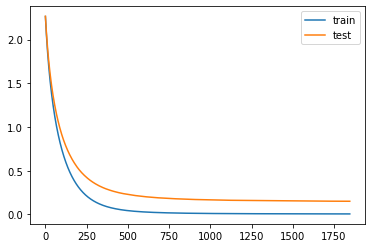

In [26]:
plt.plot(out['train-mlogloss-mean'], label='train')
plt.plot(out['test-mlogloss-mean'], label='test')
plt.legend()
plt.show()

In [27]:
out.tail(10)

,train-mlogloss-mean,train-mlogloss-std,test-mlogloss-mean,test-mlogloss-std
1837,0.006194,0.000073,0.151000,0.033046
1838,0.006192,0.000074,0.150989,0.033043
1839,0.006190,0.000074,0.150982,0.033049
1840,0.006188,0.000074,0.150977,0.033048
1841,0.006186,0.000074,0.150971,0.033048
1842,0.006183,0.000074,0.150962,0.033052
1843,0.006181,0.000074,0.150956,0.033060
1844,0.006179,0.000074,0.150942,0.033050
1845,0.006177,0.000073,0.150938,0.033052
1846,0.006175,0.000073,0.150935,0.033053


In [28]:
my_model.predict(dtest)

array([3., 6., 9., 2., 5., 2., 0., 4., 8., 6., 0., 8., 4., 1., 8., 1., 1.,
       1., 0., 7., 8., 3., 0., 5., 6., 2., 6., 7., 8., 5., 4., 9., 4., 8.,
       4., 6., 6., 6., 6., 1., 7., 3., 3., 0., 9., 2., 9., 4., 7., 0., 7.,
       2., 0., 0., 9., 6., 0., 8., 0., 1., 2., 5., 2., 3., 6., 7., 7., 7.,
       4., 8., 2., 8., 6., 6., 6., 3., 0., 7., 9., 2., 4., 9., 6., 3., 1.,
       4., 6., 7., 4., 4., 4., 1., 9., 9., 3., 4., 7., 1., 0., 0., 3., 6.,
       3., 7., 6., 1., 3., 1., 7., 3., 2., 9., 9., 8., 5., 9., 5., 2., 4.,
       5., 0., 9., 5., 6., 9., 0., 8., 1., 9., 5., 8., 7., 5., 2., 4., 0.,
       0., 2., 8., 0., 1., 5., 7., 5., 5., 6., 7., 8., 2., 4., 1., 6., 5.,
       9., 2., 2., 4., 2., 4., 2., 5., 6., 3., 4., 9., 5., 4., 7., 8., 6.,
       8., 3., 6., 5., 1., 5., 6., 6., 5., 1., 8., 9., 5., 0., 7., 4., 5.,
       1., 5., 5., 9., 6., 5., 4., 0., 4., 4., 6., 9., 1., 7., 1., 5., 2.,
       0., 4., 1., 1., 7., 0., 6., 2., 4., 8., 0., 3., 7., 5., 5., 9., 7.,
       4., 7., 9., 9., 3.

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(my_model.predict(dtest),y_test)

0.9466666666666667

In [31]:
my_model = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds = 2)

[20:57:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0]	eval-mlogloss:2.26632	train-mlogloss:2.26288
[1]	eval-mlogloss:2.23127	train-mlogloss:2.22479
[2]	eval-mlogloss:2.19751	train-mlogloss:2.18812
[3]	eval-mlogloss:2.16511	train-mlogloss:2.15266
[4]	eval-mlogloss:2.13399	train-mlogloss:2.11849
[5]	eval-mlogloss:2.10389	train-mlogloss:2.08551
[6]	eval-mlogloss:2.07468	train-mlogloss:2.05358
[7]	eval-mlogloss:2.04646	train-mlogloss:2.02263
[8]	eval-mlogloss:2.01931	train-mlogloss:1.99270
[9]	eval-mlogloss:1.99261	train-mlogloss:1.96368
[10]	eval-mlogloss:1.96677	train-mlogloss:1.93546
[11]	eval-mlogloss:1.94182	train-mlogloss:1.90803
[12]	eval-mlogloss:1.91743	train-mlogloss:1.88132
[13]	eval-mlogloss:1.89351	train-mlogloss:1.85518


[157]	eval-mlogloss:0.64169	train-mlogloss:0.44326
[158]	eval-mlogloss:0.63833	train-mlogloss:0.43950
[159]	eval-mlogloss:0.63499	train-mlogloss:0.43576
[160]	eval-mlogloss:0.63171	train-mlogloss:0.43205
[161]	eval-mlogloss:0.62835	train-mlogloss:0.42840
[162]	eval-mlogloss:0.62499	train-mlogloss:0.42482
[163]	eval-mlogloss:0.62178	train-mlogloss:0.42123
[164]	eval-mlogloss:0.61849	train-mlogloss:0.41768
[165]	eval-mlogloss:0.61524	train-mlogloss:0.41419
[166]	eval-mlogloss:0.61209	train-mlogloss:0.41068
[167]	eval-mlogloss:0.60887	train-mlogloss:0.40721
[168]	eval-mlogloss:0.60574	train-mlogloss:0.40381
[169]	eval-mlogloss:0.60267	train-mlogloss:0.40044
[170]	eval-mlogloss:0.59953	train-mlogloss:0.39708
[171]	eval-mlogloss:0.59658	train-mlogloss:0.39378
[172]	eval-mlogloss:0.59352	train-mlogloss:0.39048
[173]	eval-mlogloss:0.59049	train-mlogloss:0.38721
[174]	eval-mlogloss:0.58758	train-mlogloss:0.38400
[175]	eval-mlogloss:0.58467	train-mlogloss:0.38081
[176]	eval-mlogloss:0.58170	tra

[318]	eval-mlogloss:0.33059	train-mlogloss:0.12683
[319]	eval-mlogloss:0.32964	train-mlogloss:0.12596
[320]	eval-mlogloss:0.32861	train-mlogloss:0.12508
[321]	eval-mlogloss:0.32761	train-mlogloss:0.12422
[322]	eval-mlogloss:0.32667	train-mlogloss:0.12337
[323]	eval-mlogloss:0.32563	train-mlogloss:0.12252
[324]	eval-mlogloss:0.32461	train-mlogloss:0.12167
[325]	eval-mlogloss:0.32370	train-mlogloss:0.12082
[326]	eval-mlogloss:0.32271	train-mlogloss:0.12001
[327]	eval-mlogloss:0.32180	train-mlogloss:0.11918
[328]	eval-mlogloss:0.32081	train-mlogloss:0.11837
[329]	eval-mlogloss:0.31980	train-mlogloss:0.11754
[330]	eval-mlogloss:0.31885	train-mlogloss:0.11675
[331]	eval-mlogloss:0.31789	train-mlogloss:0.11592
[332]	eval-mlogloss:0.31694	train-mlogloss:0.11512
[333]	eval-mlogloss:0.31609	train-mlogloss:0.11433
[334]	eval-mlogloss:0.31510	train-mlogloss:0.11355
[335]	eval-mlogloss:0.31410	train-mlogloss:0.11277
[336]	eval-mlogloss:0.31322	train-mlogloss:0.11199
[337]	eval-mlogloss:0.31231	tra

[479]	eval-mlogloss:0.22803	train-mlogloss:0.04674
[480]	eval-mlogloss:0.22767	train-mlogloss:0.04649
[481]	eval-mlogloss:0.22728	train-mlogloss:0.04625
[482]	eval-mlogloss:0.22691	train-mlogloss:0.04601
[483]	eval-mlogloss:0.22656	train-mlogloss:0.04576
[484]	eval-mlogloss:0.22615	train-mlogloss:0.04552
[485]	eval-mlogloss:0.22576	train-mlogloss:0.04528
[486]	eval-mlogloss:0.22545	train-mlogloss:0.04504
[487]	eval-mlogloss:0.22509	train-mlogloss:0.04481
[488]	eval-mlogloss:0.22473	train-mlogloss:0.04457
[489]	eval-mlogloss:0.22436	train-mlogloss:0.04433
[490]	eval-mlogloss:0.22399	train-mlogloss:0.04410
[491]	eval-mlogloss:0.22368	train-mlogloss:0.04387
[492]	eval-mlogloss:0.22328	train-mlogloss:0.04365
[493]	eval-mlogloss:0.22297	train-mlogloss:0.04342
[494]	eval-mlogloss:0.22264	train-mlogloss:0.04320
[495]	eval-mlogloss:0.22231	train-mlogloss:0.04297
[496]	eval-mlogloss:0.22199	train-mlogloss:0.04276
[497]	eval-mlogloss:0.22167	train-mlogloss:0.04254
[498]	eval-mlogloss:0.22143	tra

[640]	eval-mlogloss:0.19226	train-mlogloss:0.02292
[641]	eval-mlogloss:0.19216	train-mlogloss:0.02284
[642]	eval-mlogloss:0.19198	train-mlogloss:0.02276
[643]	eval-mlogloss:0.19180	train-mlogloss:0.02268
[644]	eval-mlogloss:0.19167	train-mlogloss:0.02260
[645]	eval-mlogloss:0.19154	train-mlogloss:0.02252
[646]	eval-mlogloss:0.19140	train-mlogloss:0.02244
[647]	eval-mlogloss:0.19129	train-mlogloss:0.02236
[648]	eval-mlogloss:0.19116	train-mlogloss:0.02228
[649]	eval-mlogloss:0.19102	train-mlogloss:0.02221
[650]	eval-mlogloss:0.19089	train-mlogloss:0.02213
[651]	eval-mlogloss:0.19072	train-mlogloss:0.02205
[652]	eval-mlogloss:0.19063	train-mlogloss:0.02198
[653]	eval-mlogloss:0.19049	train-mlogloss:0.02190
[654]	eval-mlogloss:0.19032	train-mlogloss:0.02182
[655]	eval-mlogloss:0.19020	train-mlogloss:0.02175
[656]	eval-mlogloss:0.19003	train-mlogloss:0.02168
[657]	eval-mlogloss:0.18983	train-mlogloss:0.02160
[658]	eval-mlogloss:0.18977	train-mlogloss:0.02152
[659]	eval-mlogloss:0.18965	tra

[801]	eval-mlogloss:0.17729	train-mlogloss:0.01433
[802]	eval-mlogloss:0.17719	train-mlogloss:0.01429
[803]	eval-mlogloss:0.17719	train-mlogloss:0.01426
[804]	eval-mlogloss:0.17708	train-mlogloss:0.01423
[805]	eval-mlogloss:0.17704	train-mlogloss:0.01419
[806]	eval-mlogloss:0.17694	train-mlogloss:0.01416
[807]	eval-mlogloss:0.17684	train-mlogloss:0.01413
[808]	eval-mlogloss:0.17680	train-mlogloss:0.01409
[809]	eval-mlogloss:0.17676	train-mlogloss:0.01406
[810]	eval-mlogloss:0.17665	train-mlogloss:0.01403
[811]	eval-mlogloss:0.17661	train-mlogloss:0.01400
[812]	eval-mlogloss:0.17652	train-mlogloss:0.01396
[813]	eval-mlogloss:0.17649	train-mlogloss:0.01393
[814]	eval-mlogloss:0.17641	train-mlogloss:0.01390
[815]	eval-mlogloss:0.17635	train-mlogloss:0.01387
[816]	eval-mlogloss:0.17630	train-mlogloss:0.01384
[817]	eval-mlogloss:0.17624	train-mlogloss:0.01380
[818]	eval-mlogloss:0.17615	train-mlogloss:0.01377
[819]	eval-mlogloss:0.17612	train-mlogloss:0.01374
[820]	eval-mlogloss:0.17601	tra

[962]	eval-mlogloss:0.16733	train-mlogloss:0.01040
[963]	eval-mlogloss:0.16730	train-mlogloss:0.01039
[964]	eval-mlogloss:0.16720	train-mlogloss:0.01037
[965]	eval-mlogloss:0.16719	train-mlogloss:0.01035
[966]	eval-mlogloss:0.16716	train-mlogloss:0.01034
[967]	eval-mlogloss:0.16708	train-mlogloss:0.01032
[968]	eval-mlogloss:0.16701	train-mlogloss:0.01030
[969]	eval-mlogloss:0.16699	train-mlogloss:0.01028
[970]	eval-mlogloss:0.16694	train-mlogloss:0.01027
[971]	eval-mlogloss:0.16691	train-mlogloss:0.01025
[972]	eval-mlogloss:0.16685	train-mlogloss:0.01023
[973]	eval-mlogloss:0.16683	train-mlogloss:0.01022
[974]	eval-mlogloss:0.16675	train-mlogloss:0.01020
[975]	eval-mlogloss:0.16670	train-mlogloss:0.01018
[976]	eval-mlogloss:0.16667	train-mlogloss:0.01017
[977]	eval-mlogloss:0.16663	train-mlogloss:0.01015
[978]	eval-mlogloss:0.16656	train-mlogloss:0.01013
[979]	eval-mlogloss:0.16649	train-mlogloss:0.01012
[980]	eval-mlogloss:0.16649	train-mlogloss:0.01010
[981]	eval-mlogloss:0.16645	tra

In [32]:
accuracy_score(my_model.predict(dtest),y_test)

0.9466666666666667

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
cross_val_score(rf,X_train,y_train,scoring='accuracy')

array([0.98148148, 0.97407407, 0.95910781, 0.9739777 , 0.97769517])

### How I did a random search

In [55]:
params = {
    "booster": "gbtree",
    'objective':'multi:softmax',
    'num_class':10,
    "eta": 0.05,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "max_depth": 3,
}
max_depth = [3,5,10,15,20,40]
sub_s = np.random.random(10)
cols = np.random.random(10)
md = np.random.randint(0,6,10)
for i in range(10):
    params['subsample']=sub_s[i]
    params['colsample_bytree']=cols[i]
    params['max_depth']=max_depth[md[i]]
    tmp = xgb.cv(params, dtrain, num_boost_round=2000, nfold=5, stratified=False, metrics=(['mlogloss']),early_stopping_rounds=5, as_pandas=True,verbose_eval=False, show_stdv=True, seed=0, shuffle=False)
    print("_______________done_______________")
    print(params)
    print(tmp.loc[tmp.shape[0]-1:,:])
    print("=====================================")
    tmp = 0 # for some reason if I don't zero this out it causes issues.

_______________done_______________
{'booster': 'gbtree', 'objective': 'multi:softmax', 'num_class': 10, 'eta': 0.03, 'subsample': 0.5488135039273248, 'colsample_bytree': 0.7917250380826646, 'max_depth': 10}
     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
818             0.009904              0.0001            0.123723   

     test-mlogloss-std  
818           0.022977  
_______________done_______________
{'booster': 'gbtree', 'objective': 'multi:softmax', 'num_class': 10, 'eta': 0.03, 'subsample': 0.7151893663724195, 'colsample_bytree': 0.5288949197529045, 'max_depth': 15}
     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
794             0.007806            0.000072             0.11365   

     test-mlogloss-std  
794           0.022352  
_______________done_______________
{'booster': 'gbtree', 'objective': 'multi:softmax', 'num_class': 10, 'eta': 0.03, 'subsample': 0.6027633760716439, 'colsample_bytree': 0.5680445610939323, 'max_depth': 3}
     t

### Grid Search
Also returns the best parameters and results

In [35]:
%%time
import copy
from sklearn.model_selection import KFold
flds = KFold(n_splits=5, shuffle=True, random_state=1)
params = {
    "booster": "gbtree",
    'objective':'multi:softmax',
    'num_class':10,
    "eta": 0.05,
    "subsample": 0.5,
    "colsample_bytree": 0.5,
    "max_depth": 3,
}
results = []
hyper = []
#max_depth = [3,5,10,20,40]
max_depth =[3,5]
#sub_s = [0.4,0.6,0.8,0.9,1]
sub_s = [0.9,1]
#cols = [0.4,0.6,0.8,0.9,1]
cols = [0.9,1]
best = 1E6
best_p ={}
scores = []
for d in max_depth:
    for s in sub_s:
        for c in cols:
            params['subsample']=s
            params['colsample_bytree']=c
            params['max_depth']=d
            tmp = xgb.cv(params, dtrain, num_boost_round=2000, nfold=5, folds=flds, stratified=False, metrics=(['mlogloss']),early_stopping_rounds=5, as_pandas=True,verbose_eval=False, show_stdv=True, seed=0, shuffle=False)
            print("_______________done_______________")
            print(params)
            print(tmp.loc[tmp.shape[0]-1:,:])
            results.append(tmp.loc[tmp.shape[0]-1:,:])
            hyper.append(params)
            if tmp.iloc[tmp.shape[0]-1:,2].values < best:
                best = tmp.iloc[tmp.shape[0]-1:,2].values
                best_p = copy.deepcopy(params)
            print("=====================================")
            tmp = 0

_______________done_______________
{'booster': 'gbtree', 'objective': 'multi:softmax', 'num_class': 10, 'eta': 0.05, 'subsample': 0.9, 'colsample_bytree': 0.9, 'max_depth': 3}
     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
523             0.006387            0.000148            0.114161   

     test-mlogloss-std  
523           0.035008  
_______________done_______________
{'booster': 'gbtree', 'objective': 'multi:softmax', 'num_class': 10, 'eta': 0.05, 'subsample': 0.9, 'colsample_bytree': 1, 'max_depth': 3}
     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
523             0.006339            0.000136            0.118621   

     test-mlogloss-std  
523           0.034286  
_______________done_______________
{'booster': 'gbtree', 'objective': 'multi:softmax', 'num_class': 10, 'eta': 0.05, 'subsample': 1, 'colsample_bytree': 0.9, 'max_depth': 3}
     train-mlogloss-mean  train-mlogloss-std  test-mlogloss-mean  \
727             0.005181          

In [38]:
%%time
best

Wall time: 0 ns


array([0.114161])

In [39]:
best_p

{'booster': 'gbtree',
 'objective': 'multi:softmax',
 'num_class': 10,
 'eta': 0.05,
 'subsample': 0.9,
 'colsample_bytree': 0.9,
 'max_depth': 3}

### Sklearn with early stopping
One of your classmates found this updated sample on how to get early stopping and sklearn working if you would prefer.
It does seem to do things properly, even though the result is slightly different.  It is close enough--I suspect the diference comes down to how the data was split or possibly slightly different loss functions.  I am not sure of the speed of one versus the other.

In [40]:
%%time
import xgboost.sklearn as xgb2
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

cv = 2

trainX= X_train
trainY = y_train
# these are the evaluation sets
testX = trainX 
testY = trainY

paramGrid = {"subsample" : [0.9,1],
             "max_depth" : [3,5],
             "colsample_bytree" : [0.9,1],
             "num_class": [10],
             "eta": [0.05],}

fit_params={"early_stopping_rounds":5, 
            "eval_metric" : "mlogloss", 
            "eval_set" : [[testX, testY]]}

model = xgb2.XGBClassifier(n_estimators=2000,use_label_encoder=False,objective='multi:softmax')

gridsearch = GridSearchCV(model, paramGrid, verbose=1,             
         cv=flds, scoring='neg_log_loss')

gridsearch.fit(trainX, trainY, **fit_params)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[0]	validation_0-mlogloss:2.14120
[1]	validation_0-mlogloss:2.00742
[2]	validation_0-mlogloss:1.88993
[3]	validation_0-mlogloss:1.78383
[4]	validation_0-mlogloss:1.69273
[5]	validation_0-mlogloss:1.60724
[6]	validation_0-mlogloss:1.53133
[7]	validation_0-mlogloss:1.46124
[8]	validation_0-mlogloss:1.39680
[9]	validation_0-mlogloss:1.33530
[10]	validation_0-mlogloss:1.28049
[11]	validation_0-mlogloss:1.22698
[12]	validation_0-mlogloss:1.17784
[13]	validation_0-mlogloss:1.13116
[14]	validation_0-mlogloss:1.08712
[15]	validation_0-mlogloss:1.04546
[16]	validation_0-mlogloss:1.00624
[17]	validation_0-mlogloss:0.96960
[18]	validation_0-mlogloss:0.93441
[19]	validation_0-mlogloss:0.90076
[20]	validation_0-mlogloss:0.86969
[21]	validation_0-mlogloss:0.83930
[22]	validation_0-mlogloss:0.81086
[23]	validation_0-mlogloss:0.78398
[24]	validation_0-mlogloss:0.75710
[25]	validation_0-mlogloss:0.73219
[26]	validation_0-mlogloss:0.70836
[27]	

[229]	validation_0-mlogloss:0.02799
[230]	validation_0-mlogloss:0.02783
[231]	validation_0-mlogloss:0.02769
[232]	validation_0-mlogloss:0.02753
[233]	validation_0-mlogloss:0.02741
[234]	validation_0-mlogloss:0.02730
[235]	validation_0-mlogloss:0.02715
[236]	validation_0-mlogloss:0.02704
[237]	validation_0-mlogloss:0.02692
[238]	validation_0-mlogloss:0.02678
[239]	validation_0-mlogloss:0.02664
[240]	validation_0-mlogloss:0.02651
[241]	validation_0-mlogloss:0.02637
[242]	validation_0-mlogloss:0.02627
[243]	validation_0-mlogloss:0.02614
[244]	validation_0-mlogloss:0.02600
[245]	validation_0-mlogloss:0.02588
[246]	validation_0-mlogloss:0.02578
[247]	validation_0-mlogloss:0.02567
[248]	validation_0-mlogloss:0.02557
[249]	validation_0-mlogloss:0.02545
[250]	validation_0-mlogloss:0.02531
[251]	validation_0-mlogloss:0.02520
[252]	validation_0-mlogloss:0.02507
[253]	validation_0-mlogloss:0.02497
[254]	validation_0-mlogloss:0.02486
[255]	validation_0-mlogloss:0.02475
[256]	validation_0-mlogloss:

[457]	validation_0-mlogloss:0.01658
[458]	validation_0-mlogloss:0.01656
[459]	validation_0-mlogloss:0.01653
[460]	validation_0-mlogloss:0.01651
[461]	validation_0-mlogloss:0.01649
[462]	validation_0-mlogloss:0.01649
[463]	validation_0-mlogloss:0.01647
[464]	validation_0-mlogloss:0.01645
[465]	validation_0-mlogloss:0.01644
[466]	validation_0-mlogloss:0.01644
[467]	validation_0-mlogloss:0.01644
[468]	validation_0-mlogloss:0.01643
[469]	validation_0-mlogloss:0.01641
[470]	validation_0-mlogloss:0.01640
[471]	validation_0-mlogloss:0.01638
[472]	validation_0-mlogloss:0.01637
[473]	validation_0-mlogloss:0.01635
[474]	validation_0-mlogloss:0.01634
[475]	validation_0-mlogloss:0.01633
[476]	validation_0-mlogloss:0.01631
[477]	validation_0-mlogloss:0.01632
[478]	validation_0-mlogloss:0.01632
[479]	validation_0-mlogloss:0.01630
[480]	validation_0-mlogloss:0.01628
[481]	validation_0-mlogloss:0.01626
[482]	validation_0-mlogloss:0.01626
[483]	validation_0-mlogloss:0.01624
[484]	validation_0-mlogloss:

[685]	validation_0-mlogloss:0.01502
[686]	validation_0-mlogloss:0.01502
[687]	validation_0-mlogloss:0.01501
[688]	validation_0-mlogloss:0.01501
[689]	validation_0-mlogloss:0.01500
[690]	validation_0-mlogloss:0.01500
[691]	validation_0-mlogloss:0.01499
[692]	validation_0-mlogloss:0.01499
[693]	validation_0-mlogloss:0.01498
[694]	validation_0-mlogloss:0.01498
[695]	validation_0-mlogloss:0.01497
[696]	validation_0-mlogloss:0.01497
[697]	validation_0-mlogloss:0.01496
[698]	validation_0-mlogloss:0.01496
[699]	validation_0-mlogloss:0.01496
[700]	validation_0-mlogloss:0.01496
[701]	validation_0-mlogloss:0.01495
[702]	validation_0-mlogloss:0.01495
[703]	validation_0-mlogloss:0.01494
[704]	validation_0-mlogloss:0.01494
[705]	validation_0-mlogloss:0.01494
[706]	validation_0-mlogloss:0.01494
[707]	validation_0-mlogloss:0.01493
[708]	validation_0-mlogloss:0.01493
[709]	validation_0-mlogloss:0.01494
[710]	validation_0-mlogloss:0.01493
[711]	validation_0-mlogloss:0.01493
[712]	validation_0-mlogloss:

[159]	validation_0-mlogloss:0.05721
[160]	validation_0-mlogloss:0.05670
[161]	validation_0-mlogloss:0.05631
[162]	validation_0-mlogloss:0.05581
[163]	validation_0-mlogloss:0.05543
[164]	validation_0-mlogloss:0.05496
[165]	validation_0-mlogloss:0.05456
[166]	validation_0-mlogloss:0.05417
[167]	validation_0-mlogloss:0.05372
[168]	validation_0-mlogloss:0.05323
[169]	validation_0-mlogloss:0.05285
[170]	validation_0-mlogloss:0.05239
[171]	validation_0-mlogloss:0.05206
[172]	validation_0-mlogloss:0.05163
[173]	validation_0-mlogloss:0.05126
[174]	validation_0-mlogloss:0.05087
[175]	validation_0-mlogloss:0.05044
[176]	validation_0-mlogloss:0.05005
[177]	validation_0-mlogloss:0.04968
[178]	validation_0-mlogloss:0.04933
[179]	validation_0-mlogloss:0.04899
[180]	validation_0-mlogloss:0.04869
[181]	validation_0-mlogloss:0.04840
[182]	validation_0-mlogloss:0.04808
[183]	validation_0-mlogloss:0.04781
[184]	validation_0-mlogloss:0.04742
[185]	validation_0-mlogloss:0.04703
[186]	validation_0-mlogloss:

[387]	validation_0-mlogloss:0.02935
[388]	validation_0-mlogloss:0.02932
[389]	validation_0-mlogloss:0.02932
[390]	validation_0-mlogloss:0.02929
[391]	validation_0-mlogloss:0.02926
[392]	validation_0-mlogloss:0.02924
[393]	validation_0-mlogloss:0.02920
[394]	validation_0-mlogloss:0.02919
[395]	validation_0-mlogloss:0.02919
[396]	validation_0-mlogloss:0.02918
[397]	validation_0-mlogloss:0.02918
[398]	validation_0-mlogloss:0.02914
[399]	validation_0-mlogloss:0.02913
[400]	validation_0-mlogloss:0.02911
[401]	validation_0-mlogloss:0.02908
[402]	validation_0-mlogloss:0.02907
[403]	validation_0-mlogloss:0.02904
[404]	validation_0-mlogloss:0.02901
[405]	validation_0-mlogloss:0.02898
[406]	validation_0-mlogloss:0.02898
[407]	validation_0-mlogloss:0.02897
[408]	validation_0-mlogloss:0.02893
[409]	validation_0-mlogloss:0.02889
[410]	validation_0-mlogloss:0.02888
[411]	validation_0-mlogloss:0.02887
[412]	validation_0-mlogloss:0.02886
[413]	validation_0-mlogloss:0.02884
[414]	validation_0-mlogloss:

[114]	validation_0-mlogloss:0.10077
[115]	validation_0-mlogloss:0.09922
[116]	validation_0-mlogloss:0.09782
[117]	validation_0-mlogloss:0.09651
[118]	validation_0-mlogloss:0.09520
[119]	validation_0-mlogloss:0.09394
[120]	validation_0-mlogloss:0.09281
[121]	validation_0-mlogloss:0.09162
[122]	validation_0-mlogloss:0.09051
[123]	validation_0-mlogloss:0.08932
[124]	validation_0-mlogloss:0.08815
[125]	validation_0-mlogloss:0.08709
[126]	validation_0-mlogloss:0.08610
[127]	validation_0-mlogloss:0.08491
[128]	validation_0-mlogloss:0.08389
[129]	validation_0-mlogloss:0.08296
[130]	validation_0-mlogloss:0.08186
[131]	validation_0-mlogloss:0.08071
[132]	validation_0-mlogloss:0.07971
[133]	validation_0-mlogloss:0.07879
[134]	validation_0-mlogloss:0.07790
[135]	validation_0-mlogloss:0.07706
[136]	validation_0-mlogloss:0.07624
[137]	validation_0-mlogloss:0.07539
[138]	validation_0-mlogloss:0.07464
[139]	validation_0-mlogloss:0.07374
[140]	validation_0-mlogloss:0.07294
[141]	validation_0-mlogloss:

[342]	validation_0-mlogloss:0.03251
[343]	validation_0-mlogloss:0.03245
[344]	validation_0-mlogloss:0.03244
[345]	validation_0-mlogloss:0.03243
[346]	validation_0-mlogloss:0.03239
[347]	validation_0-mlogloss:0.03237
[348]	validation_0-mlogloss:0.03232
[349]	validation_0-mlogloss:0.03230
[350]	validation_0-mlogloss:0.03228
[351]	validation_0-mlogloss:0.03226
[352]	validation_0-mlogloss:0.03223
[353]	validation_0-mlogloss:0.03220
[354]	validation_0-mlogloss:0.03214
[355]	validation_0-mlogloss:0.03213
[356]	validation_0-mlogloss:0.03210
[357]	validation_0-mlogloss:0.03208
[358]	validation_0-mlogloss:0.03204
[359]	validation_0-mlogloss:0.03201
[360]	validation_0-mlogloss:0.03198
[361]	validation_0-mlogloss:0.03196
[362]	validation_0-mlogloss:0.03195
[363]	validation_0-mlogloss:0.03191
[364]	validation_0-mlogloss:0.03187
[365]	validation_0-mlogloss:0.03187
[366]	validation_0-mlogloss:0.03183
[367]	validation_0-mlogloss:0.03180
[368]	validation_0-mlogloss:0.03180
[369]	validation_0-mlogloss:

[1]	validation_0-mlogloss:2.00636
[2]	validation_0-mlogloss:1.89217
[3]	validation_0-mlogloss:1.78848
[4]	validation_0-mlogloss:1.69405
[5]	validation_0-mlogloss:1.61001
[6]	validation_0-mlogloss:1.53389
[7]	validation_0-mlogloss:1.46218
[8]	validation_0-mlogloss:1.39673
[9]	validation_0-mlogloss:1.33695
[10]	validation_0-mlogloss:1.28076
[11]	validation_0-mlogloss:1.22844
[12]	validation_0-mlogloss:1.17925
[13]	validation_0-mlogloss:1.13402
[14]	validation_0-mlogloss:1.08995
[15]	validation_0-mlogloss:1.05030
[16]	validation_0-mlogloss:1.01269
[17]	validation_0-mlogloss:0.97634
[18]	validation_0-mlogloss:0.94252
[19]	validation_0-mlogloss:0.90955
[20]	validation_0-mlogloss:0.87750
[21]	validation_0-mlogloss:0.84723
[22]	validation_0-mlogloss:0.81871
[23]	validation_0-mlogloss:0.79200
[24]	validation_0-mlogloss:0.76633
[25]	validation_0-mlogloss:0.74116
[26]	validation_0-mlogloss:0.71765
[27]	validation_0-mlogloss:0.69468
[28]	validation_0-mlogloss:0.67311
[29]	validation_0-mlogloss:0.

[232]	validation_0-mlogloss:0.04736
[233]	validation_0-mlogloss:0.04720
[234]	validation_0-mlogloss:0.04700
[235]	validation_0-mlogloss:0.04682
[236]	validation_0-mlogloss:0.04669
[237]	validation_0-mlogloss:0.04657
[238]	validation_0-mlogloss:0.04646
[239]	validation_0-mlogloss:0.04633
[240]	validation_0-mlogloss:0.04615
[241]	validation_0-mlogloss:0.04601
[242]	validation_0-mlogloss:0.04587
[243]	validation_0-mlogloss:0.04571
[244]	validation_0-mlogloss:0.04555
[245]	validation_0-mlogloss:0.04541
[246]	validation_0-mlogloss:0.04529
[247]	validation_0-mlogloss:0.04517
[248]	validation_0-mlogloss:0.04502
[249]	validation_0-mlogloss:0.04490
[250]	validation_0-mlogloss:0.04478
[251]	validation_0-mlogloss:0.04467
[252]	validation_0-mlogloss:0.04451
[253]	validation_0-mlogloss:0.04441
[254]	validation_0-mlogloss:0.04434
[255]	validation_0-mlogloss:0.04425
[256]	validation_0-mlogloss:0.04411
[257]	validation_0-mlogloss:0.04403
[258]	validation_0-mlogloss:0.04390
[259]	validation_0-mlogloss:

[460]	validation_0-mlogloss:0.03617
[461]	validation_0-mlogloss:0.03613
[462]	validation_0-mlogloss:0.03610
[463]	validation_0-mlogloss:0.03606
[464]	validation_0-mlogloss:0.03606
[465]	validation_0-mlogloss:0.03605
[466]	validation_0-mlogloss:0.03604
[467]	validation_0-mlogloss:0.03603
[468]	validation_0-mlogloss:0.03600
[469]	validation_0-mlogloss:0.03600
[470]	validation_0-mlogloss:0.03601
[471]	validation_0-mlogloss:0.03600
[472]	validation_0-mlogloss:0.03597
[473]	validation_0-mlogloss:0.03595
[474]	validation_0-mlogloss:0.03592
[475]	validation_0-mlogloss:0.03590
[476]	validation_0-mlogloss:0.03589
[477]	validation_0-mlogloss:0.03589
[478]	validation_0-mlogloss:0.03587
[479]	validation_0-mlogloss:0.03588
[480]	validation_0-mlogloss:0.03587
[481]	validation_0-mlogloss:0.03585
[482]	validation_0-mlogloss:0.03585
[483]	validation_0-mlogloss:0.03582
[484]	validation_0-mlogloss:0.03580
[485]	validation_0-mlogloss:0.03580
[486]	validation_0-mlogloss:0.03581
[487]	validation_0-mlogloss:

[202]	validation_0-mlogloss:0.04609
[203]	validation_0-mlogloss:0.04585
[204]	validation_0-mlogloss:0.04561
[205]	validation_0-mlogloss:0.04535
[206]	validation_0-mlogloss:0.04501
[207]	validation_0-mlogloss:0.04477
[208]	validation_0-mlogloss:0.04458
[209]	validation_0-mlogloss:0.04431
[210]	validation_0-mlogloss:0.04406
[211]	validation_0-mlogloss:0.04386
[212]	validation_0-mlogloss:0.04366
[213]	validation_0-mlogloss:0.04353
[214]	validation_0-mlogloss:0.04336
[215]	validation_0-mlogloss:0.04313
[216]	validation_0-mlogloss:0.04291
[217]	validation_0-mlogloss:0.04268
[218]	validation_0-mlogloss:0.04246
[219]	validation_0-mlogloss:0.04225
[220]	validation_0-mlogloss:0.04205
[221]	validation_0-mlogloss:0.04190
[222]	validation_0-mlogloss:0.04173
[223]	validation_0-mlogloss:0.04159
[224]	validation_0-mlogloss:0.04137
[225]	validation_0-mlogloss:0.04120
[226]	validation_0-mlogloss:0.04102
[227]	validation_0-mlogloss:0.04086
[228]	validation_0-mlogloss:0.04071
[229]	validation_0-mlogloss:

[430]	validation_0-mlogloss:0.02958
[431]	validation_0-mlogloss:0.02958
[432]	validation_0-mlogloss:0.02956
[433]	validation_0-mlogloss:0.02956
[434]	validation_0-mlogloss:0.02952
[435]	validation_0-mlogloss:0.02951
[436]	validation_0-mlogloss:0.02949
[437]	validation_0-mlogloss:0.02949
[438]	validation_0-mlogloss:0.02948
[439]	validation_0-mlogloss:0.02943
[440]	validation_0-mlogloss:0.02943
[441]	validation_0-mlogloss:0.02941
[442]	validation_0-mlogloss:0.02939
[443]	validation_0-mlogloss:0.02938
[444]	validation_0-mlogloss:0.02937
[445]	validation_0-mlogloss:0.02935
[446]	validation_0-mlogloss:0.02935
[447]	validation_0-mlogloss:0.02932
[448]	validation_0-mlogloss:0.02931
[449]	validation_0-mlogloss:0.02930
[450]	validation_0-mlogloss:0.02928
[451]	validation_0-mlogloss:0.02926
[452]	validation_0-mlogloss:0.02925
[453]	validation_0-mlogloss:0.02923
[454]	validation_0-mlogloss:0.02919
[455]	validation_0-mlogloss:0.02919
[456]	validation_0-mlogloss:0.02915
[457]	validation_0-mlogloss:

[123]	validation_0-mlogloss:0.08016
[124]	validation_0-mlogloss:0.07887
[125]	validation_0-mlogloss:0.07783
[126]	validation_0-mlogloss:0.07670
[127]	validation_0-mlogloss:0.07545
[128]	validation_0-mlogloss:0.07432
[129]	validation_0-mlogloss:0.07328
[130]	validation_0-mlogloss:0.07222
[131]	validation_0-mlogloss:0.07133
[132]	validation_0-mlogloss:0.07036
[133]	validation_0-mlogloss:0.06943
[134]	validation_0-mlogloss:0.06841
[135]	validation_0-mlogloss:0.06748
[136]	validation_0-mlogloss:0.06646
[137]	validation_0-mlogloss:0.06548
[138]	validation_0-mlogloss:0.06465
[139]	validation_0-mlogloss:0.06386
[140]	validation_0-mlogloss:0.06311
[141]	validation_0-mlogloss:0.06227
[142]	validation_0-mlogloss:0.06144
[143]	validation_0-mlogloss:0.06060
[144]	validation_0-mlogloss:0.05986
[145]	validation_0-mlogloss:0.05916
[146]	validation_0-mlogloss:0.05854
[147]	validation_0-mlogloss:0.05795
[148]	validation_0-mlogloss:0.05720
[149]	validation_0-mlogloss:0.05651
[150]	validation_0-mlogloss:

[351]	validation_0-mlogloss:0.01995
[352]	validation_0-mlogloss:0.01993
[353]	validation_0-mlogloss:0.01991
[354]	validation_0-mlogloss:0.01987
[355]	validation_0-mlogloss:0.01984
[356]	validation_0-mlogloss:0.01981
[357]	validation_0-mlogloss:0.01976
[358]	validation_0-mlogloss:0.01973
[359]	validation_0-mlogloss:0.01971
[360]	validation_0-mlogloss:0.01967
[361]	validation_0-mlogloss:0.01965
[362]	validation_0-mlogloss:0.01961
[363]	validation_0-mlogloss:0.01957
[364]	validation_0-mlogloss:0.01955
[365]	validation_0-mlogloss:0.01952
[366]	validation_0-mlogloss:0.01949
[367]	validation_0-mlogloss:0.01944
[368]	validation_0-mlogloss:0.01942
[369]	validation_0-mlogloss:0.01940
[370]	validation_0-mlogloss:0.01937
[371]	validation_0-mlogloss:0.01934
[372]	validation_0-mlogloss:0.01930
[373]	validation_0-mlogloss:0.01929
[374]	validation_0-mlogloss:0.01925
[375]	validation_0-mlogloss:0.01922
[376]	validation_0-mlogloss:0.01919
[377]	validation_0-mlogloss:0.01916
[378]	validation_0-mlogloss:

[579]	validation_0-mlogloss:0.01644
[580]	validation_0-mlogloss:0.01644
[581]	validation_0-mlogloss:0.01643
[582]	validation_0-mlogloss:0.01643
[583]	validation_0-mlogloss:0.01641
[584]	validation_0-mlogloss:0.01641
[585]	validation_0-mlogloss:0.01640
[586]	validation_0-mlogloss:0.01640
[587]	validation_0-mlogloss:0.01639
[588]	validation_0-mlogloss:0.01638
[589]	validation_0-mlogloss:0.01637
[590]	validation_0-mlogloss:0.01636
[591]	validation_0-mlogloss:0.01635
[592]	validation_0-mlogloss:0.01635
[593]	validation_0-mlogloss:0.01635
[594]	validation_0-mlogloss:0.01635
[595]	validation_0-mlogloss:0.01634
[596]	validation_0-mlogloss:0.01633
[597]	validation_0-mlogloss:0.01632
[598]	validation_0-mlogloss:0.01632
[599]	validation_0-mlogloss:0.01631
[600]	validation_0-mlogloss:0.01630
[601]	validation_0-mlogloss:0.01629
[602]	validation_0-mlogloss:0.01628
[603]	validation_0-mlogloss:0.01628
[604]	validation_0-mlogloss:0.01627
[605]	validation_0-mlogloss:0.01626
[606]	validation_0-mlogloss:

[807]	validation_0-mlogloss:0.01545
[808]	validation_0-mlogloss:0.01545
[809]	validation_0-mlogloss:0.01544
[810]	validation_0-mlogloss:0.01543
[811]	validation_0-mlogloss:0.01544
[812]	validation_0-mlogloss:0.01543
[813]	validation_0-mlogloss:0.01543
[814]	validation_0-mlogloss:0.01542
[815]	validation_0-mlogloss:0.01542
[816]	validation_0-mlogloss:0.01542
[817]	validation_0-mlogloss:0.01542
[818]	validation_0-mlogloss:0.01542
[819]	validation_0-mlogloss:0.01541
[820]	validation_0-mlogloss:0.01541
[821]	validation_0-mlogloss:0.01540
[822]	validation_0-mlogloss:0.01540
[823]	validation_0-mlogloss:0.01540
[824]	validation_0-mlogloss:0.01541
[825]	validation_0-mlogloss:0.01541
[826]	validation_0-mlogloss:0.01540
[0]	validation_0-mlogloss:2.13908
[1]	validation_0-mlogloss:2.00175
[2]	validation_0-mlogloss:1.88384
[3]	validation_0-mlogloss:1.78175
[4]	validation_0-mlogloss:1.68853
[5]	validation_0-mlogloss:1.60377
[6]	validation_0-mlogloss:1.52579
[7]	validation_0-mlogloss:1.45572
[8]	vali

[211]	validation_0-mlogloss:0.04162
[212]	validation_0-mlogloss:0.04143
[213]	validation_0-mlogloss:0.04125
[214]	validation_0-mlogloss:0.04108
[215]	validation_0-mlogloss:0.04090
[216]	validation_0-mlogloss:0.04072
[217]	validation_0-mlogloss:0.04056
[218]	validation_0-mlogloss:0.04041
[219]	validation_0-mlogloss:0.04021
[220]	validation_0-mlogloss:0.03996
[221]	validation_0-mlogloss:0.03982
[222]	validation_0-mlogloss:0.03968
[223]	validation_0-mlogloss:0.03951
[224]	validation_0-mlogloss:0.03935
[225]	validation_0-mlogloss:0.03923
[226]	validation_0-mlogloss:0.03910
[227]	validation_0-mlogloss:0.03895
[228]	validation_0-mlogloss:0.03880
[229]	validation_0-mlogloss:0.03862
[230]	validation_0-mlogloss:0.03849
[231]	validation_0-mlogloss:0.03833
[232]	validation_0-mlogloss:0.03820
[233]	validation_0-mlogloss:0.03807
[234]	validation_0-mlogloss:0.03795
[235]	validation_0-mlogloss:0.03784
[236]	validation_0-mlogloss:0.03773
[237]	validation_0-mlogloss:0.03759
[238]	validation_0-mlogloss:

[439]	validation_0-mlogloss:0.02973
[440]	validation_0-mlogloss:0.02972
[441]	validation_0-mlogloss:0.02970
[442]	validation_0-mlogloss:0.02969
[443]	validation_0-mlogloss:0.02968
[444]	validation_0-mlogloss:0.02967
[445]	validation_0-mlogloss:0.02967
[446]	validation_0-mlogloss:0.02964
[447]	validation_0-mlogloss:0.02965
[448]	validation_0-mlogloss:0.02964
[449]	validation_0-mlogloss:0.02963
[450]	validation_0-mlogloss:0.02961
[451]	validation_0-mlogloss:0.02961
[452]	validation_0-mlogloss:0.02957
[453]	validation_0-mlogloss:0.02955
[454]	validation_0-mlogloss:0.02955
[455]	validation_0-mlogloss:0.02953
[456]	validation_0-mlogloss:0.02951
[457]	validation_0-mlogloss:0.02950
[458]	validation_0-mlogloss:0.02948
[459]	validation_0-mlogloss:0.02948
[460]	validation_0-mlogloss:0.02949
[461]	validation_0-mlogloss:0.02947
[462]	validation_0-mlogloss:0.02946
[463]	validation_0-mlogloss:0.02945
[464]	validation_0-mlogloss:0.02945
[465]	validation_0-mlogloss:0.02944
[466]	validation_0-mlogloss:

[147]	validation_0-mlogloss:0.06914
[148]	validation_0-mlogloss:0.06843
[149]	validation_0-mlogloss:0.06776
[150]	validation_0-mlogloss:0.06705
[151]	validation_0-mlogloss:0.06642
[152]	validation_0-mlogloss:0.06577
[153]	validation_0-mlogloss:0.06524
[154]	validation_0-mlogloss:0.06457
[155]	validation_0-mlogloss:0.06391
[156]	validation_0-mlogloss:0.06338
[157]	validation_0-mlogloss:0.06284
[158]	validation_0-mlogloss:0.06226
[159]	validation_0-mlogloss:0.06168
[160]	validation_0-mlogloss:0.06109
[161]	validation_0-mlogloss:0.06073
[162]	validation_0-mlogloss:0.06020
[163]	validation_0-mlogloss:0.05971
[164]	validation_0-mlogloss:0.05928
[165]	validation_0-mlogloss:0.05879
[166]	validation_0-mlogloss:0.05831
[167]	validation_0-mlogloss:0.05784
[168]	validation_0-mlogloss:0.05737
[169]	validation_0-mlogloss:0.05692
[170]	validation_0-mlogloss:0.05647
[171]	validation_0-mlogloss:0.05602
[172]	validation_0-mlogloss:0.05559
[173]	validation_0-mlogloss:0.05534
[174]	validation_0-mlogloss:

[375]	validation_0-mlogloss:0.03398
[376]	validation_0-mlogloss:0.03398
[377]	validation_0-mlogloss:0.03394
[378]	validation_0-mlogloss:0.03395
[379]	validation_0-mlogloss:0.03394
[380]	validation_0-mlogloss:0.03392
[381]	validation_0-mlogloss:0.03390
[382]	validation_0-mlogloss:0.03389
[383]	validation_0-mlogloss:0.03387
[384]	validation_0-mlogloss:0.03383
[385]	validation_0-mlogloss:0.03380
[386]	validation_0-mlogloss:0.03381
[387]	validation_0-mlogloss:0.03379
[388]	validation_0-mlogloss:0.03378
[389]	validation_0-mlogloss:0.03375
[390]	validation_0-mlogloss:0.03372
[391]	validation_0-mlogloss:0.03370
[392]	validation_0-mlogloss:0.03366
[393]	validation_0-mlogloss:0.03363
[394]	validation_0-mlogloss:0.03362
[395]	validation_0-mlogloss:0.03362
[396]	validation_0-mlogloss:0.03361
[397]	validation_0-mlogloss:0.03361
[398]	validation_0-mlogloss:0.03358
[399]	validation_0-mlogloss:0.03354
[400]	validation_0-mlogloss:0.03352
[401]	validation_0-mlogloss:0.03352
[402]	validation_0-mlogloss:

[59]	validation_0-mlogloss:0.29580
[60]	validation_0-mlogloss:0.28969
[61]	validation_0-mlogloss:0.28335
[62]	validation_0-mlogloss:0.27710
[63]	validation_0-mlogloss:0.27131
[64]	validation_0-mlogloss:0.26547
[65]	validation_0-mlogloss:0.25976
[66]	validation_0-mlogloss:0.25428
[67]	validation_0-mlogloss:0.24898
[68]	validation_0-mlogloss:0.24375
[69]	validation_0-mlogloss:0.23856
[70]	validation_0-mlogloss:0.23394
[71]	validation_0-mlogloss:0.22937
[72]	validation_0-mlogloss:0.22498
[73]	validation_0-mlogloss:0.22045
[74]	validation_0-mlogloss:0.21585
[75]	validation_0-mlogloss:0.21190
[76]	validation_0-mlogloss:0.20757
[77]	validation_0-mlogloss:0.20369
[78]	validation_0-mlogloss:0.20006
[79]	validation_0-mlogloss:0.19629
[80]	validation_0-mlogloss:0.19270
[81]	validation_0-mlogloss:0.18921
[82]	validation_0-mlogloss:0.18571
[83]	validation_0-mlogloss:0.18220
[84]	validation_0-mlogloss:0.17926
[85]	validation_0-mlogloss:0.17622
[86]	validation_0-mlogloss:0.17314
[87]	validation_0-ml

[288]	validation_0-mlogloss:0.04610
[289]	validation_0-mlogloss:0.04604
[290]	validation_0-mlogloss:0.04596
[291]	validation_0-mlogloss:0.04586
[292]	validation_0-mlogloss:0.04584
[293]	validation_0-mlogloss:0.04576
[294]	validation_0-mlogloss:0.04573
[295]	validation_0-mlogloss:0.04566
[296]	validation_0-mlogloss:0.04559
[297]	validation_0-mlogloss:0.04555
[298]	validation_0-mlogloss:0.04545
[299]	validation_0-mlogloss:0.04539
[300]	validation_0-mlogloss:0.04534
[301]	validation_0-mlogloss:0.04530
[302]	validation_0-mlogloss:0.04525
[303]	validation_0-mlogloss:0.04518
[304]	validation_0-mlogloss:0.04513
[305]	validation_0-mlogloss:0.04513
[306]	validation_0-mlogloss:0.04508
[307]	validation_0-mlogloss:0.04501
[308]	validation_0-mlogloss:0.04496
[309]	validation_0-mlogloss:0.04491
[310]	validation_0-mlogloss:0.04484
[311]	validation_0-mlogloss:0.04483
[312]	validation_0-mlogloss:0.04473
[313]	validation_0-mlogloss:0.04467
[314]	validation_0-mlogloss:0.04457
[315]	validation_0-mlogloss:

[516]	validation_0-mlogloss:0.03983
[517]	validation_0-mlogloss:0.03983
[518]	validation_0-mlogloss:0.03982
[519]	validation_0-mlogloss:0.03983
[520]	validation_0-mlogloss:0.03982
[521]	validation_0-mlogloss:0.03981
[522]	validation_0-mlogloss:0.03982
[523]	validation_0-mlogloss:0.03982
[524]	validation_0-mlogloss:0.03981
[525]	validation_0-mlogloss:0.03980
[526]	validation_0-mlogloss:0.03980
[527]	validation_0-mlogloss:0.03980
[528]	validation_0-mlogloss:0.03977
[529]	validation_0-mlogloss:0.03977
[530]	validation_0-mlogloss:0.03975
[531]	validation_0-mlogloss:0.03977
[532]	validation_0-mlogloss:0.03976
[533]	validation_0-mlogloss:0.03974
[534]	validation_0-mlogloss:0.03973
[535]	validation_0-mlogloss:0.03973
[536]	validation_0-mlogloss:0.03973
[537]	validation_0-mlogloss:0.03973
[538]	validation_0-mlogloss:0.03972
[539]	validation_0-mlogloss:0.03970
[540]	validation_0-mlogloss:0.03970
[541]	validation_0-mlogloss:0.03970
[542]	validation_0-mlogloss:0.03969
[543]	validation_0-mlogloss:

[30]	validation_0-mlogloss:0.62980
[31]	validation_0-mlogloss:0.61029
[32]	validation_0-mlogloss:0.59251
[33]	validation_0-mlogloss:0.57506
[34]	validation_0-mlogloss:0.55824
[35]	validation_0-mlogloss:0.54217
[36]	validation_0-mlogloss:0.52617
[37]	validation_0-mlogloss:0.51144
[38]	validation_0-mlogloss:0.49680
[39]	validation_0-mlogloss:0.48332
[40]	validation_0-mlogloss:0.46954
[41]	validation_0-mlogloss:0.45638
[42]	validation_0-mlogloss:0.44414
[43]	validation_0-mlogloss:0.43202
[44]	validation_0-mlogloss:0.42103
[45]	validation_0-mlogloss:0.40978
[46]	validation_0-mlogloss:0.39902
[47]	validation_0-mlogloss:0.38836
[48]	validation_0-mlogloss:0.37855
[49]	validation_0-mlogloss:0.36867
[50]	validation_0-mlogloss:0.35945
[51]	validation_0-mlogloss:0.35031
[52]	validation_0-mlogloss:0.34166
[53]	validation_0-mlogloss:0.33325
[54]	validation_0-mlogloss:0.32479
[55]	validation_0-mlogloss:0.31737
[56]	validation_0-mlogloss:0.30975
[57]	validation_0-mlogloss:0.30248
[58]	validation_0-ml

[260]	validation_0-mlogloss:0.03714
[261]	validation_0-mlogloss:0.03708
[262]	validation_0-mlogloss:0.03699
[263]	validation_0-mlogloss:0.03691
[264]	validation_0-mlogloss:0.03684
[265]	validation_0-mlogloss:0.03678
[266]	validation_0-mlogloss:0.03668
[267]	validation_0-mlogloss:0.03665
[268]	validation_0-mlogloss:0.03658
[269]	validation_0-mlogloss:0.03648
[270]	validation_0-mlogloss:0.03641
[271]	validation_0-mlogloss:0.03633
[272]	validation_0-mlogloss:0.03629
[273]	validation_0-mlogloss:0.03623
[274]	validation_0-mlogloss:0.03615
[275]	validation_0-mlogloss:0.03608
[276]	validation_0-mlogloss:0.03602
[277]	validation_0-mlogloss:0.03594
[278]	validation_0-mlogloss:0.03586
[279]	validation_0-mlogloss:0.03579
[280]	validation_0-mlogloss:0.03571
[281]	validation_0-mlogloss:0.03564
[282]	validation_0-mlogloss:0.03559
[283]	validation_0-mlogloss:0.03555
[284]	validation_0-mlogloss:0.03545
[285]	validation_0-mlogloss:0.03540
[286]	validation_0-mlogloss:0.03534
[287]	validation_0-mlogloss:

[488]	validation_0-mlogloss:0.02963
[489]	validation_0-mlogloss:0.02963
[490]	validation_0-mlogloss:0.02962
[491]	validation_0-mlogloss:0.02961
[492]	validation_0-mlogloss:0.02960
[493]	validation_0-mlogloss:0.02958
[494]	validation_0-mlogloss:0.02958
[495]	validation_0-mlogloss:0.02957
[496]	validation_0-mlogloss:0.02958
[497]	validation_0-mlogloss:0.02955
[498]	validation_0-mlogloss:0.02954
[499]	validation_0-mlogloss:0.02954
[500]	validation_0-mlogloss:0.02954
[501]	validation_0-mlogloss:0.02952
[502]	validation_0-mlogloss:0.02952
[503]	validation_0-mlogloss:0.02952
[504]	validation_0-mlogloss:0.02951
[505]	validation_0-mlogloss:0.02951
[506]	validation_0-mlogloss:0.02951
[507]	validation_0-mlogloss:0.02950
[508]	validation_0-mlogloss:0.02949
[509]	validation_0-mlogloss:0.02947
[510]	validation_0-mlogloss:0.02945
[511]	validation_0-mlogloss:0.02944
[512]	validation_0-mlogloss:0.02945
[513]	validation_0-mlogloss:0.02943
[514]	validation_0-mlogloss:0.02943
[515]	validation_0-mlogloss:

[716]	validation_0-mlogloss:0.02800
[717]	validation_0-mlogloss:0.02799
[718]	validation_0-mlogloss:0.02799
[719]	validation_0-mlogloss:0.02798
[720]	validation_0-mlogloss:0.02799
[721]	validation_0-mlogloss:0.02798
[722]	validation_0-mlogloss:0.02798
[723]	validation_0-mlogloss:0.02797
[724]	validation_0-mlogloss:0.02796
[725]	validation_0-mlogloss:0.02796
[726]	validation_0-mlogloss:0.02796
[727]	validation_0-mlogloss:0.02795
[728]	validation_0-mlogloss:0.02795
[729]	validation_0-mlogloss:0.02795
[730]	validation_0-mlogloss:0.02793
[731]	validation_0-mlogloss:0.02792
[732]	validation_0-mlogloss:0.02792
[733]	validation_0-mlogloss:0.02791
[734]	validation_0-mlogloss:0.02790
[735]	validation_0-mlogloss:0.02791
[736]	validation_0-mlogloss:0.02791
[737]	validation_0-mlogloss:0.02790
[738]	validation_0-mlogloss:0.02790
[739]	validation_0-mlogloss:0.02790
[740]	validation_0-mlogloss:0.02789
[741]	validation_0-mlogloss:0.02790
[742]	validation_0-mlogloss:0.02789
[743]	validation_0-mlogloss:

[172]	validation_0-mlogloss:0.02866
[173]	validation_0-mlogloss:0.02851
[174]	validation_0-mlogloss:0.02834
[175]	validation_0-mlogloss:0.02818
[176]	validation_0-mlogloss:0.02800
[177]	validation_0-mlogloss:0.02782
[178]	validation_0-mlogloss:0.02766
[179]	validation_0-mlogloss:0.02752
[180]	validation_0-mlogloss:0.02740
[181]	validation_0-mlogloss:0.02728
[182]	validation_0-mlogloss:0.02714
[183]	validation_0-mlogloss:0.02701
[184]	validation_0-mlogloss:0.02687
[185]	validation_0-mlogloss:0.02671
[186]	validation_0-mlogloss:0.02659
[187]	validation_0-mlogloss:0.02643
[188]	validation_0-mlogloss:0.02631
[189]	validation_0-mlogloss:0.02618
[190]	validation_0-mlogloss:0.02603
[191]	validation_0-mlogloss:0.02586
[192]	validation_0-mlogloss:0.02573
[193]	validation_0-mlogloss:0.02559
[194]	validation_0-mlogloss:0.02547
[195]	validation_0-mlogloss:0.02534
[196]	validation_0-mlogloss:0.02523
[197]	validation_0-mlogloss:0.02514
[198]	validation_0-mlogloss:0.02504
[199]	validation_0-mlogloss:

[400]	validation_0-mlogloss:0.01685
[401]	validation_0-mlogloss:0.01685
[402]	validation_0-mlogloss:0.01684
[403]	validation_0-mlogloss:0.01682
[404]	validation_0-mlogloss:0.01680
[405]	validation_0-mlogloss:0.01678
[406]	validation_0-mlogloss:0.01677
[407]	validation_0-mlogloss:0.01675
[408]	validation_0-mlogloss:0.01673
[409]	validation_0-mlogloss:0.01673
[410]	validation_0-mlogloss:0.01672
[411]	validation_0-mlogloss:0.01670
[412]	validation_0-mlogloss:0.01667
[413]	validation_0-mlogloss:0.01667
[414]	validation_0-mlogloss:0.01665
[415]	validation_0-mlogloss:0.01665
[416]	validation_0-mlogloss:0.01664
[417]	validation_0-mlogloss:0.01663
[418]	validation_0-mlogloss:0.01661
[419]	validation_0-mlogloss:0.01659
[420]	validation_0-mlogloss:0.01659
[421]	validation_0-mlogloss:0.01657
[422]	validation_0-mlogloss:0.01656
[423]	validation_0-mlogloss:0.01654
[424]	validation_0-mlogloss:0.01654
[425]	validation_0-mlogloss:0.01652
[426]	validation_0-mlogloss:0.01651
[427]	validation_0-mlogloss:

[5]	validation_0-mlogloss:1.51822
[6]	validation_0-mlogloss:1.43481
[7]	validation_0-mlogloss:1.35788
[8]	validation_0-mlogloss:1.28669
[9]	validation_0-mlogloss:1.22190
[10]	validation_0-mlogloss:1.16206
[11]	validation_0-mlogloss:1.10620
[12]	validation_0-mlogloss:1.05441
[13]	validation_0-mlogloss:1.00551
[14]	validation_0-mlogloss:0.96025
[15]	validation_0-mlogloss:0.91758
[16]	validation_0-mlogloss:0.87721
[17]	validation_0-mlogloss:0.83913
[18]	validation_0-mlogloss:0.80275
[19]	validation_0-mlogloss:0.76853
[20]	validation_0-mlogloss:0.73677
[21]	validation_0-mlogloss:0.70666
[22]	validation_0-mlogloss:0.67794
[23]	validation_0-mlogloss:0.65019
[24]	validation_0-mlogloss:0.62424
[25]	validation_0-mlogloss:0.59927
[26]	validation_0-mlogloss:0.57524
[27]	validation_0-mlogloss:0.55284
[28]	validation_0-mlogloss:0.53124
[29]	validation_0-mlogloss:0.51123
[30]	validation_0-mlogloss:0.49169
[31]	validation_0-mlogloss:0.47323
[32]	validation_0-mlogloss:0.45570
[33]	validation_0-mloglos

[236]	validation_0-mlogloss:0.03272
[237]	validation_0-mlogloss:0.03266
[238]	validation_0-mlogloss:0.03259
[239]	validation_0-mlogloss:0.03254
[240]	validation_0-mlogloss:0.03249
[241]	validation_0-mlogloss:0.03246
[242]	validation_0-mlogloss:0.03239
[243]	validation_0-mlogloss:0.03234
[244]	validation_0-mlogloss:0.03232
[245]	validation_0-mlogloss:0.03226
[246]	validation_0-mlogloss:0.03223
[247]	validation_0-mlogloss:0.03220
[248]	validation_0-mlogloss:0.03218
[249]	validation_0-mlogloss:0.03213
[250]	validation_0-mlogloss:0.03207
[251]	validation_0-mlogloss:0.03201
[252]	validation_0-mlogloss:0.03198
[253]	validation_0-mlogloss:0.03195
[254]	validation_0-mlogloss:0.03190
[255]	validation_0-mlogloss:0.03184
[256]	validation_0-mlogloss:0.03181
[257]	validation_0-mlogloss:0.03179
[258]	validation_0-mlogloss:0.03175
[259]	validation_0-mlogloss:0.03171
[260]	validation_0-mlogloss:0.03169
[261]	validation_0-mlogloss:0.03165
[262]	validation_0-mlogloss:0.03161
[263]	validation_0-mlogloss:

[464]	validation_0-mlogloss:0.02830
[465]	validation_0-mlogloss:0.02831
[466]	validation_0-mlogloss:0.02831
[467]	validation_0-mlogloss:0.02831
[468]	validation_0-mlogloss:0.02829
[469]	validation_0-mlogloss:0.02828
[470]	validation_0-mlogloss:0.02828
[471]	validation_0-mlogloss:0.02828
[472]	validation_0-mlogloss:0.02829
[473]	validation_0-mlogloss:0.02829
[0]	validation_0-mlogloss:2.11876
[1]	validation_0-mlogloss:1.96693
[2]	validation_0-mlogloss:1.83446
[3]	validation_0-mlogloss:1.71868
[4]	validation_0-mlogloss:1.61693
[5]	validation_0-mlogloss:1.52456
[6]	validation_0-mlogloss:1.44133
[7]	validation_0-mlogloss:1.36495
[8]	validation_0-mlogloss:1.29306
[9]	validation_0-mlogloss:1.22835
[10]	validation_0-mlogloss:1.16743
[11]	validation_0-mlogloss:1.11254
[12]	validation_0-mlogloss:1.06037
[13]	validation_0-mlogloss:1.01212
[14]	validation_0-mlogloss:0.96574
[15]	validation_0-mlogloss:0.92223
[16]	validation_0-mlogloss:0.88238
[17]	validation_0-mlogloss:0.84398
[18]	validation_0-ml

[221]	validation_0-mlogloss:0.04065
[222]	validation_0-mlogloss:0.04058
[223]	validation_0-mlogloss:0.04048
[224]	validation_0-mlogloss:0.04039
[225]	validation_0-mlogloss:0.04034
[226]	validation_0-mlogloss:0.04025
[227]	validation_0-mlogloss:0.04013
[228]	validation_0-mlogloss:0.04008
[229]	validation_0-mlogloss:0.04001
[230]	validation_0-mlogloss:0.03990
[231]	validation_0-mlogloss:0.03986
[232]	validation_0-mlogloss:0.03982
[233]	validation_0-mlogloss:0.03976
[234]	validation_0-mlogloss:0.03966
[235]	validation_0-mlogloss:0.03960
[236]	validation_0-mlogloss:0.03952
[237]	validation_0-mlogloss:0.03948
[238]	validation_0-mlogloss:0.03944
[239]	validation_0-mlogloss:0.03936
[240]	validation_0-mlogloss:0.03930
[241]	validation_0-mlogloss:0.03924
[242]	validation_0-mlogloss:0.03919
[243]	validation_0-mlogloss:0.03911
[244]	validation_0-mlogloss:0.03903
[245]	validation_0-mlogloss:0.03897
[246]	validation_0-mlogloss:0.03893
[247]	validation_0-mlogloss:0.03889
[248]	validation_0-mlogloss:

[5]	validation_0-mlogloss:1.52562
[6]	validation_0-mlogloss:1.44170
[7]	validation_0-mlogloss:1.36571
[8]	validation_0-mlogloss:1.29420
[9]	validation_0-mlogloss:1.22861
[10]	validation_0-mlogloss:1.16782
[11]	validation_0-mlogloss:1.11273
[12]	validation_0-mlogloss:1.06146
[13]	validation_0-mlogloss:1.01403
[14]	validation_0-mlogloss:0.96794
[15]	validation_0-mlogloss:0.92628
[16]	validation_0-mlogloss:0.88687
[17]	validation_0-mlogloss:0.84874
[18]	validation_0-mlogloss:0.81317
[19]	validation_0-mlogloss:0.77920
[20]	validation_0-mlogloss:0.74672
[21]	validation_0-mlogloss:0.71596
[22]	validation_0-mlogloss:0.68689
[23]	validation_0-mlogloss:0.65986
[24]	validation_0-mlogloss:0.63404
[25]	validation_0-mlogloss:0.60929
[26]	validation_0-mlogloss:0.58548
[27]	validation_0-mlogloss:0.56314
[28]	validation_0-mlogloss:0.54178
[29]	validation_0-mlogloss:0.52125
[30]	validation_0-mlogloss:0.50170
[31]	validation_0-mlogloss:0.48328
[32]	validation_0-mlogloss:0.46555
[33]	validation_0-mloglos

[236]	validation_0-mlogloss:0.04624
[237]	validation_0-mlogloss:0.04620
[238]	validation_0-mlogloss:0.04614
[239]	validation_0-mlogloss:0.04609
[240]	validation_0-mlogloss:0.04597
[241]	validation_0-mlogloss:0.04591
[242]	validation_0-mlogloss:0.04584
[243]	validation_0-mlogloss:0.04577
[244]	validation_0-mlogloss:0.04569
[245]	validation_0-mlogloss:0.04564
[246]	validation_0-mlogloss:0.04555
[247]	validation_0-mlogloss:0.04547
[248]	validation_0-mlogloss:0.04538
[249]	validation_0-mlogloss:0.04531
[250]	validation_0-mlogloss:0.04525
[251]	validation_0-mlogloss:0.04519
[252]	validation_0-mlogloss:0.04510
[253]	validation_0-mlogloss:0.04505
[254]	validation_0-mlogloss:0.04501
[255]	validation_0-mlogloss:0.04500
[256]	validation_0-mlogloss:0.04495
[257]	validation_0-mlogloss:0.04494
[258]	validation_0-mlogloss:0.04489
[259]	validation_0-mlogloss:0.04479
[260]	validation_0-mlogloss:0.04471
[261]	validation_0-mlogloss:0.04464
[262]	validation_0-mlogloss:0.04457
[263]	validation_0-mlogloss:

[464]	validation_0-mlogloss:0.04027
[465]	validation_0-mlogloss:0.04026
[466]	validation_0-mlogloss:0.04026
[467]	validation_0-mlogloss:0.04025
[468]	validation_0-mlogloss:0.04024
[469]	validation_0-mlogloss:0.04023
[470]	validation_0-mlogloss:0.04022
[471]	validation_0-mlogloss:0.04022
[472]	validation_0-mlogloss:0.04022
[473]	validation_0-mlogloss:0.04022
[474]	validation_0-mlogloss:0.04021
[475]	validation_0-mlogloss:0.04020
[476]	validation_0-mlogloss:0.04019
[477]	validation_0-mlogloss:0.04018
[478]	validation_0-mlogloss:0.04016
[479]	validation_0-mlogloss:0.04017
[480]	validation_0-mlogloss:0.04015
[481]	validation_0-mlogloss:0.04015
[482]	validation_0-mlogloss:0.04015
[483]	validation_0-mlogloss:0.04015
[484]	validation_0-mlogloss:0.04015
[485]	validation_0-mlogloss:0.04015
[486]	validation_0-mlogloss:0.04016
[487]	validation_0-mlogloss:0.04014
[488]	validation_0-mlogloss:0.04014
[489]	validation_0-mlogloss:0.04014
[490]	validation_0-mlogloss:0.04014
[491]	validation_0-mlogloss:

[162]	validation_0-mlogloss:0.04412
[163]	validation_0-mlogloss:0.04385
[164]	validation_0-mlogloss:0.04359
[165]	validation_0-mlogloss:0.04339
[166]	validation_0-mlogloss:0.04320
[167]	validation_0-mlogloss:0.04301
[168]	validation_0-mlogloss:0.04278
[169]	validation_0-mlogloss:0.04258
[170]	validation_0-mlogloss:0.04237
[171]	validation_0-mlogloss:0.04218
[172]	validation_0-mlogloss:0.04195
[173]	validation_0-mlogloss:0.04180
[174]	validation_0-mlogloss:0.04171
[175]	validation_0-mlogloss:0.04153
[176]	validation_0-mlogloss:0.04138
[177]	validation_0-mlogloss:0.04127
[178]	validation_0-mlogloss:0.04102
[179]	validation_0-mlogloss:0.04082
[180]	validation_0-mlogloss:0.04068
[181]	validation_0-mlogloss:0.04053
[182]	validation_0-mlogloss:0.04040
[183]	validation_0-mlogloss:0.04027
[184]	validation_0-mlogloss:0.04009
[185]	validation_0-mlogloss:0.03994
[186]	validation_0-mlogloss:0.03977
[187]	validation_0-mlogloss:0.03957
[188]	validation_0-mlogloss:0.03941
[189]	validation_0-mlogloss:

[390]	validation_0-mlogloss:0.02998
[391]	validation_0-mlogloss:0.02996
[392]	validation_0-mlogloss:0.02994
[393]	validation_0-mlogloss:0.02993
[394]	validation_0-mlogloss:0.02990
[395]	validation_0-mlogloss:0.02990
[396]	validation_0-mlogloss:0.02989
[397]	validation_0-mlogloss:0.02990
[398]	validation_0-mlogloss:0.02987
[399]	validation_0-mlogloss:0.02985
[400]	validation_0-mlogloss:0.02983
[401]	validation_0-mlogloss:0.02981
[402]	validation_0-mlogloss:0.02980
[403]	validation_0-mlogloss:0.02977
[404]	validation_0-mlogloss:0.02975
[405]	validation_0-mlogloss:0.02974
[406]	validation_0-mlogloss:0.02974
[407]	validation_0-mlogloss:0.02972
[408]	validation_0-mlogloss:0.02970
[409]	validation_0-mlogloss:0.02969
[410]	validation_0-mlogloss:0.02970
[411]	validation_0-mlogloss:0.02966
[412]	validation_0-mlogloss:0.02964
[413]	validation_0-mlogloss:0.02960
[414]	validation_0-mlogloss:0.02960
[415]	validation_0-mlogloss:0.02959
[416]	validation_0-mlogloss:0.02958
[417]	validation_0-mlogloss:

[183]	validation_0-mlogloss:0.02681
[184]	validation_0-mlogloss:0.02666
[185]	validation_0-mlogloss:0.02653
[186]	validation_0-mlogloss:0.02639
[187]	validation_0-mlogloss:0.02627
[188]	validation_0-mlogloss:0.02616
[189]	validation_0-mlogloss:0.02600
[190]	validation_0-mlogloss:0.02588
[191]	validation_0-mlogloss:0.02571
[192]	validation_0-mlogloss:0.02563
[193]	validation_0-mlogloss:0.02552
[194]	validation_0-mlogloss:0.02539
[195]	validation_0-mlogloss:0.02525
[196]	validation_0-mlogloss:0.02516
[197]	validation_0-mlogloss:0.02506
[198]	validation_0-mlogloss:0.02493
[199]	validation_0-mlogloss:0.02482
[200]	validation_0-mlogloss:0.02473
[201]	validation_0-mlogloss:0.02464
[202]	validation_0-mlogloss:0.02456
[203]	validation_0-mlogloss:0.02448
[204]	validation_0-mlogloss:0.02439
[205]	validation_0-mlogloss:0.02431
[206]	validation_0-mlogloss:0.02422
[207]	validation_0-mlogloss:0.02410
[208]	validation_0-mlogloss:0.02399
[209]	validation_0-mlogloss:0.02391
[210]	validation_0-mlogloss:

[411]	validation_0-mlogloss:0.01714
[412]	validation_0-mlogloss:0.01712
[413]	validation_0-mlogloss:0.01711
[414]	validation_0-mlogloss:0.01710
[415]	validation_0-mlogloss:0.01708
[416]	validation_0-mlogloss:0.01706
[417]	validation_0-mlogloss:0.01704
[418]	validation_0-mlogloss:0.01703
[419]	validation_0-mlogloss:0.01702
[420]	validation_0-mlogloss:0.01701
[421]	validation_0-mlogloss:0.01699
[422]	validation_0-mlogloss:0.01697
[423]	validation_0-mlogloss:0.01696
[424]	validation_0-mlogloss:0.01695
[425]	validation_0-mlogloss:0.01694
[426]	validation_0-mlogloss:0.01693
[427]	validation_0-mlogloss:0.01692
[428]	validation_0-mlogloss:0.01691
[429]	validation_0-mlogloss:0.01689
[430]	validation_0-mlogloss:0.01688
[431]	validation_0-mlogloss:0.01687
[432]	validation_0-mlogloss:0.01685
[433]	validation_0-mlogloss:0.01685
[434]	validation_0-mlogloss:0.01684
[435]	validation_0-mlogloss:0.01683
[436]	validation_0-mlogloss:0.01682
[437]	validation_0-mlogloss:0.01682
[438]	validation_0-mlogloss:

[639]	validation_0-mlogloss:0.01574
[640]	validation_0-mlogloss:0.01574
[641]	validation_0-mlogloss:0.01574
[642]	validation_0-mlogloss:0.01574
[643]	validation_0-mlogloss:0.01573
[644]	validation_0-mlogloss:0.01573
[645]	validation_0-mlogloss:0.01572
[646]	validation_0-mlogloss:0.01571
[647]	validation_0-mlogloss:0.01572
[648]	validation_0-mlogloss:0.01572
[649]	validation_0-mlogloss:0.01571
[650]	validation_0-mlogloss:0.01571
[651]	validation_0-mlogloss:0.01571
[652]	validation_0-mlogloss:0.01571
[653]	validation_0-mlogloss:0.01571
[654]	validation_0-mlogloss:0.01571
[655]	validation_0-mlogloss:0.01571
[656]	validation_0-mlogloss:0.01571
[657]	validation_0-mlogloss:0.01571
[658]	validation_0-mlogloss:0.01570
[659]	validation_0-mlogloss:0.01570
[660]	validation_0-mlogloss:0.01570
[661]	validation_0-mlogloss:0.01570
[662]	validation_0-mlogloss:0.01570
[663]	validation_0-mlogloss:0.01569
[664]	validation_0-mlogloss:0.01569
[665]	validation_0-mlogloss:0.01568
[666]	validation_0-mlogloss:

[867]	validation_0-mlogloss:0.01527
[868]	validation_0-mlogloss:0.01526
[869]	validation_0-mlogloss:0.01526
[870]	validation_0-mlogloss:0.01526
[871]	validation_0-mlogloss:0.01526
[872]	validation_0-mlogloss:0.01526
[873]	validation_0-mlogloss:0.01526
[874]	validation_0-mlogloss:0.01525
[875]	validation_0-mlogloss:0.01525
[876]	validation_0-mlogloss:0.01525
[877]	validation_0-mlogloss:0.01525
[878]	validation_0-mlogloss:0.01524
[879]	validation_0-mlogloss:0.01524
[880]	validation_0-mlogloss:0.01524
[881]	validation_0-mlogloss:0.01524
[882]	validation_0-mlogloss:0.01524
[883]	validation_0-mlogloss:0.01524
[884]	validation_0-mlogloss:0.01524
[885]	validation_0-mlogloss:0.01523
[886]	validation_0-mlogloss:0.01523
[887]	validation_0-mlogloss:0.01523
[888]	validation_0-mlogloss:0.01523
[889]	validation_0-mlogloss:0.01523
[890]	validation_0-mlogloss:0.01523
[891]	validation_0-mlogloss:0.01523
[892]	validation_0-mlogloss:0.01522
[893]	validation_0-mlogloss:0.01522
[894]	validation_0-mlogloss:

[181]	validation_0-mlogloss:0.03987
[182]	validation_0-mlogloss:0.03975
[183]	validation_0-mlogloss:0.03961
[184]	validation_0-mlogloss:0.03952
[185]	validation_0-mlogloss:0.03939
[186]	validation_0-mlogloss:0.03928
[187]	validation_0-mlogloss:0.03918
[188]	validation_0-mlogloss:0.03903
[189]	validation_0-mlogloss:0.03891
[190]	validation_0-mlogloss:0.03883
[191]	validation_0-mlogloss:0.03868
[192]	validation_0-mlogloss:0.03855
[193]	validation_0-mlogloss:0.03850
[194]	validation_0-mlogloss:0.03841
[195]	validation_0-mlogloss:0.03828
[196]	validation_0-mlogloss:0.03821
[197]	validation_0-mlogloss:0.03812
[198]	validation_0-mlogloss:0.03804
[199]	validation_0-mlogloss:0.03793
[200]	validation_0-mlogloss:0.03783
[201]	validation_0-mlogloss:0.03774
[202]	validation_0-mlogloss:0.03765
[203]	validation_0-mlogloss:0.03752
[204]	validation_0-mlogloss:0.03747
[205]	validation_0-mlogloss:0.03740
[206]	validation_0-mlogloss:0.03725
[207]	validation_0-mlogloss:0.03719
[208]	validation_0-mlogloss:

[409]	validation_0-mlogloss:0.03207
[410]	validation_0-mlogloss:0.03206
[411]	validation_0-mlogloss:0.03207
[412]	validation_0-mlogloss:0.03205
[413]	validation_0-mlogloss:0.03204
[414]	validation_0-mlogloss:0.03205
[415]	validation_0-mlogloss:0.03204
[416]	validation_0-mlogloss:0.03203
[417]	validation_0-mlogloss:0.03202
[418]	validation_0-mlogloss:0.03202
[419]	validation_0-mlogloss:0.03201
[420]	validation_0-mlogloss:0.03199
[421]	validation_0-mlogloss:0.03198
[422]	validation_0-mlogloss:0.03198
[423]	validation_0-mlogloss:0.03196
[424]	validation_0-mlogloss:0.03195
[425]	validation_0-mlogloss:0.03195
[426]	validation_0-mlogloss:0.03195
[427]	validation_0-mlogloss:0.03194
[428]	validation_0-mlogloss:0.03194
[429]	validation_0-mlogloss:0.03194
[430]	validation_0-mlogloss:0.03193
[431]	validation_0-mlogloss:0.03192
[432]	validation_0-mlogloss:0.03192
[433]	validation_0-mlogloss:0.03190
[434]	validation_0-mlogloss:0.03190
[435]	validation_0-mlogloss:0.03189
[436]	validation_0-mlogloss:

[106]	validation_0-mlogloss:0.07539
[107]	validation_0-mlogloss:0.07457
[108]	validation_0-mlogloss:0.07371
[109]	validation_0-mlogloss:0.07279
[110]	validation_0-mlogloss:0.07197
[111]	validation_0-mlogloss:0.07123
[112]	validation_0-mlogloss:0.07041
[113]	validation_0-mlogloss:0.06969
[114]	validation_0-mlogloss:0.06893
[115]	validation_0-mlogloss:0.06830
[116]	validation_0-mlogloss:0.06761
[117]	validation_0-mlogloss:0.06697
[118]	validation_0-mlogloss:0.06631
[119]	validation_0-mlogloss:0.06573
[120]	validation_0-mlogloss:0.06512
[121]	validation_0-mlogloss:0.06459
[122]	validation_0-mlogloss:0.06400
[123]	validation_0-mlogloss:0.06351
[124]	validation_0-mlogloss:0.06295
[125]	validation_0-mlogloss:0.06243
[126]	validation_0-mlogloss:0.06195
[127]	validation_0-mlogloss:0.06148
[128]	validation_0-mlogloss:0.06104
[129]	validation_0-mlogloss:0.06061
[130]	validation_0-mlogloss:0.06007
[131]	validation_0-mlogloss:0.05964
[132]	validation_0-mlogloss:0.05923
[133]	validation_0-mlogloss:

[334]	validation_0-mlogloss:0.03952
[335]	validation_0-mlogloss:0.03950
[336]	validation_0-mlogloss:0.03948
[337]	validation_0-mlogloss:0.03945
[338]	validation_0-mlogloss:0.03945
[339]	validation_0-mlogloss:0.03942
[340]	validation_0-mlogloss:0.03938
[341]	validation_0-mlogloss:0.03938
[342]	validation_0-mlogloss:0.03936
[343]	validation_0-mlogloss:0.03932
[344]	validation_0-mlogloss:0.03931
[345]	validation_0-mlogloss:0.03929
[346]	validation_0-mlogloss:0.03929
[347]	validation_0-mlogloss:0.03927
[348]	validation_0-mlogloss:0.03926
[349]	validation_0-mlogloss:0.03925
[350]	validation_0-mlogloss:0.03923
[351]	validation_0-mlogloss:0.03921
[352]	validation_0-mlogloss:0.03920
[353]	validation_0-mlogloss:0.03917
[354]	validation_0-mlogloss:0.03916
[355]	validation_0-mlogloss:0.03914
[356]	validation_0-mlogloss:0.03913
[357]	validation_0-mlogloss:0.03910
[358]	validation_0-mlogloss:0.03910
[359]	validation_0-mlogloss:0.03910
[360]	validation_0-mlogloss:0.03908
[361]	validation_0-mlogloss:

[112]	validation_0-mlogloss:0.07689
[113]	validation_0-mlogloss:0.07622
[114]	validation_0-mlogloss:0.07543
[115]	validation_0-mlogloss:0.07480
[116]	validation_0-mlogloss:0.07418
[117]	validation_0-mlogloss:0.07352
[118]	validation_0-mlogloss:0.07289
[119]	validation_0-mlogloss:0.07228
[120]	validation_0-mlogloss:0.07176
[121]	validation_0-mlogloss:0.07116
[122]	validation_0-mlogloss:0.07064
[123]	validation_0-mlogloss:0.07007
[124]	validation_0-mlogloss:0.06960
[125]	validation_0-mlogloss:0.06904
[126]	validation_0-mlogloss:0.06852
[127]	validation_0-mlogloss:0.06809
[128]	validation_0-mlogloss:0.06761
[129]	validation_0-mlogloss:0.06708
[130]	validation_0-mlogloss:0.06668
[131]	validation_0-mlogloss:0.06630
[132]	validation_0-mlogloss:0.06596
[133]	validation_0-mlogloss:0.06554
[134]	validation_0-mlogloss:0.06511
[135]	validation_0-mlogloss:0.06472
[136]	validation_0-mlogloss:0.06438
[137]	validation_0-mlogloss:0.06394
[138]	validation_0-mlogloss:0.06356
[139]	validation_0-mlogloss:

[340]	validation_0-mlogloss:0.04517
[341]	validation_0-mlogloss:0.04514
[342]	validation_0-mlogloss:0.04513
[343]	validation_0-mlogloss:0.04510
[344]	validation_0-mlogloss:0.04511
[345]	validation_0-mlogloss:0.04510
[346]	validation_0-mlogloss:0.04507
[347]	validation_0-mlogloss:0.04506
[348]	validation_0-mlogloss:0.04504
[349]	validation_0-mlogloss:0.04504
[350]	validation_0-mlogloss:0.04501
[351]	validation_0-mlogloss:0.04499
[352]	validation_0-mlogloss:0.04500
[353]	validation_0-mlogloss:0.04497
[354]	validation_0-mlogloss:0.04497
[355]	validation_0-mlogloss:0.04496
[356]	validation_0-mlogloss:0.04493
[357]	validation_0-mlogloss:0.04490
[358]	validation_0-mlogloss:0.04490
[359]	validation_0-mlogloss:0.04485
[360]	validation_0-mlogloss:0.04486
[361]	validation_0-mlogloss:0.04482
[362]	validation_0-mlogloss:0.04479
[363]	validation_0-mlogloss:0.04478
[364]	validation_0-mlogloss:0.04479
[365]	validation_0-mlogloss:0.04476
[366]	validation_0-mlogloss:0.04475
[367]	validation_0-mlogloss:

[568]	validation_0-mlogloss:0.04260
[569]	validation_0-mlogloss:0.04259
[570]	validation_0-mlogloss:0.04258
[571]	validation_0-mlogloss:0.04258
[572]	validation_0-mlogloss:0.04258
[573]	validation_0-mlogloss:0.04256
[574]	validation_0-mlogloss:0.04255
[575]	validation_0-mlogloss:0.04255
[576]	validation_0-mlogloss:0.04255
[577]	validation_0-mlogloss:0.04256
[578]	validation_0-mlogloss:0.04254
[579]	validation_0-mlogloss:0.04254
[580]	validation_0-mlogloss:0.04254
[581]	validation_0-mlogloss:0.04254
[582]	validation_0-mlogloss:0.04253
[583]	validation_0-mlogloss:0.04252
[584]	validation_0-mlogloss:0.04251
[585]	validation_0-mlogloss:0.04251
[586]	validation_0-mlogloss:0.04251
[587]	validation_0-mlogloss:0.04251
[588]	validation_0-mlogloss:0.04251
[589]	validation_0-mlogloss:0.04250
[590]	validation_0-mlogloss:0.04250
[591]	validation_0-mlogloss:0.04248
[592]	validation_0-mlogloss:0.04248
[593]	validation_0-mlogloss:0.04248
[594]	validation_0-mlogloss:0.04247
[595]	validation_0-mlogloss:

[194]	validation_0-mlogloss:0.03846
[195]	validation_0-mlogloss:0.03837
[196]	validation_0-mlogloss:0.03823
[197]	validation_0-mlogloss:0.03818
[198]	validation_0-mlogloss:0.03805
[199]	validation_0-mlogloss:0.03796
[200]	validation_0-mlogloss:0.03784
[201]	validation_0-mlogloss:0.03772
[202]	validation_0-mlogloss:0.03766
[203]	validation_0-mlogloss:0.03749
[204]	validation_0-mlogloss:0.03739
[205]	validation_0-mlogloss:0.03731
[206]	validation_0-mlogloss:0.03723
[207]	validation_0-mlogloss:0.03709
[208]	validation_0-mlogloss:0.03699
[209]	validation_0-mlogloss:0.03690
[210]	validation_0-mlogloss:0.03677
[211]	validation_0-mlogloss:0.03665
[212]	validation_0-mlogloss:0.03657
[213]	validation_0-mlogloss:0.03652
[214]	validation_0-mlogloss:0.03645
[215]	validation_0-mlogloss:0.03638
[216]	validation_0-mlogloss:0.03629
[217]	validation_0-mlogloss:0.03620
[218]	validation_0-mlogloss:0.03614
[219]	validation_0-mlogloss:0.03603
[220]	validation_0-mlogloss:0.03599
[221]	validation_0-mlogloss:

[422]	validation_0-mlogloss:0.03008
[423]	validation_0-mlogloss:0.03007
[424]	validation_0-mlogloss:0.03006
[425]	validation_0-mlogloss:0.03004
[426]	validation_0-mlogloss:0.03002
[427]	validation_0-mlogloss:0.02999
[428]	validation_0-mlogloss:0.02998
[429]	validation_0-mlogloss:0.02995
[430]	validation_0-mlogloss:0.02994
[431]	validation_0-mlogloss:0.02993
[432]	validation_0-mlogloss:0.02991
[433]	validation_0-mlogloss:0.02988
[434]	validation_0-mlogloss:0.02987
[435]	validation_0-mlogloss:0.02987
[436]	validation_0-mlogloss:0.02987
[437]	validation_0-mlogloss:0.02984
[438]	validation_0-mlogloss:0.02983
[439]	validation_0-mlogloss:0.02982
[440]	validation_0-mlogloss:0.02981
[441]	validation_0-mlogloss:0.02981
[442]	validation_0-mlogloss:0.02979
[443]	validation_0-mlogloss:0.02977
[444]	validation_0-mlogloss:0.02975
[445]	validation_0-mlogloss:0.02975
[446]	validation_0-mlogloss:0.02975
[447]	validation_0-mlogloss:0.02974
[448]	validation_0-mlogloss:0.02974
[449]	validation_0-mlogloss:

[650]	validation_0-mlogloss:0.02847
[651]	validation_0-mlogloss:0.02846
[652]	validation_0-mlogloss:0.02846
[653]	validation_0-mlogloss:0.02846
[654]	validation_0-mlogloss:0.02845
[655]	validation_0-mlogloss:0.02845
[656]	validation_0-mlogloss:0.02844
[657]	validation_0-mlogloss:0.02844
[658]	validation_0-mlogloss:0.02844
[659]	validation_0-mlogloss:0.02843
[660]	validation_0-mlogloss:0.02842
[661]	validation_0-mlogloss:0.02842
[662]	validation_0-mlogloss:0.02841
[663]	validation_0-mlogloss:0.02841
[664]	validation_0-mlogloss:0.02840
[665]	validation_0-mlogloss:0.02840
[666]	validation_0-mlogloss:0.02839
[667]	validation_0-mlogloss:0.02839
[668]	validation_0-mlogloss:0.02839
[669]	validation_0-mlogloss:0.02838
[670]	validation_0-mlogloss:0.02838
[671]	validation_0-mlogloss:0.02837
[672]	validation_0-mlogloss:0.02837
[673]	validation_0-mlogloss:0.02837
[674]	validation_0-mlogloss:0.02836
[675]	validation_0-mlogloss:0.02836
[676]	validation_0-mlogloss:0.02836
[677]	validation_0-mlogloss:

[146]	validation_0-mlogloss:0.05576
[147]	validation_0-mlogloss:0.05513
[148]	validation_0-mlogloss:0.05447
[149]	validation_0-mlogloss:0.05379
[150]	validation_0-mlogloss:0.05309
[151]	validation_0-mlogloss:0.05237
[152]	validation_0-mlogloss:0.05169
[153]	validation_0-mlogloss:0.05112
[154]	validation_0-mlogloss:0.05056
[155]	validation_0-mlogloss:0.04993
[156]	validation_0-mlogloss:0.04944
[157]	validation_0-mlogloss:0.04881
[158]	validation_0-mlogloss:0.04826
[159]	validation_0-mlogloss:0.04764
[160]	validation_0-mlogloss:0.04708
[161]	validation_0-mlogloss:0.04656
[162]	validation_0-mlogloss:0.04602
[163]	validation_0-mlogloss:0.04550
[164]	validation_0-mlogloss:0.04503
[165]	validation_0-mlogloss:0.04447
[166]	validation_0-mlogloss:0.04404
[167]	validation_0-mlogloss:0.04356
[168]	validation_0-mlogloss:0.04312
[169]	validation_0-mlogloss:0.04271
[170]	validation_0-mlogloss:0.04231
[171]	validation_0-mlogloss:0.04194
[172]	validation_0-mlogloss:0.04148
[173]	validation_0-mlogloss:

[374]	validation_0-mlogloss:0.01767
[375]	validation_0-mlogloss:0.01766
[376]	validation_0-mlogloss:0.01763
[377]	validation_0-mlogloss:0.01759
[378]	validation_0-mlogloss:0.01757
[379]	validation_0-mlogloss:0.01756
[380]	validation_0-mlogloss:0.01754
[381]	validation_0-mlogloss:0.01752
[382]	validation_0-mlogloss:0.01749
[383]	validation_0-mlogloss:0.01746
[384]	validation_0-mlogloss:0.01743
[385]	validation_0-mlogloss:0.01742
[386]	validation_0-mlogloss:0.01739
[387]	validation_0-mlogloss:0.01736
[388]	validation_0-mlogloss:0.01732
[389]	validation_0-mlogloss:0.01731
[390]	validation_0-mlogloss:0.01727
[391]	validation_0-mlogloss:0.01724
[392]	validation_0-mlogloss:0.01722
[393]	validation_0-mlogloss:0.01720
[394]	validation_0-mlogloss:0.01718
[395]	validation_0-mlogloss:0.01718
[396]	validation_0-mlogloss:0.01715
[397]	validation_0-mlogloss:0.01713
[398]	validation_0-mlogloss:0.01710
[399]	validation_0-mlogloss:0.01706
[400]	validation_0-mlogloss:0.01705
[401]	validation_0-mlogloss:

[602]	validation_0-mlogloss:0.01485
[603]	validation_0-mlogloss:0.01485
[604]	validation_0-mlogloss:0.01484
[605]	validation_0-mlogloss:0.01483
[606]	validation_0-mlogloss:0.01482
[607]	validation_0-mlogloss:0.01481
[608]	validation_0-mlogloss:0.01480
[609]	validation_0-mlogloss:0.01479
[610]	validation_0-mlogloss:0.01479
[611]	validation_0-mlogloss:0.01479
[612]	validation_0-mlogloss:0.01479
[613]	validation_0-mlogloss:0.01478
[614]	validation_0-mlogloss:0.01478
[615]	validation_0-mlogloss:0.01477
[616]	validation_0-mlogloss:0.01476
[617]	validation_0-mlogloss:0.01476
[618]	validation_0-mlogloss:0.01476
[619]	validation_0-mlogloss:0.01475
[620]	validation_0-mlogloss:0.01476
[621]	validation_0-mlogloss:0.01475
[622]	validation_0-mlogloss:0.01475
[623]	validation_0-mlogloss:0.01475
[624]	validation_0-mlogloss:0.01475
[625]	validation_0-mlogloss:0.01475
[626]	validation_0-mlogloss:0.01474
[627]	validation_0-mlogloss:0.01474
[628]	validation_0-mlogloss:0.01473
[629]	validation_0-mlogloss:

[44]	validation_0-mlogloss:0.41313
[45]	validation_0-mlogloss:0.40192
[46]	validation_0-mlogloss:0.39115
[47]	validation_0-mlogloss:0.38097
[48]	validation_0-mlogloss:0.37089
[49]	validation_0-mlogloss:0.36130
[50]	validation_0-mlogloss:0.35182
[51]	validation_0-mlogloss:0.34279
[52]	validation_0-mlogloss:0.33396
[53]	validation_0-mlogloss:0.32523
[54]	validation_0-mlogloss:0.31715
[55]	validation_0-mlogloss:0.30943
[56]	validation_0-mlogloss:0.30189
[57]	validation_0-mlogloss:0.29450
[58]	validation_0-mlogloss:0.28736
[59]	validation_0-mlogloss:0.28044
[60]	validation_0-mlogloss:0.27360
[61]	validation_0-mlogloss:0.26704
[62]	validation_0-mlogloss:0.26075
[63]	validation_0-mlogloss:0.25510
[64]	validation_0-mlogloss:0.24903
[65]	validation_0-mlogloss:0.24358
[66]	validation_0-mlogloss:0.23827
[67]	validation_0-mlogloss:0.23280
[68]	validation_0-mlogloss:0.22733
[69]	validation_0-mlogloss:0.22226
[70]	validation_0-mlogloss:0.21731
[71]	validation_0-mlogloss:0.21254
[72]	validation_0-ml

[274]	validation_0-mlogloss:0.03464
[275]	validation_0-mlogloss:0.03457
[276]	validation_0-mlogloss:0.03451
[277]	validation_0-mlogloss:0.03444
[278]	validation_0-mlogloss:0.03436
[279]	validation_0-mlogloss:0.03429
[280]	validation_0-mlogloss:0.03420
[281]	validation_0-mlogloss:0.03416
[282]	validation_0-mlogloss:0.03413
[283]	validation_0-mlogloss:0.03409
[284]	validation_0-mlogloss:0.03403
[285]	validation_0-mlogloss:0.03397
[286]	validation_0-mlogloss:0.03392
[287]	validation_0-mlogloss:0.03386
[288]	validation_0-mlogloss:0.03380
[289]	validation_0-mlogloss:0.03376
[290]	validation_0-mlogloss:0.03370
[291]	validation_0-mlogloss:0.03363
[292]	validation_0-mlogloss:0.03359
[293]	validation_0-mlogloss:0.03351
[294]	validation_0-mlogloss:0.03349
[295]	validation_0-mlogloss:0.03345
[296]	validation_0-mlogloss:0.03340
[297]	validation_0-mlogloss:0.03333
[298]	validation_0-mlogloss:0.03332
[299]	validation_0-mlogloss:0.03329
[300]	validation_0-mlogloss:0.03324
[301]	validation_0-mlogloss:

[502]	validation_0-mlogloss:0.02893
[503]	validation_0-mlogloss:0.02893
[504]	validation_0-mlogloss:0.02893
[505]	validation_0-mlogloss:0.02891
[506]	validation_0-mlogloss:0.02892
[507]	validation_0-mlogloss:0.02892
[508]	validation_0-mlogloss:0.02891
[509]	validation_0-mlogloss:0.02890
[510]	validation_0-mlogloss:0.02888
[511]	validation_0-mlogloss:0.02886
[512]	validation_0-mlogloss:0.02885
[513]	validation_0-mlogloss:0.02884
[514]	validation_0-mlogloss:0.02884
[515]	validation_0-mlogloss:0.02883
[516]	validation_0-mlogloss:0.02881
[517]	validation_0-mlogloss:0.02880
[518]	validation_0-mlogloss:0.02880
[519]	validation_0-mlogloss:0.02880
[520]	validation_0-mlogloss:0.02880
[521]	validation_0-mlogloss:0.02879
[522]	validation_0-mlogloss:0.02877
[523]	validation_0-mlogloss:0.02877
[524]	validation_0-mlogloss:0.02877
[525]	validation_0-mlogloss:0.02876
[526]	validation_0-mlogloss:0.02875
[527]	validation_0-mlogloss:0.02875
[528]	validation_0-mlogloss:0.02875
[529]	validation_0-mlogloss:

[142]	validation_0-mlogloss:0.07116
[143]	validation_0-mlogloss:0.07049
[144]	validation_0-mlogloss:0.06983
[145]	validation_0-mlogloss:0.06920
[146]	validation_0-mlogloss:0.06840
[147]	validation_0-mlogloss:0.06769
[148]	validation_0-mlogloss:0.06699
[149]	validation_0-mlogloss:0.06639
[150]	validation_0-mlogloss:0.06575
[151]	validation_0-mlogloss:0.06519
[152]	validation_0-mlogloss:0.06459
[153]	validation_0-mlogloss:0.06399
[154]	validation_0-mlogloss:0.06342
[155]	validation_0-mlogloss:0.06286
[156]	validation_0-mlogloss:0.06230
[157]	validation_0-mlogloss:0.06172
[158]	validation_0-mlogloss:0.06122
[159]	validation_0-mlogloss:0.06067
[160]	validation_0-mlogloss:0.06017
[161]	validation_0-mlogloss:0.05971
[162]	validation_0-mlogloss:0.05926
[163]	validation_0-mlogloss:0.05879
[164]	validation_0-mlogloss:0.05827
[165]	validation_0-mlogloss:0.05778
[166]	validation_0-mlogloss:0.05736
[167]	validation_0-mlogloss:0.05688
[168]	validation_0-mlogloss:0.05644
[169]	validation_0-mlogloss:

[370]	validation_0-mlogloss:0.03256
[371]	validation_0-mlogloss:0.03255
[372]	validation_0-mlogloss:0.03256
[373]	validation_0-mlogloss:0.03250
[374]	validation_0-mlogloss:0.03249
[375]	validation_0-mlogloss:0.03245
[376]	validation_0-mlogloss:0.03243
[377]	validation_0-mlogloss:0.03242
[378]	validation_0-mlogloss:0.03240
[379]	validation_0-mlogloss:0.03236
[380]	validation_0-mlogloss:0.03235
[381]	validation_0-mlogloss:0.03232
[382]	validation_0-mlogloss:0.03229
[383]	validation_0-mlogloss:0.03227
[384]	validation_0-mlogloss:0.03226
[385]	validation_0-mlogloss:0.03225
[386]	validation_0-mlogloss:0.03222
[387]	validation_0-mlogloss:0.03223
[388]	validation_0-mlogloss:0.03224
[389]	validation_0-mlogloss:0.03221
[390]	validation_0-mlogloss:0.03220
[391]	validation_0-mlogloss:0.03218
[392]	validation_0-mlogloss:0.03215
[393]	validation_0-mlogloss:0.03214
[394]	validation_0-mlogloss:0.03213
[395]	validation_0-mlogloss:0.03214
[396]	validation_0-mlogloss:0.03212
[397]	validation_0-mlogloss:

[9]	validation_0-mlogloss:1.33315
[10]	validation_0-mlogloss:1.27772
[11]	validation_0-mlogloss:1.22563
[12]	validation_0-mlogloss:1.17584
[13]	validation_0-mlogloss:1.13012
[14]	validation_0-mlogloss:1.08664
[15]	validation_0-mlogloss:1.04695
[16]	validation_0-mlogloss:1.00929
[17]	validation_0-mlogloss:0.97297
[18]	validation_0-mlogloss:0.93869
[19]	validation_0-mlogloss:0.90649
[20]	validation_0-mlogloss:0.87509
[21]	validation_0-mlogloss:0.84545
[22]	validation_0-mlogloss:0.81704
[23]	validation_0-mlogloss:0.78983
[24]	validation_0-mlogloss:0.76389
[25]	validation_0-mlogloss:0.73899
[26]	validation_0-mlogloss:0.71527
[27]	validation_0-mlogloss:0.69286
[28]	validation_0-mlogloss:0.67123
[29]	validation_0-mlogloss:0.65055
[30]	validation_0-mlogloss:0.63060
[31]	validation_0-mlogloss:0.61128
[32]	validation_0-mlogloss:0.59314
[33]	validation_0-mlogloss:0.57568
[34]	validation_0-mlogloss:0.55953
[35]	validation_0-mlogloss:0.54336
[36]	validation_0-mlogloss:0.52812
[37]	validation_0-mlo

[240]	validation_0-mlogloss:0.04722
[241]	validation_0-mlogloss:0.04709
[242]	validation_0-mlogloss:0.04696
[243]	validation_0-mlogloss:0.04682
[244]	validation_0-mlogloss:0.04665
[245]	validation_0-mlogloss:0.04654
[246]	validation_0-mlogloss:0.04644
[247]	validation_0-mlogloss:0.04634
[248]	validation_0-mlogloss:0.04621
[249]	validation_0-mlogloss:0.04607
[250]	validation_0-mlogloss:0.04595
[251]	validation_0-mlogloss:0.04582
[252]	validation_0-mlogloss:0.04567
[253]	validation_0-mlogloss:0.04556
[254]	validation_0-mlogloss:0.04550
[255]	validation_0-mlogloss:0.04544
[256]	validation_0-mlogloss:0.04529
[257]	validation_0-mlogloss:0.04521
[258]	validation_0-mlogloss:0.04510
[259]	validation_0-mlogloss:0.04498
[260]	validation_0-mlogloss:0.04492
[261]	validation_0-mlogloss:0.04479
[262]	validation_0-mlogloss:0.04473
[263]	validation_0-mlogloss:0.04460
[264]	validation_0-mlogloss:0.04453
[265]	validation_0-mlogloss:0.04441
[266]	validation_0-mlogloss:0.04432
[267]	validation_0-mlogloss:

[468]	validation_0-mlogloss:0.03746
[469]	validation_0-mlogloss:0.03747
[470]	validation_0-mlogloss:0.03746
[471]	validation_0-mlogloss:0.03746
[472]	validation_0-mlogloss:0.03744
[473]	validation_0-mlogloss:0.03742
[474]	validation_0-mlogloss:0.03741
[475]	validation_0-mlogloss:0.03738
[476]	validation_0-mlogloss:0.03738
[477]	validation_0-mlogloss:0.03738
[478]	validation_0-mlogloss:0.03736
[479]	validation_0-mlogloss:0.03737
[480]	validation_0-mlogloss:0.03735
[481]	validation_0-mlogloss:0.03734
[482]	validation_0-mlogloss:0.03734
[483]	validation_0-mlogloss:0.03732
[484]	validation_0-mlogloss:0.03729
[485]	validation_0-mlogloss:0.03728
[486]	validation_0-mlogloss:0.03729
[487]	validation_0-mlogloss:0.03729
[488]	validation_0-mlogloss:0.03730
[489]	validation_0-mlogloss:0.03729
[0]	validation_0-mlogloss:2.13689
[1]	validation_0-mlogloss:1.99917
[2]	validation_0-mlogloss:1.88105
[3]	validation_0-mlogloss:1.77780
[4]	validation_0-mlogloss:1.68388
[5]	validation_0-mlogloss:1.59926
[6]	

[209]	validation_0-mlogloss:0.04376
[210]	validation_0-mlogloss:0.04353
[211]	validation_0-mlogloss:0.04335
[212]	validation_0-mlogloss:0.04314
[213]	validation_0-mlogloss:0.04300
[214]	validation_0-mlogloss:0.04284
[215]	validation_0-mlogloss:0.04265
[216]	validation_0-mlogloss:0.04242
[217]	validation_0-mlogloss:0.04222
[218]	validation_0-mlogloss:0.04205
[219]	validation_0-mlogloss:0.04191
[220]	validation_0-mlogloss:0.04168
[221]	validation_0-mlogloss:0.04154
[222]	validation_0-mlogloss:0.04138
[223]	validation_0-mlogloss:0.04123
[224]	validation_0-mlogloss:0.04100
[225]	validation_0-mlogloss:0.04089
[226]	validation_0-mlogloss:0.04075
[227]	validation_0-mlogloss:0.04062
[228]	validation_0-mlogloss:0.04049
[229]	validation_0-mlogloss:0.04038
[230]	validation_0-mlogloss:0.04024
[231]	validation_0-mlogloss:0.04009
[232]	validation_0-mlogloss:0.03998
[233]	validation_0-mlogloss:0.03983
[234]	validation_0-mlogloss:0.03970
[235]	validation_0-mlogloss:0.03952
[236]	validation_0-mlogloss:

[437]	validation_0-mlogloss:0.02963
[438]	validation_0-mlogloss:0.02962
[439]	validation_0-mlogloss:0.02959
[440]	validation_0-mlogloss:0.02958
[441]	validation_0-mlogloss:0.02955
[442]	validation_0-mlogloss:0.02953
[443]	validation_0-mlogloss:0.02952
[444]	validation_0-mlogloss:0.02951
[445]	validation_0-mlogloss:0.02948
[446]	validation_0-mlogloss:0.02948
[447]	validation_0-mlogloss:0.02946
[448]	validation_0-mlogloss:0.02944
[449]	validation_0-mlogloss:0.02942
[450]	validation_0-mlogloss:0.02941
[451]	validation_0-mlogloss:0.02940
[452]	validation_0-mlogloss:0.02938
[453]	validation_0-mlogloss:0.02936
[454]	validation_0-mlogloss:0.02931
[455]	validation_0-mlogloss:0.02931
[456]	validation_0-mlogloss:0.02928
[457]	validation_0-mlogloss:0.02926
[458]	validation_0-mlogloss:0.02925
[459]	validation_0-mlogloss:0.02923
[460]	validation_0-mlogloss:0.02924
[461]	validation_0-mlogloss:0.02923
[462]	validation_0-mlogloss:0.02923
[463]	validation_0-mlogloss:0.02922
[464]	validation_0-mlogloss:

[132]	validation_0-mlogloss:0.06959
[133]	validation_0-mlogloss:0.06863
[134]	validation_0-mlogloss:0.06770
[135]	validation_0-mlogloss:0.06675
[136]	validation_0-mlogloss:0.06578
[137]	validation_0-mlogloss:0.06501
[138]	validation_0-mlogloss:0.06419
[139]	validation_0-mlogloss:0.06327
[140]	validation_0-mlogloss:0.06250
[141]	validation_0-mlogloss:0.06169
[142]	validation_0-mlogloss:0.06100
[143]	validation_0-mlogloss:0.06014
[144]	validation_0-mlogloss:0.05945
[145]	validation_0-mlogloss:0.05878
[146]	validation_0-mlogloss:0.05802
[147]	validation_0-mlogloss:0.05729
[148]	validation_0-mlogloss:0.05663
[149]	validation_0-mlogloss:0.05609
[150]	validation_0-mlogloss:0.05550
[151]	validation_0-mlogloss:0.05481
[152]	validation_0-mlogloss:0.05419
[153]	validation_0-mlogloss:0.05353
[154]	validation_0-mlogloss:0.05289
[155]	validation_0-mlogloss:0.05228
[156]	validation_0-mlogloss:0.05179
[157]	validation_0-mlogloss:0.05120
[158]	validation_0-mlogloss:0.05069
[159]	validation_0-mlogloss:

[360]	validation_0-mlogloss:0.01982
[361]	validation_0-mlogloss:0.01977
[362]	validation_0-mlogloss:0.01971
[363]	validation_0-mlogloss:0.01970
[364]	validation_0-mlogloss:0.01968
[365]	validation_0-mlogloss:0.01963
[366]	validation_0-mlogloss:0.01961
[367]	validation_0-mlogloss:0.01959
[368]	validation_0-mlogloss:0.01956
[369]	validation_0-mlogloss:0.01954
[370]	validation_0-mlogloss:0.01952
[371]	validation_0-mlogloss:0.01950
[372]	validation_0-mlogloss:0.01949
[373]	validation_0-mlogloss:0.01945
[374]	validation_0-mlogloss:0.01944
[375]	validation_0-mlogloss:0.01941
[376]	validation_0-mlogloss:0.01938
[377]	validation_0-mlogloss:0.01935
[378]	validation_0-mlogloss:0.01932
[379]	validation_0-mlogloss:0.01931
[380]	validation_0-mlogloss:0.01928
[381]	validation_0-mlogloss:0.01925
[382]	validation_0-mlogloss:0.01922
[383]	validation_0-mlogloss:0.01920
[384]	validation_0-mlogloss:0.01917
[385]	validation_0-mlogloss:0.01915
[386]	validation_0-mlogloss:0.01912
[387]	validation_0-mlogloss:

[588]	validation_0-mlogloss:0.01668
[589]	validation_0-mlogloss:0.01667
[590]	validation_0-mlogloss:0.01667
[591]	validation_0-mlogloss:0.01666
[592]	validation_0-mlogloss:0.01665
[593]	validation_0-mlogloss:0.01664
[594]	validation_0-mlogloss:0.01664
[595]	validation_0-mlogloss:0.01663
[596]	validation_0-mlogloss:0.01662
[597]	validation_0-mlogloss:0.01662
[598]	validation_0-mlogloss:0.01661
[599]	validation_0-mlogloss:0.01660
[600]	validation_0-mlogloss:0.01659
[601]	validation_0-mlogloss:0.01660
[602]	validation_0-mlogloss:0.01659
[603]	validation_0-mlogloss:0.01659
[604]	validation_0-mlogloss:0.01657
[605]	validation_0-mlogloss:0.01656
[606]	validation_0-mlogloss:0.01655
[607]	validation_0-mlogloss:0.01655
[608]	validation_0-mlogloss:0.01655
[609]	validation_0-mlogloss:0.01654
[610]	validation_0-mlogloss:0.01654
[611]	validation_0-mlogloss:0.01653
[612]	validation_0-mlogloss:0.01652
[613]	validation_0-mlogloss:0.01651
[614]	validation_0-mlogloss:0.01651
[615]	validation_0-mlogloss:

[7]	validation_0-mlogloss:1.45315
[8]	validation_0-mlogloss:1.38759
[9]	validation_0-mlogloss:1.32726
[10]	validation_0-mlogloss:1.27061
[11]	validation_0-mlogloss:1.21762
[12]	validation_0-mlogloss:1.16817
[13]	validation_0-mlogloss:1.12208
[14]	validation_0-mlogloss:1.07820
[15]	validation_0-mlogloss:1.03787
[16]	validation_0-mlogloss:0.99931
[17]	validation_0-mlogloss:0.96318
[18]	validation_0-mlogloss:0.92856
[19]	validation_0-mlogloss:0.89633
[20]	validation_0-mlogloss:0.86535
[21]	validation_0-mlogloss:0.83541
[22]	validation_0-mlogloss:0.80710
[23]	validation_0-mlogloss:0.78030
[24]	validation_0-mlogloss:0.75476
[25]	validation_0-mlogloss:0.73072
[26]	validation_0-mlogloss:0.70760
[27]	validation_0-mlogloss:0.68506
[28]	validation_0-mlogloss:0.66369
[29]	validation_0-mlogloss:0.64316
[30]	validation_0-mlogloss:0.62341
[31]	validation_0-mlogloss:0.60467
[32]	validation_0-mlogloss:0.58664
[33]	validation_0-mlogloss:0.56901
[34]	validation_0-mlogloss:0.55215
[35]	validation_0-mlogl

[238]	validation_0-mlogloss:0.03731
[239]	validation_0-mlogloss:0.03722
[240]	validation_0-mlogloss:0.03710
[241]	validation_0-mlogloss:0.03700
[242]	validation_0-mlogloss:0.03689
[243]	validation_0-mlogloss:0.03677
[244]	validation_0-mlogloss:0.03666
[245]	validation_0-mlogloss:0.03658
[246]	validation_0-mlogloss:0.03647
[247]	validation_0-mlogloss:0.03636
[248]	validation_0-mlogloss:0.03629
[249]	validation_0-mlogloss:0.03620
[250]	validation_0-mlogloss:0.03607
[251]	validation_0-mlogloss:0.03599
[252]	validation_0-mlogloss:0.03594
[253]	validation_0-mlogloss:0.03583
[254]	validation_0-mlogloss:0.03575
[255]	validation_0-mlogloss:0.03565
[256]	validation_0-mlogloss:0.03556
[257]	validation_0-mlogloss:0.03547
[258]	validation_0-mlogloss:0.03540
[259]	validation_0-mlogloss:0.03531
[260]	validation_0-mlogloss:0.03524
[261]	validation_0-mlogloss:0.03513
[262]	validation_0-mlogloss:0.03509
[263]	validation_0-mlogloss:0.03501
[264]	validation_0-mlogloss:0.03494
[265]	validation_0-mlogloss:

[466]	validation_0-mlogloss:0.02932
[467]	validation_0-mlogloss:0.02931
[468]	validation_0-mlogloss:0.02932
[469]	validation_0-mlogloss:0.02930
[470]	validation_0-mlogloss:0.02928
[471]	validation_0-mlogloss:0.02927
[472]	validation_0-mlogloss:0.02926
[473]	validation_0-mlogloss:0.02924
[474]	validation_0-mlogloss:0.02924
[475]	validation_0-mlogloss:0.02922
[476]	validation_0-mlogloss:0.02920
[477]	validation_0-mlogloss:0.02919
[478]	validation_0-mlogloss:0.02918
[479]	validation_0-mlogloss:0.02918
[480]	validation_0-mlogloss:0.02915
[481]	validation_0-mlogloss:0.02914
[482]	validation_0-mlogloss:0.02911
[483]	validation_0-mlogloss:0.02909
[484]	validation_0-mlogloss:0.02910
[485]	validation_0-mlogloss:0.02907
[486]	validation_0-mlogloss:0.02906
[487]	validation_0-mlogloss:0.02903
[488]	validation_0-mlogloss:0.02902
[489]	validation_0-mlogloss:0.02900
[490]	validation_0-mlogloss:0.02899
[491]	validation_0-mlogloss:0.02898
[492]	validation_0-mlogloss:0.02897
[493]	validation_0-mlogloss:

[694]	validation_0-mlogloss:0.02783
[695]	validation_0-mlogloss:0.02782
[696]	validation_0-mlogloss:0.02782
[697]	validation_0-mlogloss:0.02781
[698]	validation_0-mlogloss:0.02781
[699]	validation_0-mlogloss:0.02780
[700]	validation_0-mlogloss:0.02780
[701]	validation_0-mlogloss:0.02781
[702]	validation_0-mlogloss:0.02780
[703]	validation_0-mlogloss:0.02780
[704]	validation_0-mlogloss:0.02778
[705]	validation_0-mlogloss:0.02778
[706]	validation_0-mlogloss:0.02778
[707]	validation_0-mlogloss:0.02778
[708]	validation_0-mlogloss:0.02776
[709]	validation_0-mlogloss:0.02776
[710]	validation_0-mlogloss:0.02777
[711]	validation_0-mlogloss:0.02776
[712]	validation_0-mlogloss:0.02776
[713]	validation_0-mlogloss:0.02776
[714]	validation_0-mlogloss:0.02775
[715]	validation_0-mlogloss:0.02775
[716]	validation_0-mlogloss:0.02774
[717]	validation_0-mlogloss:0.02774
[718]	validation_0-mlogloss:0.02774
[719]	validation_0-mlogloss:0.02774
[720]	validation_0-mlogloss:0.02773
[721]	validation_0-mlogloss:

[96]	validation_0-mlogloss:0.13537
[97]	validation_0-mlogloss:0.13333
[98]	validation_0-mlogloss:0.13120
[99]	validation_0-mlogloss:0.12876
[100]	validation_0-mlogloss:0.12676
[101]	validation_0-mlogloss:0.12484
[102]	validation_0-mlogloss:0.12284
[103]	validation_0-mlogloss:0.12101
[104]	validation_0-mlogloss:0.11905
[105]	validation_0-mlogloss:0.11724
[106]	validation_0-mlogloss:0.11558
[107]	validation_0-mlogloss:0.11391
[108]	validation_0-mlogloss:0.11203
[109]	validation_0-mlogloss:0.11046
[110]	validation_0-mlogloss:0.10876
[111]	validation_0-mlogloss:0.10710
[112]	validation_0-mlogloss:0.10570
[113]	validation_0-mlogloss:0.10431
[114]	validation_0-mlogloss:0.10284
[115]	validation_0-mlogloss:0.10152
[116]	validation_0-mlogloss:0.10015
[117]	validation_0-mlogloss:0.09902
[118]	validation_0-mlogloss:0.09764
[119]	validation_0-mlogloss:0.09651
[120]	validation_0-mlogloss:0.09538
[121]	validation_0-mlogloss:0.09396
[122]	validation_0-mlogloss:0.09278
[123]	validation_0-mlogloss:0.09

[324]	validation_0-mlogloss:0.03570
[325]	validation_0-mlogloss:0.03569
[326]	validation_0-mlogloss:0.03564
[327]	validation_0-mlogloss:0.03561
[328]	validation_0-mlogloss:0.03560
[329]	validation_0-mlogloss:0.03556
[330]	validation_0-mlogloss:0.03551
[331]	validation_0-mlogloss:0.03548
[332]	validation_0-mlogloss:0.03546
[333]	validation_0-mlogloss:0.03544
[334]	validation_0-mlogloss:0.03540
[335]	validation_0-mlogloss:0.03538
[336]	validation_0-mlogloss:0.03534
[337]	validation_0-mlogloss:0.03531
[338]	validation_0-mlogloss:0.03529
[339]	validation_0-mlogloss:0.03528
[340]	validation_0-mlogloss:0.03525
[341]	validation_0-mlogloss:0.03522
[342]	validation_0-mlogloss:0.03521
[343]	validation_0-mlogloss:0.03517
[344]	validation_0-mlogloss:0.03515
[345]	validation_0-mlogloss:0.03512
[346]	validation_0-mlogloss:0.03513
[347]	validation_0-mlogloss:0.03510
[348]	validation_0-mlogloss:0.03506
[349]	validation_0-mlogloss:0.03503
[350]	validation_0-mlogloss:0.03500
[351]	validation_0-mlogloss:

[33]	validation_0-mlogloss:0.57860
[34]	validation_0-mlogloss:0.56207
[35]	validation_0-mlogloss:0.54603
[36]	validation_0-mlogloss:0.53102
[37]	validation_0-mlogloss:0.51592
[38]	validation_0-mlogloss:0.50179
[39]	validation_0-mlogloss:0.48865
[40]	validation_0-mlogloss:0.47538
[41]	validation_0-mlogloss:0.46287
[42]	validation_0-mlogloss:0.45094
[43]	validation_0-mlogloss:0.43921
[44]	validation_0-mlogloss:0.42803
[45]	validation_0-mlogloss:0.41734
[46]	validation_0-mlogloss:0.40723
[47]	validation_0-mlogloss:0.39705
[48]	validation_0-mlogloss:0.38685
[49]	validation_0-mlogloss:0.37716
[50]	validation_0-mlogloss:0.36753
[51]	validation_0-mlogloss:0.35856
[52]	validation_0-mlogloss:0.34980
[53]	validation_0-mlogloss:0.34172
[54]	validation_0-mlogloss:0.33346
[55]	validation_0-mlogloss:0.32539
[56]	validation_0-mlogloss:0.31777
[57]	validation_0-mlogloss:0.31034
[58]	validation_0-mlogloss:0.30300
[59]	validation_0-mlogloss:0.29592
[60]	validation_0-mlogloss:0.28913
[61]	validation_0-ml

[263]	validation_0-mlogloss:0.04788
[264]	validation_0-mlogloss:0.04779
[265]	validation_0-mlogloss:0.04770
[266]	validation_0-mlogloss:0.04759
[267]	validation_0-mlogloss:0.04746
[268]	validation_0-mlogloss:0.04736
[269]	validation_0-mlogloss:0.04729
[270]	validation_0-mlogloss:0.04718
[271]	validation_0-mlogloss:0.04712
[272]	validation_0-mlogloss:0.04699
[273]	validation_0-mlogloss:0.04693
[274]	validation_0-mlogloss:0.04686
[275]	validation_0-mlogloss:0.04672
[276]	validation_0-mlogloss:0.04666
[277]	validation_0-mlogloss:0.04660
[278]	validation_0-mlogloss:0.04652
[279]	validation_0-mlogloss:0.04645
[280]	validation_0-mlogloss:0.04634
[281]	validation_0-mlogloss:0.04622
[282]	validation_0-mlogloss:0.04614
[283]	validation_0-mlogloss:0.04610
[284]	validation_0-mlogloss:0.04601
[285]	validation_0-mlogloss:0.04596
[286]	validation_0-mlogloss:0.04585
[287]	validation_0-mlogloss:0.04578
[288]	validation_0-mlogloss:0.04574
[289]	validation_0-mlogloss:0.04571
[290]	validation_0-mlogloss:

[491]	validation_0-mlogloss:0.03986
[492]	validation_0-mlogloss:0.03985
[493]	validation_0-mlogloss:0.03984
[494]	validation_0-mlogloss:0.03984
[495]	validation_0-mlogloss:0.03984
[496]	validation_0-mlogloss:0.03983
[497]	validation_0-mlogloss:0.03984
[498]	validation_0-mlogloss:0.03982
[499]	validation_0-mlogloss:0.03980
[500]	validation_0-mlogloss:0.03977
[501]	validation_0-mlogloss:0.03976
[502]	validation_0-mlogloss:0.03974
[503]	validation_0-mlogloss:0.03972
[504]	validation_0-mlogloss:0.03970
[505]	validation_0-mlogloss:0.03970
[506]	validation_0-mlogloss:0.03968
[507]	validation_0-mlogloss:0.03968
[508]	validation_0-mlogloss:0.03968
[509]	validation_0-mlogloss:0.03967
[510]	validation_0-mlogloss:0.03966
[511]	validation_0-mlogloss:0.03966
[512]	validation_0-mlogloss:0.03965
[513]	validation_0-mlogloss:0.03964
[514]	validation_0-mlogloss:0.03965
[515]	validation_0-mlogloss:0.03965
[516]	validation_0-mlogloss:0.03965
[517]	validation_0-mlogloss:0.03965
[518]	validation_0-mlogloss:

[203]	validation_0-mlogloss:0.04652
[204]	validation_0-mlogloss:0.04628
[205]	validation_0-mlogloss:0.04603
[206]	validation_0-mlogloss:0.04580
[207]	validation_0-mlogloss:0.04556
[208]	validation_0-mlogloss:0.04531
[209]	validation_0-mlogloss:0.04512
[210]	validation_0-mlogloss:0.04489
[211]	validation_0-mlogloss:0.04469
[212]	validation_0-mlogloss:0.04447
[213]	validation_0-mlogloss:0.04424
[214]	validation_0-mlogloss:0.04400
[215]	validation_0-mlogloss:0.04379
[216]	validation_0-mlogloss:0.04360
[217]	validation_0-mlogloss:0.04342
[218]	validation_0-mlogloss:0.04330
[219]	validation_0-mlogloss:0.04304
[220]	validation_0-mlogloss:0.04286
[221]	validation_0-mlogloss:0.04272
[222]	validation_0-mlogloss:0.04253
[223]	validation_0-mlogloss:0.04235
[224]	validation_0-mlogloss:0.04215
[225]	validation_0-mlogloss:0.04202
[226]	validation_0-mlogloss:0.04178
[227]	validation_0-mlogloss:0.04163
[228]	validation_0-mlogloss:0.04153
[229]	validation_0-mlogloss:0.04141
[230]	validation_0-mlogloss:

[431]	validation_0-mlogloss:0.03120
[432]	validation_0-mlogloss:0.03119
[433]	validation_0-mlogloss:0.03117
[434]	validation_0-mlogloss:0.03115
[435]	validation_0-mlogloss:0.03113
[436]	validation_0-mlogloss:0.03112
[437]	validation_0-mlogloss:0.03108
[438]	validation_0-mlogloss:0.03109
[439]	validation_0-mlogloss:0.03106
[440]	validation_0-mlogloss:0.03104
[441]	validation_0-mlogloss:0.03102
[442]	validation_0-mlogloss:0.03101
[443]	validation_0-mlogloss:0.03099
[444]	validation_0-mlogloss:0.03098
[445]	validation_0-mlogloss:0.03094
[446]	validation_0-mlogloss:0.03092
[447]	validation_0-mlogloss:0.03089
[448]	validation_0-mlogloss:0.03085
[449]	validation_0-mlogloss:0.03084
[450]	validation_0-mlogloss:0.03083
[451]	validation_0-mlogloss:0.03079
[452]	validation_0-mlogloss:0.03077
[453]	validation_0-mlogloss:0.03075
[454]	validation_0-mlogloss:0.03076
[455]	validation_0-mlogloss:0.03072
[456]	validation_0-mlogloss:0.03070
[457]	validation_0-mlogloss:0.03068
[458]	validation_0-mlogloss:

[659]	validation_0-mlogloss:0.02887
[660]	validation_0-mlogloss:0.02886
[661]	validation_0-mlogloss:0.02886
[662]	validation_0-mlogloss:0.02885
[663]	validation_0-mlogloss:0.02885
[664]	validation_0-mlogloss:0.02885
[665]	validation_0-mlogloss:0.02884
[666]	validation_0-mlogloss:0.02884
[667]	validation_0-mlogloss:0.02884
[668]	validation_0-mlogloss:0.02883
[669]	validation_0-mlogloss:0.02881
[670]	validation_0-mlogloss:0.02881
[671]	validation_0-mlogloss:0.02880
[672]	validation_0-mlogloss:0.02880
[673]	validation_0-mlogloss:0.02880
[674]	validation_0-mlogloss:0.02879
[675]	validation_0-mlogloss:0.02879
[676]	validation_0-mlogloss:0.02878
[677]	validation_0-mlogloss:0.02878
[678]	validation_0-mlogloss:0.02877
[679]	validation_0-mlogloss:0.02877
[680]	validation_0-mlogloss:0.02877
[681]	validation_0-mlogloss:0.02876
[682]	validation_0-mlogloss:0.02875
[683]	validation_0-mlogloss:0.02875
[684]	validation_0-mlogloss:0.02875
[685]	validation_0-mlogloss:0.02874
[686]	validation_0-mlogloss:

[174]	validation_0-mlogloss:0.02861
[175]	validation_0-mlogloss:0.02844
[176]	validation_0-mlogloss:0.02827
[177]	validation_0-mlogloss:0.02806
[178]	validation_0-mlogloss:0.02789
[179]	validation_0-mlogloss:0.02774
[180]	validation_0-mlogloss:0.02763
[181]	validation_0-mlogloss:0.02748
[182]	validation_0-mlogloss:0.02731
[183]	validation_0-mlogloss:0.02720
[184]	validation_0-mlogloss:0.02706
[185]	validation_0-mlogloss:0.02690
[186]	validation_0-mlogloss:0.02674
[187]	validation_0-mlogloss:0.02660
[188]	validation_0-mlogloss:0.02649
[189]	validation_0-mlogloss:0.02635
[190]	validation_0-mlogloss:0.02619
[191]	validation_0-mlogloss:0.02605
[192]	validation_0-mlogloss:0.02591
[193]	validation_0-mlogloss:0.02579
[194]	validation_0-mlogloss:0.02566
[195]	validation_0-mlogloss:0.02555
[196]	validation_0-mlogloss:0.02543
[197]	validation_0-mlogloss:0.02530
[198]	validation_0-mlogloss:0.02519
[199]	validation_0-mlogloss:0.02510
[200]	validation_0-mlogloss:0.02497
[201]	validation_0-mlogloss:

[402]	validation_0-mlogloss:0.01700
[403]	validation_0-mlogloss:0.01698
[404]	validation_0-mlogloss:0.01696
[405]	validation_0-mlogloss:0.01694
[406]	validation_0-mlogloss:0.01693
[407]	validation_0-mlogloss:0.01692
[408]	validation_0-mlogloss:0.01689
[409]	validation_0-mlogloss:0.01689
[410]	validation_0-mlogloss:0.01688
[411]	validation_0-mlogloss:0.01686
[412]	validation_0-mlogloss:0.01684
[413]	validation_0-mlogloss:0.01683
[414]	validation_0-mlogloss:0.01681
[415]	validation_0-mlogloss:0.01681
[416]	validation_0-mlogloss:0.01679
[417]	validation_0-mlogloss:0.01677
[418]	validation_0-mlogloss:0.01676
[419]	validation_0-mlogloss:0.01674
[420]	validation_0-mlogloss:0.01674
[421]	validation_0-mlogloss:0.01673
[422]	validation_0-mlogloss:0.01672
[423]	validation_0-mlogloss:0.01670
[424]	validation_0-mlogloss:0.01669
[425]	validation_0-mlogloss:0.01667
[426]	validation_0-mlogloss:0.01666
[427]	validation_0-mlogloss:0.01666
[428]	validation_0-mlogloss:0.01664
[429]	validation_0-mlogloss:

[27]	validation_0-mlogloss:0.55270
[28]	validation_0-mlogloss:0.53127
[29]	validation_0-mlogloss:0.51130
[30]	validation_0-mlogloss:0.49155
[31]	validation_0-mlogloss:0.47297
[32]	validation_0-mlogloss:0.45555
[33]	validation_0-mlogloss:0.43887
[34]	validation_0-mlogloss:0.42286
[35]	validation_0-mlogloss:0.40741
[36]	validation_0-mlogloss:0.39257
[37]	validation_0-mlogloss:0.37876
[38]	validation_0-mlogloss:0.36534
[39]	validation_0-mlogloss:0.35255
[40]	validation_0-mlogloss:0.34054
[41]	validation_0-mlogloss:0.32888
[42]	validation_0-mlogloss:0.31773
[43]	validation_0-mlogloss:0.30732
[44]	validation_0-mlogloss:0.29705
[45]	validation_0-mlogloss:0.28732
[46]	validation_0-mlogloss:0.27791
[47]	validation_0-mlogloss:0.26882
[48]	validation_0-mlogloss:0.26039
[49]	validation_0-mlogloss:0.25224
[50]	validation_0-mlogloss:0.24419
[51]	validation_0-mlogloss:0.23665
[52]	validation_0-mlogloss:0.22944
[53]	validation_0-mlogloss:0.22261
[54]	validation_0-mlogloss:0.21604
[55]	validation_0-ml

[257]	validation_0-mlogloss:0.03364
[258]	validation_0-mlogloss:0.03360
[259]	validation_0-mlogloss:0.03358
[260]	validation_0-mlogloss:0.03356
[261]	validation_0-mlogloss:0.03353
[262]	validation_0-mlogloss:0.03351
[263]	validation_0-mlogloss:0.03349
[264]	validation_0-mlogloss:0.03346
[265]	validation_0-mlogloss:0.03342
[266]	validation_0-mlogloss:0.03340
[267]	validation_0-mlogloss:0.03337
[268]	validation_0-mlogloss:0.03333
[269]	validation_0-mlogloss:0.03329
[270]	validation_0-mlogloss:0.03326
[271]	validation_0-mlogloss:0.03322
[272]	validation_0-mlogloss:0.03316
[273]	validation_0-mlogloss:0.03312
[274]	validation_0-mlogloss:0.03312
[275]	validation_0-mlogloss:0.03310
[276]	validation_0-mlogloss:0.03307
[277]	validation_0-mlogloss:0.03302
[278]	validation_0-mlogloss:0.03299
[279]	validation_0-mlogloss:0.03296
[280]	validation_0-mlogloss:0.03295
[281]	validation_0-mlogloss:0.03294
[282]	validation_0-mlogloss:0.03291
[283]	validation_0-mlogloss:0.03289
[284]	validation_0-mlogloss:

[30]	validation_0-mlogloss:0.49386
[31]	validation_0-mlogloss:0.47557
[32]	validation_0-mlogloss:0.45807
[33]	validation_0-mlogloss:0.44132
[34]	validation_0-mlogloss:0.42571
[35]	validation_0-mlogloss:0.41039
[36]	validation_0-mlogloss:0.39587
[37]	validation_0-mlogloss:0.38196
[38]	validation_0-mlogloss:0.36873
[39]	validation_0-mlogloss:0.35589
[40]	validation_0-mlogloss:0.34383
[41]	validation_0-mlogloss:0.33226
[42]	validation_0-mlogloss:0.32121
[43]	validation_0-mlogloss:0.31053
[44]	validation_0-mlogloss:0.30050
[45]	validation_0-mlogloss:0.29058
[46]	validation_0-mlogloss:0.28120
[47]	validation_0-mlogloss:0.27210
[48]	validation_0-mlogloss:0.26377
[49]	validation_0-mlogloss:0.25553
[50]	validation_0-mlogloss:0.24769
[51]	validation_0-mlogloss:0.24009
[52]	validation_0-mlogloss:0.23292
[53]	validation_0-mlogloss:0.22618
[54]	validation_0-mlogloss:0.21945
[55]	validation_0-mlogloss:0.21330
[56]	validation_0-mlogloss:0.20722
[57]	validation_0-mlogloss:0.20152
[58]	validation_0-ml

[260]	validation_0-mlogloss:0.03917
[261]	validation_0-mlogloss:0.03911
[262]	validation_0-mlogloss:0.03907
[263]	validation_0-mlogloss:0.03902
[264]	validation_0-mlogloss:0.03898
[265]	validation_0-mlogloss:0.03893
[266]	validation_0-mlogloss:0.03891
[267]	validation_0-mlogloss:0.03883
[268]	validation_0-mlogloss:0.03878
[269]	validation_0-mlogloss:0.03872
[270]	validation_0-mlogloss:0.03869
[271]	validation_0-mlogloss:0.03863
[272]	validation_0-mlogloss:0.03860
[273]	validation_0-mlogloss:0.03855
[274]	validation_0-mlogloss:0.03850
[275]	validation_0-mlogloss:0.03846
[276]	validation_0-mlogloss:0.03842
[277]	validation_0-mlogloss:0.03838
[278]	validation_0-mlogloss:0.03834
[279]	validation_0-mlogloss:0.03832
[280]	validation_0-mlogloss:0.03827
[281]	validation_0-mlogloss:0.03821
[282]	validation_0-mlogloss:0.03820
[283]	validation_0-mlogloss:0.03818
[284]	validation_0-mlogloss:0.03816
[285]	validation_0-mlogloss:0.03813
[286]	validation_0-mlogloss:0.03812
[287]	validation_0-mlogloss:

[74]	validation_0-mlogloss:0.13960
[75]	validation_0-mlogloss:0.13663
[76]	validation_0-mlogloss:0.13384
[77]	validation_0-mlogloss:0.13107
[78]	validation_0-mlogloss:0.12851
[79]	validation_0-mlogloss:0.12604
[80]	validation_0-mlogloss:0.12388
[81]	validation_0-mlogloss:0.12159
[82]	validation_0-mlogloss:0.11937
[83]	validation_0-mlogloss:0.11722
[84]	validation_0-mlogloss:0.11508
[85]	validation_0-mlogloss:0.11320
[86]	validation_0-mlogloss:0.11131
[87]	validation_0-mlogloss:0.10963
[88]	validation_0-mlogloss:0.10791
[89]	validation_0-mlogloss:0.10618
[90]	validation_0-mlogloss:0.10457
[91]	validation_0-mlogloss:0.10299
[92]	validation_0-mlogloss:0.10145
[93]	validation_0-mlogloss:0.10002
[94]	validation_0-mlogloss:0.09862
[95]	validation_0-mlogloss:0.09721
[96]	validation_0-mlogloss:0.09600
[97]	validation_0-mlogloss:0.09473
[98]	validation_0-mlogloss:0.09359
[99]	validation_0-mlogloss:0.09230
[100]	validation_0-mlogloss:0.09101
[101]	validation_0-mlogloss:0.08986
[102]	validation_0

[303]	validation_0-mlogloss:0.04557
[304]	validation_0-mlogloss:0.04558
[305]	validation_0-mlogloss:0.04555
[306]	validation_0-mlogloss:0.04553
[307]	validation_0-mlogloss:0.04551
[308]	validation_0-mlogloss:0.04551
[309]	validation_0-mlogloss:0.04549
[310]	validation_0-mlogloss:0.04548
[311]	validation_0-mlogloss:0.04545
[312]	validation_0-mlogloss:0.04541
[313]	validation_0-mlogloss:0.04539
[314]	validation_0-mlogloss:0.04540
[315]	validation_0-mlogloss:0.04537
[316]	validation_0-mlogloss:0.04534
[317]	validation_0-mlogloss:0.04530
[318]	validation_0-mlogloss:0.04528
[319]	validation_0-mlogloss:0.04524
[320]	validation_0-mlogloss:0.04521
[321]	validation_0-mlogloss:0.04515
[322]	validation_0-mlogloss:0.04516
[323]	validation_0-mlogloss:0.04517
[324]	validation_0-mlogloss:0.04516
[325]	validation_0-mlogloss:0.04512
[326]	validation_0-mlogloss:0.04508
[327]	validation_0-mlogloss:0.04506
[328]	validation_0-mlogloss:0.04503
[329]	validation_0-mlogloss:0.04502
[330]	validation_0-mlogloss:

[46]	validation_0-mlogloss:0.28680
[47]	validation_0-mlogloss:0.27790
[48]	validation_0-mlogloss:0.26947
[49]	validation_0-mlogloss:0.26106
[50]	validation_0-mlogloss:0.25290
[51]	validation_0-mlogloss:0.24502
[52]	validation_0-mlogloss:0.23778
[53]	validation_0-mlogloss:0.23067
[54]	validation_0-mlogloss:0.22392
[55]	validation_0-mlogloss:0.21746
[56]	validation_0-mlogloss:0.21130
[57]	validation_0-mlogloss:0.20528
[58]	validation_0-mlogloss:0.19954
[59]	validation_0-mlogloss:0.19390
[60]	validation_0-mlogloss:0.18857
[61]	validation_0-mlogloss:0.18339
[62]	validation_0-mlogloss:0.17828
[63]	validation_0-mlogloss:0.17355
[64]	validation_0-mlogloss:0.16900
[65]	validation_0-mlogloss:0.16458
[66]	validation_0-mlogloss:0.16050
[67]	validation_0-mlogloss:0.15643
[68]	validation_0-mlogloss:0.15239
[69]	validation_0-mlogloss:0.14880
[70]	validation_0-mlogloss:0.14522
[71]	validation_0-mlogloss:0.14181
[72]	validation_0-mlogloss:0.13847
[73]	validation_0-mlogloss:0.13522
[74]	validation_0-ml

[276]	validation_0-mlogloss:0.03427
[277]	validation_0-mlogloss:0.03422
[278]	validation_0-mlogloss:0.03418
[279]	validation_0-mlogloss:0.03413
[280]	validation_0-mlogloss:0.03404
[281]	validation_0-mlogloss:0.03399
[282]	validation_0-mlogloss:0.03396
[283]	validation_0-mlogloss:0.03391
[284]	validation_0-mlogloss:0.03386
[285]	validation_0-mlogloss:0.03383
[286]	validation_0-mlogloss:0.03376
[287]	validation_0-mlogloss:0.03371
[288]	validation_0-mlogloss:0.03366
[289]	validation_0-mlogloss:0.03365
[290]	validation_0-mlogloss:0.03365
[291]	validation_0-mlogloss:0.03360
[292]	validation_0-mlogloss:0.03358
[293]	validation_0-mlogloss:0.03352
[294]	validation_0-mlogloss:0.03349
[295]	validation_0-mlogloss:0.03344
[296]	validation_0-mlogloss:0.03341
[297]	validation_0-mlogloss:0.03338
[298]	validation_0-mlogloss:0.03335
[299]	validation_0-mlogloss:0.03328
[300]	validation_0-mlogloss:0.03324
[301]	validation_0-mlogloss:0.03323
[302]	validation_0-mlogloss:0.03319
[303]	validation_0-mlogloss:

[504]	validation_0-mlogloss:0.03010
[505]	validation_0-mlogloss:0.03010
[506]	validation_0-mlogloss:0.03010
[507]	validation_0-mlogloss:0.03011
[508]	validation_0-mlogloss:0.03009
[509]	validation_0-mlogloss:0.03009
[510]	validation_0-mlogloss:0.03008
[511]	validation_0-mlogloss:0.03007
[512]	validation_0-mlogloss:0.03006
[513]	validation_0-mlogloss:0.03006
[514]	validation_0-mlogloss:0.03007
[515]	validation_0-mlogloss:0.03006
[516]	validation_0-mlogloss:0.03005
[517]	validation_0-mlogloss:0.03004
[518]	validation_0-mlogloss:0.03003
[519]	validation_0-mlogloss:0.03003
[520]	validation_0-mlogloss:0.03000
[521]	validation_0-mlogloss:0.02999
[522]	validation_0-mlogloss:0.02997
[523]	validation_0-mlogloss:0.02997
[524]	validation_0-mlogloss:0.02996
[525]	validation_0-mlogloss:0.02995
[526]	validation_0-mlogloss:0.02995
[527]	validation_0-mlogloss:0.02994
[528]	validation_0-mlogloss:0.02993
[529]	validation_0-mlogloss:0.02992
[530]	validation_0-mlogloss:0.02991
[531]	validation_0-mlogloss:

[199]	validation_0-mlogloss:0.02523
[200]	validation_0-mlogloss:0.02515
[201]	validation_0-mlogloss:0.02506
[202]	validation_0-mlogloss:0.02494
[203]	validation_0-mlogloss:0.02483
[204]	validation_0-mlogloss:0.02476
[205]	validation_0-mlogloss:0.02466
[206]	validation_0-mlogloss:0.02456
[207]	validation_0-mlogloss:0.02448
[208]	validation_0-mlogloss:0.02439
[209]	validation_0-mlogloss:0.02432
[210]	validation_0-mlogloss:0.02422
[211]	validation_0-mlogloss:0.02413
[212]	validation_0-mlogloss:0.02408
[213]	validation_0-mlogloss:0.02398
[214]	validation_0-mlogloss:0.02392
[215]	validation_0-mlogloss:0.02385
[216]	validation_0-mlogloss:0.02377
[217]	validation_0-mlogloss:0.02369
[218]	validation_0-mlogloss:0.02362
[219]	validation_0-mlogloss:0.02356
[220]	validation_0-mlogloss:0.02346
[221]	validation_0-mlogloss:0.02339
[222]	validation_0-mlogloss:0.02331
[223]	validation_0-mlogloss:0.02324
[224]	validation_0-mlogloss:0.02319
[225]	validation_0-mlogloss:0.02314
[226]	validation_0-mlogloss:

[427]	validation_0-mlogloss:0.01731
[428]	validation_0-mlogloss:0.01730
[429]	validation_0-mlogloss:0.01728
[430]	validation_0-mlogloss:0.01726
[431]	validation_0-mlogloss:0.01725
[432]	validation_0-mlogloss:0.01724
[433]	validation_0-mlogloss:0.01723
[434]	validation_0-mlogloss:0.01722
[435]	validation_0-mlogloss:0.01722
[436]	validation_0-mlogloss:0.01721
[437]	validation_0-mlogloss:0.01719
[438]	validation_0-mlogloss:0.01718
[439]	validation_0-mlogloss:0.01718
[440]	validation_0-mlogloss:0.01717
[441]	validation_0-mlogloss:0.01716
[442]	validation_0-mlogloss:0.01715
[443]	validation_0-mlogloss:0.01714
[444]	validation_0-mlogloss:0.01713
[445]	validation_0-mlogloss:0.01712
[446]	validation_0-mlogloss:0.01711
[447]	validation_0-mlogloss:0.01711
[448]	validation_0-mlogloss:0.01710
[449]	validation_0-mlogloss:0.01709
[450]	validation_0-mlogloss:0.01709
[451]	validation_0-mlogloss:0.01707
[452]	validation_0-mlogloss:0.01706
[453]	validation_0-mlogloss:0.01705
[454]	validation_0-mlogloss:

[655]	validation_0-mlogloss:0.01609
[656]	validation_0-mlogloss:0.01609
[657]	validation_0-mlogloss:0.01609
[658]	validation_0-mlogloss:0.01609
[659]	validation_0-mlogloss:0.01608
[660]	validation_0-mlogloss:0.01608
[661]	validation_0-mlogloss:0.01608
[662]	validation_0-mlogloss:0.01608
[663]	validation_0-mlogloss:0.01607
[664]	validation_0-mlogloss:0.01607
[665]	validation_0-mlogloss:0.01607
[666]	validation_0-mlogloss:0.01606
[667]	validation_0-mlogloss:0.01606
[668]	validation_0-mlogloss:0.01606
[669]	validation_0-mlogloss:0.01605
[670]	validation_0-mlogloss:0.01605
[671]	validation_0-mlogloss:0.01605
[672]	validation_0-mlogloss:0.01605
[673]	validation_0-mlogloss:0.01605
[674]	validation_0-mlogloss:0.01604
[675]	validation_0-mlogloss:0.01604
[676]	validation_0-mlogloss:0.01603
[677]	validation_0-mlogloss:0.01603
[678]	validation_0-mlogloss:0.01603
[679]	validation_0-mlogloss:0.01604
[680]	validation_0-mlogloss:0.01603
[681]	validation_0-mlogloss:0.01603
[682]	validation_0-mlogloss:

[883]	validation_0-mlogloss:0.01558
[884]	validation_0-mlogloss:0.01558
[885]	validation_0-mlogloss:0.01557
[886]	validation_0-mlogloss:0.01557
[887]	validation_0-mlogloss:0.01557
[888]	validation_0-mlogloss:0.01557
[889]	validation_0-mlogloss:0.01557
[890]	validation_0-mlogloss:0.01557
[891]	validation_0-mlogloss:0.01556
[892]	validation_0-mlogloss:0.01556
[893]	validation_0-mlogloss:0.01556
[894]	validation_0-mlogloss:0.01556
[895]	validation_0-mlogloss:0.01556
[896]	validation_0-mlogloss:0.01555
[897]	validation_0-mlogloss:0.01555
[898]	validation_0-mlogloss:0.01555
[899]	validation_0-mlogloss:0.01555
[900]	validation_0-mlogloss:0.01555
[901]	validation_0-mlogloss:0.01555
[902]	validation_0-mlogloss:0.01555
[903]	validation_0-mlogloss:0.01554
[904]	validation_0-mlogloss:0.01554
[905]	validation_0-mlogloss:0.01554
[906]	validation_0-mlogloss:0.01553
[907]	validation_0-mlogloss:0.01553
[908]	validation_0-mlogloss:0.01553
[909]	validation_0-mlogloss:0.01553
[910]	validation_0-mlogloss:

[1108]	validation_0-mlogloss:0.01526
[1109]	validation_0-mlogloss:0.01526
[1110]	validation_0-mlogloss:0.01526
[1111]	validation_0-mlogloss:0.01526
[1112]	validation_0-mlogloss:0.01526
[1113]	validation_0-mlogloss:0.01526
[1114]	validation_0-mlogloss:0.01526
[1115]	validation_0-mlogloss:0.01526
[1116]	validation_0-mlogloss:0.01526
[1117]	validation_0-mlogloss:0.01525
[1118]	validation_0-mlogloss:0.01525
[1119]	validation_0-mlogloss:0.01525
[1120]	validation_0-mlogloss:0.01525
[1121]	validation_0-mlogloss:0.01525
[1122]	validation_0-mlogloss:0.01525
[1123]	validation_0-mlogloss:0.01525
[1124]	validation_0-mlogloss:0.01525
[1125]	validation_0-mlogloss:0.01525
[1126]	validation_0-mlogloss:0.01525
[1127]	validation_0-mlogloss:0.01524
[1128]	validation_0-mlogloss:0.01524
[1129]	validation_0-mlogloss:0.01524
[1130]	validation_0-mlogloss:0.01524
[1131]	validation_0-mlogloss:0.01524
[1132]	validation_0-mlogloss:0.01524
[1133]	validation_0-mlogloss:0.01524
[0]	validation_0-mlogloss:2.11347
[1]	

[204]	validation_0-mlogloss:0.03904
[205]	validation_0-mlogloss:0.03896
[206]	validation_0-mlogloss:0.03890
[207]	validation_0-mlogloss:0.03883
[208]	validation_0-mlogloss:0.03873
[209]	validation_0-mlogloss:0.03864
[210]	validation_0-mlogloss:0.03851
[211]	validation_0-mlogloss:0.03844
[212]	validation_0-mlogloss:0.03837
[213]	validation_0-mlogloss:0.03832
[214]	validation_0-mlogloss:0.03828
[215]	validation_0-mlogloss:0.03821
[216]	validation_0-mlogloss:0.03814
[217]	validation_0-mlogloss:0.03805
[218]	validation_0-mlogloss:0.03799
[219]	validation_0-mlogloss:0.03794
[220]	validation_0-mlogloss:0.03787
[221]	validation_0-mlogloss:0.03781
[222]	validation_0-mlogloss:0.03779
[223]	validation_0-mlogloss:0.03771
[224]	validation_0-mlogloss:0.03766
[225]	validation_0-mlogloss:0.03760
[226]	validation_0-mlogloss:0.03755
[227]	validation_0-mlogloss:0.03748
[228]	validation_0-mlogloss:0.03742
[229]	validation_0-mlogloss:0.03736
[230]	validation_0-mlogloss:0.03732
[231]	validation_0-mlogloss:

[432]	validation_0-mlogloss:0.03344
[433]	validation_0-mlogloss:0.03345
[434]	validation_0-mlogloss:0.03344
[435]	validation_0-mlogloss:0.03342
[436]	validation_0-mlogloss:0.03343
[437]	validation_0-mlogloss:0.03344
[438]	validation_0-mlogloss:0.03342
[439]	validation_0-mlogloss:0.03343
[440]	validation_0-mlogloss:0.03343
[0]	validation_0-mlogloss:2.11512
[1]	validation_0-mlogloss:1.95977
[2]	validation_0-mlogloss:1.82701
[3]	validation_0-mlogloss:1.70967
[4]	validation_0-mlogloss:1.60578
[5]	validation_0-mlogloss:1.51252
[6]	validation_0-mlogloss:1.42815
[7]	validation_0-mlogloss:1.35031
[8]	validation_0-mlogloss:1.27886
[9]	validation_0-mlogloss:1.21320
[10]	validation_0-mlogloss:1.15277
[11]	validation_0-mlogloss:1.09709
[12]	validation_0-mlogloss:1.04481
[13]	validation_0-mlogloss:0.99635
[14]	validation_0-mlogloss:0.95060
[15]	validation_0-mlogloss:0.90758
[16]	validation_0-mlogloss:0.86727
[17]	validation_0-mlogloss:0.82953
[18]	validation_0-mlogloss:0.79385
[19]	validation_0-mlo

[222]	validation_0-mlogloss:0.04496
[223]	validation_0-mlogloss:0.04491
[224]	validation_0-mlogloss:0.04484
[225]	validation_0-mlogloss:0.04476
[226]	validation_0-mlogloss:0.04472
[227]	validation_0-mlogloss:0.04470
[228]	validation_0-mlogloss:0.04464
[229]	validation_0-mlogloss:0.04459
[230]	validation_0-mlogloss:0.04450
[231]	validation_0-mlogloss:0.04445
[232]	validation_0-mlogloss:0.04437
[233]	validation_0-mlogloss:0.04433
[234]	validation_0-mlogloss:0.04425
[235]	validation_0-mlogloss:0.04424
[236]	validation_0-mlogloss:0.04414
[237]	validation_0-mlogloss:0.04408
[238]	validation_0-mlogloss:0.04405
[239]	validation_0-mlogloss:0.04397
[240]	validation_0-mlogloss:0.04392
[241]	validation_0-mlogloss:0.04383
[242]	validation_0-mlogloss:0.04379
[243]	validation_0-mlogloss:0.04373
[244]	validation_0-mlogloss:0.04367
[245]	validation_0-mlogloss:0.04363
[246]	validation_0-mlogloss:0.04358
[247]	validation_0-mlogloss:0.04353
[248]	validation_0-mlogloss:0.04347
[249]	validation_0-mlogloss:

[450]	validation_0-mlogloss:0.03966
[451]	validation_0-mlogloss:0.03964
[452]	validation_0-mlogloss:0.03965
[453]	validation_0-mlogloss:0.03963
[454]	validation_0-mlogloss:0.03963
[455]	validation_0-mlogloss:0.03964
[456]	validation_0-mlogloss:0.03962
[457]	validation_0-mlogloss:0.03962
[458]	validation_0-mlogloss:0.03961
[459]	validation_0-mlogloss:0.03961
[460]	validation_0-mlogloss:0.03959
[461]	validation_0-mlogloss:0.03958
[462]	validation_0-mlogloss:0.03957
[463]	validation_0-mlogloss:0.03957
[464]	validation_0-mlogloss:0.03956
[465]	validation_0-mlogloss:0.03955
[466]	validation_0-mlogloss:0.03955
[467]	validation_0-mlogloss:0.03956
[468]	validation_0-mlogloss:0.03955
[469]	validation_0-mlogloss:0.03955
[470]	validation_0-mlogloss:0.03953
[471]	validation_0-mlogloss:0.03953
[472]	validation_0-mlogloss:0.03952
[473]	validation_0-mlogloss:0.03953
[474]	validation_0-mlogloss:0.03952
[475]	validation_0-mlogloss:0.03951
[476]	validation_0-mlogloss:0.03951
[477]	validation_0-mlogloss:

[104]	validation_0-mlogloss:0.08619
[105]	validation_0-mlogloss:0.08525
[106]	validation_0-mlogloss:0.08430
[107]	validation_0-mlogloss:0.08346
[108]	validation_0-mlogloss:0.08265
[109]	validation_0-mlogloss:0.08178
[110]	validation_0-mlogloss:0.08105
[111]	validation_0-mlogloss:0.08026
[112]	validation_0-mlogloss:0.07952
[113]	validation_0-mlogloss:0.07882
[114]	validation_0-mlogloss:0.07813
[115]	validation_0-mlogloss:0.07743
[116]	validation_0-mlogloss:0.07682
[117]	validation_0-mlogloss:0.07613
[118]	validation_0-mlogloss:0.07553
[119]	validation_0-mlogloss:0.07495
[120]	validation_0-mlogloss:0.07444
[121]	validation_0-mlogloss:0.07390
[122]	validation_0-mlogloss:0.07332
[123]	validation_0-mlogloss:0.07277
[124]	validation_0-mlogloss:0.07229
[125]	validation_0-mlogloss:0.07175
[126]	validation_0-mlogloss:0.07128
[127]	validation_0-mlogloss:0.07074
[128]	validation_0-mlogloss:0.07027
[129]	validation_0-mlogloss:0.06978
[130]	validation_0-mlogloss:0.06939
[131]	validation_0-mlogloss:

[332]	validation_0-mlogloss:0.04811
[333]	validation_0-mlogloss:0.04809
[334]	validation_0-mlogloss:0.04810
[335]	validation_0-mlogloss:0.04810
[336]	validation_0-mlogloss:0.04804
[337]	validation_0-mlogloss:0.04803
[338]	validation_0-mlogloss:0.04799
[339]	validation_0-mlogloss:0.04797
[340]	validation_0-mlogloss:0.04797
[341]	validation_0-mlogloss:0.04795
[342]	validation_0-mlogloss:0.04794
[343]	validation_0-mlogloss:0.04790
[344]	validation_0-mlogloss:0.04791
[345]	validation_0-mlogloss:0.04789
[346]	validation_0-mlogloss:0.04785
[347]	validation_0-mlogloss:0.04781
[348]	validation_0-mlogloss:0.04782
[349]	validation_0-mlogloss:0.04781
[350]	validation_0-mlogloss:0.04780
[351]	validation_0-mlogloss:0.04779
[352]	validation_0-mlogloss:0.04777
[353]	validation_0-mlogloss:0.04774
[354]	validation_0-mlogloss:0.04770
[355]	validation_0-mlogloss:0.04771
[356]	validation_0-mlogloss:0.04768
[357]	validation_0-mlogloss:0.04766
[358]	validation_0-mlogloss:0.04762
[359]	validation_0-mlogloss:

[560]	validation_0-mlogloss:0.04527
[561]	validation_0-mlogloss:0.04527
[562]	validation_0-mlogloss:0.04526
[563]	validation_0-mlogloss:0.04525
[564]	validation_0-mlogloss:0.04526
[565]	validation_0-mlogloss:0.04526
[566]	validation_0-mlogloss:0.04526
[567]	validation_0-mlogloss:0.04526
[568]	validation_0-mlogloss:0.04525
[569]	validation_0-mlogloss:0.04524
[570]	validation_0-mlogloss:0.04523
[571]	validation_0-mlogloss:0.04523
[572]	validation_0-mlogloss:0.04522
[573]	validation_0-mlogloss:0.04522
[574]	validation_0-mlogloss:0.04523
[575]	validation_0-mlogloss:0.04521
[576]	validation_0-mlogloss:0.04522
[577]	validation_0-mlogloss:0.04520
[578]	validation_0-mlogloss:0.04519
[579]	validation_0-mlogloss:0.04520
[580]	validation_0-mlogloss:0.04519
[581]	validation_0-mlogloss:0.04518
[582]	validation_0-mlogloss:0.04519
[583]	validation_0-mlogloss:0.04519
[584]	validation_0-mlogloss:0.04519
[585]	validation_0-mlogloss:0.04518
[586]	validation_0-mlogloss:0.04518
[587]	validation_0-mlogloss:

[69]	validation_0-mlogloss:0.14419
[70]	validation_0-mlogloss:0.14057
[71]	validation_0-mlogloss:0.13726
[72]	validation_0-mlogloss:0.13382
[73]	validation_0-mlogloss:0.13059
[74]	validation_0-mlogloss:0.12765
[75]	validation_0-mlogloss:0.12478
[76]	validation_0-mlogloss:0.12196
[77]	validation_0-mlogloss:0.11923
[78]	validation_0-mlogloss:0.11673
[79]	validation_0-mlogloss:0.11412
[80]	validation_0-mlogloss:0.11177
[81]	validation_0-mlogloss:0.10955
[82]	validation_0-mlogloss:0.10725
[83]	validation_0-mlogloss:0.10515
[84]	validation_0-mlogloss:0.10306
[85]	validation_0-mlogloss:0.10099
[86]	validation_0-mlogloss:0.09899
[87]	validation_0-mlogloss:0.09720
[88]	validation_0-mlogloss:0.09537
[89]	validation_0-mlogloss:0.09368
[90]	validation_0-mlogloss:0.09203
[91]	validation_0-mlogloss:0.09040
[92]	validation_0-mlogloss:0.08876
[93]	validation_0-mlogloss:0.08727
[94]	validation_0-mlogloss:0.08585
[95]	validation_0-mlogloss:0.08443
[96]	validation_0-mlogloss:0.08314
[97]	validation_0-ml

[298]	validation_0-mlogloss:0.03315
[299]	validation_0-mlogloss:0.03313
[300]	validation_0-mlogloss:0.03311
[301]	validation_0-mlogloss:0.03308
[302]	validation_0-mlogloss:0.03303
[303]	validation_0-mlogloss:0.03301
[304]	validation_0-mlogloss:0.03299
[305]	validation_0-mlogloss:0.03293
[306]	validation_0-mlogloss:0.03291
[307]	validation_0-mlogloss:0.03292
[308]	validation_0-mlogloss:0.03290
[309]	validation_0-mlogloss:0.03285
[310]	validation_0-mlogloss:0.03282
[311]	validation_0-mlogloss:0.03279
[312]	validation_0-mlogloss:0.03279
[313]	validation_0-mlogloss:0.03277
[314]	validation_0-mlogloss:0.03273
[315]	validation_0-mlogloss:0.03273
[316]	validation_0-mlogloss:0.03270
[317]	validation_0-mlogloss:0.03269
[318]	validation_0-mlogloss:0.03267
[319]	validation_0-mlogloss:0.03264
[320]	validation_0-mlogloss:0.03262
[321]	validation_0-mlogloss:0.03259
[322]	validation_0-mlogloss:0.03258
[323]	validation_0-mlogloss:0.03258
[324]	validation_0-mlogloss:0.03253
[325]	validation_0-mlogloss:

[526]	validation_0-mlogloss:0.02978
[527]	validation_0-mlogloss:0.02978
[528]	validation_0-mlogloss:0.02978
[529]	validation_0-mlogloss:0.02978
[530]	validation_0-mlogloss:0.02977
[531]	validation_0-mlogloss:0.02976
[532]	validation_0-mlogloss:0.02975
[533]	validation_0-mlogloss:0.02974
[534]	validation_0-mlogloss:0.02974
[535]	validation_0-mlogloss:0.02973
[536]	validation_0-mlogloss:0.02973
[537]	validation_0-mlogloss:0.02973
[538]	validation_0-mlogloss:0.02972
[539]	validation_0-mlogloss:0.02972
[540]	validation_0-mlogloss:0.02971
[541]	validation_0-mlogloss:0.02970
[542]	validation_0-mlogloss:0.02971
[543]	validation_0-mlogloss:0.02969
[544]	validation_0-mlogloss:0.02969
[545]	validation_0-mlogloss:0.02968
[546]	validation_0-mlogloss:0.02968
[547]	validation_0-mlogloss:0.02967
[548]	validation_0-mlogloss:0.02965
[549]	validation_0-mlogloss:0.02965
[550]	validation_0-mlogloss:0.02966
[551]	validation_0-mlogloss:0.02966
[552]	validation_0-mlogloss:0.02964
[553]	validation_0-mlogloss:

[71]	validation_0-mlogloss:0.19656
[72]	validation_0-mlogloss:0.19193
[73]	validation_0-mlogloss:0.18727
[74]	validation_0-mlogloss:0.18295
[75]	validation_0-mlogloss:0.17877
[76]	validation_0-mlogloss:0.17466
[77]	validation_0-mlogloss:0.17061
[78]	validation_0-mlogloss:0.16654
[79]	validation_0-mlogloss:0.16256
[80]	validation_0-mlogloss:0.15855
[81]	validation_0-mlogloss:0.15480
[82]	validation_0-mlogloss:0.15120
[83]	validation_0-mlogloss:0.14778
[84]	validation_0-mlogloss:0.14451
[85]	validation_0-mlogloss:0.14125
[86]	validation_0-mlogloss:0.13822
[87]	validation_0-mlogloss:0.13513
[88]	validation_0-mlogloss:0.13223
[89]	validation_0-mlogloss:0.12952
[90]	validation_0-mlogloss:0.12681
[91]	validation_0-mlogloss:0.12403
[92]	validation_0-mlogloss:0.12136
[93]	validation_0-mlogloss:0.11883
[94]	validation_0-mlogloss:0.11627
[95]	validation_0-mlogloss:0.11387
[96]	validation_0-mlogloss:0.11129
[97]	validation_0-mlogloss:0.10906
[98]	validation_0-mlogloss:0.10683
[99]	validation_0-ml

[300]	validation_0-mlogloss:0.00990
[301]	validation_0-mlogloss:0.00985
[302]	validation_0-mlogloss:0.00980
[303]	validation_0-mlogloss:0.00975
[304]	validation_0-mlogloss:0.00970
[305]	validation_0-mlogloss:0.00966
[306]	validation_0-mlogloss:0.00961
[307]	validation_0-mlogloss:0.00957
[308]	validation_0-mlogloss:0.00952
[309]	validation_0-mlogloss:0.00948
[310]	validation_0-mlogloss:0.00944
[311]	validation_0-mlogloss:0.00939
[312]	validation_0-mlogloss:0.00936
[313]	validation_0-mlogloss:0.00931
[314]	validation_0-mlogloss:0.00927
[315]	validation_0-mlogloss:0.00922
[316]	validation_0-mlogloss:0.00918
[317]	validation_0-mlogloss:0.00914
[318]	validation_0-mlogloss:0.00910
[319]	validation_0-mlogloss:0.00906
[320]	validation_0-mlogloss:0.00902
[321]	validation_0-mlogloss:0.00898
[322]	validation_0-mlogloss:0.00894
[323]	validation_0-mlogloss:0.00890
[324]	validation_0-mlogloss:0.00886
[325]	validation_0-mlogloss:0.00883
[326]	validation_0-mlogloss:0.00879
[327]	validation_0-mlogloss:

[528]	validation_0-mlogloss:0.00547
[529]	validation_0-mlogloss:0.00547
[530]	validation_0-mlogloss:0.00546
[531]	validation_0-mlogloss:0.00545
[532]	validation_0-mlogloss:0.00545
[533]	validation_0-mlogloss:0.00544
[534]	validation_0-mlogloss:0.00544
[535]	validation_0-mlogloss:0.00543
[536]	validation_0-mlogloss:0.00542
[537]	validation_0-mlogloss:0.00542
[538]	validation_0-mlogloss:0.00541
[539]	validation_0-mlogloss:0.00540
[540]	validation_0-mlogloss:0.00540
[541]	validation_0-mlogloss:0.00539
[542]	validation_0-mlogloss:0.00539
[543]	validation_0-mlogloss:0.00538
[544]	validation_0-mlogloss:0.00537
[545]	validation_0-mlogloss:0.00537
[546]	validation_0-mlogloss:0.00536
[547]	validation_0-mlogloss:0.00536
[548]	validation_0-mlogloss:0.00535
[549]	validation_0-mlogloss:0.00535
[550]	validation_0-mlogloss:0.00534
[551]	validation_0-mlogloss:0.00534
[552]	validation_0-mlogloss:0.00533
[553]	validation_0-mlogloss:0.00533
[554]	validation_0-mlogloss:0.00532
[555]	validation_0-mlogloss:

[756]	validation_0-mlogloss:0.00461
[757]	validation_0-mlogloss:0.00460
[758]	validation_0-mlogloss:0.00460
[759]	validation_0-mlogloss:0.00460
[760]	validation_0-mlogloss:0.00460
[761]	validation_0-mlogloss:0.00460
[762]	validation_0-mlogloss:0.00459
[763]	validation_0-mlogloss:0.00459
[764]	validation_0-mlogloss:0.00459
[765]	validation_0-mlogloss:0.00459
[766]	validation_0-mlogloss:0.00458
[767]	validation_0-mlogloss:0.00458
[768]	validation_0-mlogloss:0.00458
[769]	validation_0-mlogloss:0.00458
[770]	validation_0-mlogloss:0.00458
[771]	validation_0-mlogloss:0.00458
[772]	validation_0-mlogloss:0.00457
[773]	validation_0-mlogloss:0.00457
[774]	validation_0-mlogloss:0.00457
[775]	validation_0-mlogloss:0.00457
[776]	validation_0-mlogloss:0.00457
[777]	validation_0-mlogloss:0.00456
[778]	validation_0-mlogloss:0.00456
[779]	validation_0-mlogloss:0.00456
[780]	validation_0-mlogloss:0.00456
[781]	validation_0-mlogloss:0.00456
[782]	validation_0-mlogloss:0.00455
[783]	validation_0-mlogloss:

[984]	validation_0-mlogloss:0.00426
[985]	validation_0-mlogloss:0.00426
[986]	validation_0-mlogloss:0.00426
[987]	validation_0-mlogloss:0.00426
[988]	validation_0-mlogloss:0.00426
[989]	validation_0-mlogloss:0.00426
[990]	validation_0-mlogloss:0.00425
[991]	validation_0-mlogloss:0.00425
[992]	validation_0-mlogloss:0.00425
[993]	validation_0-mlogloss:0.00425
[994]	validation_0-mlogloss:0.00425
[995]	validation_0-mlogloss:0.00425
[996]	validation_0-mlogloss:0.00425
[997]	validation_0-mlogloss:0.00425
[998]	validation_0-mlogloss:0.00425
[999]	validation_0-mlogloss:0.00424
[1000]	validation_0-mlogloss:0.00424
[1001]	validation_0-mlogloss:0.00424
[1002]	validation_0-mlogloss:0.00424
[1003]	validation_0-mlogloss:0.00424
[1004]	validation_0-mlogloss:0.00424
[1005]	validation_0-mlogloss:0.00424
[1006]	validation_0-mlogloss:0.00424
[1007]	validation_0-mlogloss:0.00424
[1008]	validation_0-mlogloss:0.00424
[1009]	validation_0-mlogloss:0.00424
[1010]	validation_0-mlogloss:0.00423
[1011]	validation

[1206]	validation_0-mlogloss:0.00407
[1207]	validation_0-mlogloss:0.00407
[1208]	validation_0-mlogloss:0.00407
[1209]	validation_0-mlogloss:0.00407
[1210]	validation_0-mlogloss:0.00407
[1211]	validation_0-mlogloss:0.00407
[1212]	validation_0-mlogloss:0.00407
[1213]	validation_0-mlogloss:0.00407
[1214]	validation_0-mlogloss:0.00407
[1215]	validation_0-mlogloss:0.00407
[1216]	validation_0-mlogloss:0.00407
[1217]	validation_0-mlogloss:0.00406
[1218]	validation_0-mlogloss:0.00406
[1219]	validation_0-mlogloss:0.00406
[1220]	validation_0-mlogloss:0.00406
[1221]	validation_0-mlogloss:0.00406
[1222]	validation_0-mlogloss:0.00406
[1223]	validation_0-mlogloss:0.00406
[1224]	validation_0-mlogloss:0.00406
[1225]	validation_0-mlogloss:0.00406
[1226]	validation_0-mlogloss:0.00406
[1227]	validation_0-mlogloss:0.00406
[1228]	validation_0-mlogloss:0.00406
[1229]	validation_0-mlogloss:0.00406
[1230]	validation_0-mlogloss:0.00405
[1231]	validation_0-mlogloss:0.00405
[1232]	validation_0-mlogloss:0.00405
[

[1428]	validation_0-mlogloss:0.00395
[1429]	validation_0-mlogloss:0.00395
[1430]	validation_0-mlogloss:0.00395
[1431]	validation_0-mlogloss:0.00395
[1432]	validation_0-mlogloss:0.00394
[1433]	validation_0-mlogloss:0.00394
[1434]	validation_0-mlogloss:0.00394
[1435]	validation_0-mlogloss:0.00394
[1436]	validation_0-mlogloss:0.00394
[1437]	validation_0-mlogloss:0.00394
[1438]	validation_0-mlogloss:0.00394
[1439]	validation_0-mlogloss:0.00394
[1440]	validation_0-mlogloss:0.00394
[1441]	validation_0-mlogloss:0.00394
[1442]	validation_0-mlogloss:0.00394
[1443]	validation_0-mlogloss:0.00394
[1444]	validation_0-mlogloss:0.00394
[1445]	validation_0-mlogloss:0.00394
[1446]	validation_0-mlogloss:0.00394
[1447]	validation_0-mlogloss:0.00394
[1448]	validation_0-mlogloss:0.00394
[1449]	validation_0-mlogloss:0.00394
[1450]	validation_0-mlogloss:0.00394
[1451]	validation_0-mlogloss:0.00394
[1452]	validation_0-mlogloss:0.00394
[1453]	validation_0-mlogloss:0.00394
[1454]	validation_0-mlogloss:0.00394
[

[1650]	validation_0-mlogloss:0.00386
[1651]	validation_0-mlogloss:0.00386
[1652]	validation_0-mlogloss:0.00386
[1653]	validation_0-mlogloss:0.00386
[1654]	validation_0-mlogloss:0.00386
[1655]	validation_0-mlogloss:0.00386
[1656]	validation_0-mlogloss:0.00386
[1657]	validation_0-mlogloss:0.00386
[1658]	validation_0-mlogloss:0.00386
[1659]	validation_0-mlogloss:0.00386
[1660]	validation_0-mlogloss:0.00386
[1661]	validation_0-mlogloss:0.00386
[1662]	validation_0-mlogloss:0.00386
[1663]	validation_0-mlogloss:0.00385
[1664]	validation_0-mlogloss:0.00385
[1665]	validation_0-mlogloss:0.00385
[1666]	validation_0-mlogloss:0.00385
[1667]	validation_0-mlogloss:0.00385
[1668]	validation_0-mlogloss:0.00385
[1669]	validation_0-mlogloss:0.00385
[1670]	validation_0-mlogloss:0.00385
[1671]	validation_0-mlogloss:0.00385
[1672]	validation_0-mlogloss:0.00385
[1673]	validation_0-mlogloss:0.00385
[1674]	validation_0-mlogloss:0.00385
[1675]	validation_0-mlogloss:0.00385
[1676]	validation_0-mlogloss:0.00385
[

[1872]	validation_0-mlogloss:0.00379
[1873]	validation_0-mlogloss:0.00379
[1874]	validation_0-mlogloss:0.00379
[1875]	validation_0-mlogloss:0.00379
[1876]	validation_0-mlogloss:0.00379
[1877]	validation_0-mlogloss:0.00379
[1878]	validation_0-mlogloss:0.00379
[1879]	validation_0-mlogloss:0.00379
[1880]	validation_0-mlogloss:0.00379
[1881]	validation_0-mlogloss:0.00379
[1882]	validation_0-mlogloss:0.00379
[1883]	validation_0-mlogloss:0.00379
[1884]	validation_0-mlogloss:0.00379
[1885]	validation_0-mlogloss:0.00379
[1886]	validation_0-mlogloss:0.00379
[1887]	validation_0-mlogloss:0.00379
[1888]	validation_0-mlogloss:0.00379
[1889]	validation_0-mlogloss:0.00379
[1890]	validation_0-mlogloss:0.00379
[1891]	validation_0-mlogloss:0.00379
[1892]	validation_0-mlogloss:0.00379
[1893]	validation_0-mlogloss:0.00379
[1894]	validation_0-mlogloss:0.00379
[1895]	validation_0-mlogloss:0.00379
[1896]	validation_0-mlogloss:0.00379
[1897]	validation_0-mlogloss:0.00379
[1898]	validation_0-mlogloss:0.00379
[

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monot...
                                     num_parallel_tree=None,
                                     objective='multi:softmax',
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample

In [41]:
gridsearch.best_params_

{'colsample_bytree': 0.9,
 'eta': 0.05,
 'max_depth': 3,
 'num_class': 10,
 'subsample': 0.9}

In [42]:
gridsearch.best_score_

-0.11131645355287165

In [47]:
gridsearch.cv_results_


{'mean_fit_time': array([3.24846301, 3.32635155, 3.22586555, 3.26106477, 3.01344213,
        2.89903717, 2.81620226, 3.12194648]),
 'std_fit_time': array([0.60322368, 0.4049416 , 0.30895985, 0.5333971 , 0.46855423,
        0.48128187, 0.17510033, 0.71676823]),
 'mean_score_time': array([0.00625367, 0.00681052, 0.00699944, 0.00679893, 0.00699983,
        0.00659957, 0.00619793, 0.00692744]),
 'std_score_time': array([0.00038695, 0.0007514 , 0.00109528, 0.00098068, 0.00089351,
        0.00049   , 0.00074808, 0.00064849]),
 'param_colsample_bytree': masked_array(data=[0.9, 0.9, 0.9, 0.9, 1, 1, 1, 1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_eta': masked_array(data=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 5, 5, 3, 3

In [46]:
for i in results:
    print(i.iloc[:,2])

523    0.114161
Name: test-mlogloss-mean, dtype: float64
523    0.118621
Name: test-mlogloss-mean, dtype: float64
727    0.118287
Name: test-mlogloss-mean, dtype: float64
780    0.121823
Name: test-mlogloss-mean, dtype: float64
429    0.123178
Name: test-mlogloss-mean, dtype: float64
535    0.128431
Name: test-mlogloss-mean, dtype: float64
777    0.133049
Name: test-mlogloss-mean, dtype: float64
748    0.141027
Name: test-mlogloss-mean, dtype: float64


In [49]:
hyper[1]

{'booster': 'gbtree',
 'objective': 'multi:softmax',
 'num_class': 10,
 'eta': 0.05,
 'subsample': 1,
 'colsample_bytree': 1,
 'max_depth': 5}

In [50]:
flds.get_n_splits([trainX, trainY])

5

In [60]:
flds

KFold(n_splits=5, random_state=1, shuffle=True)